

#STACK OVERFLOW DATA-2018

**DATA LOADING**

*Importing modules*

In [1833]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Loading 2018 stackoverflow data*

In [1834]:
df=pd.read_csv("/content/survey_results_sample_2018.csv")

*Initial exploration*

In [1835]:
#First few rows of the data
df.head(10)

Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   
5           8   Yes         No  United Kingdom              No   
6           9   Yes        Yes   United States              No   
7          10   Yes        Yes         Nigeria              No   
8          11   Yes        Yes   United States              No   
9          16    No        Yes           India              No   

           Employment                                    FormalEducation  \
0  Employed part-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
1  Employed full-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   
5  Employed full-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
6  Employed full-time  Some college/university study without earning ...   
7  Employed full-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
8  Employed full-time  Some college/university study without earning ...   
9  Employed full-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology, chemistry, phy...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   
5  Computer science, computer engineering, or sof...   
6  Computer science, computer engineering, or sof...   
7  Computer science, computer engineering, or sof...   
8  Fine arts or performing arts (ex. graphic desi...   
9  Computer science, computer engineering, or sof...   

                CompanySize  \
0        20 to 99 employees   
1  10,000 or more employees   
2        20 to 99 employees   
3      100 to 499 employees   
4  10,000 or more employees   
5        10 to 19 employees   
6  10,000 or more employees   
7        10 to 19 employees   
8      100 to 499 employees   
9      500 to 999 employees   

                                             DevType  ...  \
0                               Full-stack developer  ...   
1  Database administrator;DevOps specialist;Full-...  ...   
2           Engineering manager;Full-stack developer  ...   
3                               Full-stack developer  ...   
4  Data or business analyst;Desktop or enterprise...  ...   
5  Back-end developer;Database administrator;Fron...  ...   
6  Back-end developer;Front-end developer;Full-st...  ...   
7  Designer;Front-end developer;QA or test developer  ...   
8  Back-end developer;C-suite executive (CEO, CTO...  ...   
9                                           Designer  ...   

                     Exercise  Gender         SexualOrientation  \
0        3 - 4 times per week    Male  Straight or heterosexual   
1   Daily or almost every day    Male  Straight or heterosexual   
2                         NaN     NaN                       NaN   
3  I don't typically exercise    Male  Straight or heterosexual   
4        3 - 4 times per week    Male  Straight or heterosexual   
5        1 - 2 times per week    Male  Straight or heterosexual   
6  I don't typically exercise    Male  Straight or heterosexual   
7        1 - 2 times per week  Female                       NaN   
8  I don't typically exercise    Male  Straight or heterosexual   
9                         NaN     NaN                       NaN   

                                    EducationParents  \
0         Bach

In [1836]:
#dimensions of the data
df.shape

(99, 129)

In [1837]:
#datatypes of the data
df.dtypes

Respondent        int64
Hobby            object
OpenSource       object
Country          object
Student          object
                  ...  
Age              object
Dependents       object
MilitaryUS       object
SurveyTooLong    object
SurveyEasy       object
Length: 129, dtype: object

In [1838]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

**DATA** **CLEANING**

In [1839]:
#checking for the missing or null values
missing_values=df.isnull().sum()
missing_values

Respondent        0
Hobby             0
OpenSource        0
Country           0
Student           1
                 ..
Age              32
Dependents       32
MilitaryUS       80
SurveyTooLong    32
SurveyEasy       32
Length: 129, dtype: int64

By this we can get to the conclusion that there exist missing values

In [1840]:
#calculating percentage of missing values
total_cells=np.product(df.shape)
total_missing=missing_values.sum()
percent=(total_missing/total_cells)*100

In [1841]:
print('Total number of cells: ', total_cells)
print('Total number of missing values: ', total_missing)
print('Missing Percentage: ', percent, '%')

Total number of cells:  12771
Total number of missing values:  4421
Missing Percentage:  34.61749275702764 %


approximately 35% of data is missing we need to handle the missing values

**cleaning the gender column**

In [1842]:
# Calculate the missing percentage of the 'Gender' column
df['Gender'].isnull().sum()
missing_percentage_gender = (df['Gender'].isnull().sum() / len(df['Gender'])) * 100

print("Missing percentage of the 'Gender' column:", missing_percentage_gender, "%")


Missing percentage of the 'Gender' column: 32.323232323232325 %


32% of the gender data is missing lets categorize them

In [1843]:
df['Gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [1844]:
#counting the number of each gender
df.groupby('Gender')['Gender'].count()

Gender
Female                                                                        5
Female;Male                                                                   1
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming     1
Male                                                                         59
Male;Non-binary, genderqueer, or gender non-conforming                        1
Name: Gender, dtype: int64

Filling the missing values and reducing the number of divisions to male,female and non confirmed only to get easy analysis

In [1845]:
df['Gender'] = df['Gender'].fillna('Non-binary, genderqueer, or gender non-conforming')
df['Gender'].replace('Female;Male;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Male;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Transgender;Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) ##not sure
df['Gender'].replace('Female;Male', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender', 'Female', inplace =True)
df['Gender'].replace('Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) #
df['Gender'].replace('Transgender', 'Male', inplace =True)

In [1846]:
df.groupby('Gender')['Gender'].count()

Gender
Female             7
Male              60
Non-conforming    32
Name: Gender, dtype: int64

In [1847]:
df.shape

(99, 129)

In [1848]:
df.isnull().sum()['Gender']

0

Hence, there are no existing null values in gender column






**cleaning the country column**

In [1849]:
df.groupby('Country')['Country'].count()

Country
Algeria                1
Argentina              2
Australia              1
Belgium                1
Brazil                 1
Bulgaria               1
Chile                  1
China                  2
Colombia               1
Croatia                1
Denmark                1
Dominican Republic     1
Finland                1
France                 3
Germany                5
Greece                 1
India                 16
Indonesia              2
Ireland                1
Israel                 1
Japan                  1
Kenya                  1
Latvia                 1
Netherlands            1
Nigeria                1
Poland                 3
Romania                1
Russian Federation     4
South Africa           1
Spain                  2
Sweden                 3
Ukraine                1
United Kingdom         7
United States         28
Name: Country, dtype: int64

In [1850]:
df['Country'].isnull().sum()

0

In [1851]:
#filling null values
df['Country'].fillna(method='ffill', inplace=True)

In [1852]:
df['Country'].isnull().sum()

0

Hence, there are no existing null values in country column

**cleaning the hobbies column**

In [1853]:
df['Hobby'].isnull().sum()

0

In [1854]:
df.groupby('Hobby')['Hobby'].count()

Hobby
No     20
Yes    79
Name: Hobby, dtype: int64

As the hobbies are categorized only to yes or not further we dont need to categorize them.

In [1855]:
df['Hobby'].isnull().sum()

0

Hence, there are no existing null values in hobbies column

**cleaning the undergradmajor column**

In [1856]:
df['UndergradMajor'].isnull().sum()

11

In [1857]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering          56
A natural science (ex. biology, chemistry, physics)                       7
Another engineering discipline (ex. civil, electrical, mechanical)        7
A business discipline (ex. accounting, finance, marketing)                5
Fine arts or performing arts (ex. graphic design, music, studio art)      4
Information systems, information technology, or system administration     3
Mathematics or statistics                                                 2
Web development or web design                                             2
A social science (ex. anthropology, psychology, political science)        1
A humanities discipline (ex. literature, history, philosophy)             1
Name: count, dtype: int64

In [1858]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]

    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

the values in the "UndergradMajor" column are classified based on certain conditions.

In [1859]:
df = refactor_major(df)

In [1860]:
df['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [1861]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer Science    56
No major            11
Other Science        7
Engineering          7
Arts and Science     6
Business             5
Info Systems         3
Math/Stat            2
Web Design/Dev       2
Name: count, dtype: int64

In [1862]:
df['UndergradMajor'].isnull().sum()

0

In [1863]:
df.dropna(subset=['UndergradMajor'], inplace=True)

In [1864]:
df['UndergradMajor'].isnull().sum()

0

As we assigned the remaining null values to the category of no major
Hence, there are no existing null values in the undergradmajor column

**cleaning the jobsearchstatus column**

In [1865]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
I‚Äôm not actively looking, but I am open to new opportunities    54
I am not interested in new job opportunities                      18
I am actively looking for a job                                   11
Name: count, dtype: int64

In [1866]:
#dropping null values
df.dropna(subset=['JobSearchStatus'], inplace=True)

Categorizing those into groups: the ones who are seeking for job and the ones who are not seeking for job and others

In [1867]:
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''

    conditions_job = [(df['JobSearchStatus'] == 'I am actively looking for a job'),
                    (df['JobSearchStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobSearchStatus'] == 'I’m not actively looking, but I am open to new opportunities')]

    choices_job = ['Seeking', 'Not seeking']

    df['JobSearchStatus'] = np.select(conditions_job, choices_job, default=np.nan)

    return df


In [1868]:
df = refactor_job(df)

In [1869]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
nan            54
Not seeking    18
Seeking        11
Name: count, dtype: int64

In [1870]:
df['JobSearchStatus'].isnull().sum()

0

Hence, there are no existing null values in the jobsearchstatus column

**cleaning the Employement column**

In [1871]:
df['Employment'].value_counts()

Employment
Employed full-time    77
Employed part-time     6
Name: count, dtype: int64

In [1872]:
df['Employment'].isnull().sum()

0

In [1873]:
df['Employment'].fillna(method='ffill', inplace=True)

In [1874]:
df['Employment']

0     Employed part-time
1     Employed full-time
2     Employed full-time
3     Employed full-time
4     Employed full-time
             ...        
93    Employed full-time
94    Employed full-time
95    Employed full-time
97    Employed full-time
98    Employed full-time
Name: Employment, Length: 83, dtype: object

In [1875]:
df['Employment'].isnull().sum()

0

Hence, there are no existing null values in the employment column

**Job** **Satisfaction**

In [1876]:
df['JobSatisfaction'].value_counts()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


JobSatisfaction
Moderately satisfied                  26
Slightly satisfied                    17
Neither satisfied nor dissatisfied    11
Extremely satisfied                    9
Slightly dissatisfied                  9
Moderately dissatisfied                6
Extremely dissatisfied                 2
Name: count, dtype: int64

In [1877]:
df['JobSatisfaction'].isnull().sum()

3

In [1878]:
#filling the null values
df['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [1879]:
df['JobSatisfaction'].isnull().sum()

0

Hence, there are no existing null values in the job satisfaction column

**Race Ethnicity**

In [1880]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or of African descent                                                                                                                                                              3
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent     1
Black or of African descent;Hispanic or Latino/Latina                                                                                                                                    1
East Asian                                                                                                                                                                               2
Hispanic or Latino/Latina                                                                                                                                                                1
Hispanic or Latino/Latina;White or of European desc

combining the given Ethnicity by str.match which means if each string starts with a match of a regular expression pattern then they will be categorized.


In [1881]:
df.loc[df['RaceEthnicity'].str.match('Biracial') == True, 'RaceEthnicity'] = 'Biracial'
df.loc[df['RaceEthnicity'].str.match('Black or of African descent') == True, 'RaceEthnicity'] = 'Black or African descent'
df.loc[df['RaceEthnicity'].str.match('East Asian') == True, 'RaceEthnicity'] = 'East Asian'
df.loc[df['RaceEthnicity'].str.match('Hispanic or Latino') == True, 'RaceEthnicity'] = 'Hispanic or Latino'
df.loc[df['RaceEthnicity'].str.match('Indigenous') == True, 'RaceEthnicity'] = 'Indigenous'
df.loc[df['RaceEthnicity'].str.match('Middle Eastern') == True, 'RaceEthnicity'] = 'Middle Eastern'
df.loc[df['RaceEthnicity'].str.match('South') == True, 'RaceEthnicity'] = 'South Asian'
df.loc[df['RaceEthnicity'].str.match('White or of European descent') == True, 'RaceEthnicity'] = 'White or European descent'
df.loc[df['RaceEthnicity'].str.match('Multiracial') == True, 'RaceEthnicity'] = 'Multiracial'
df.loc[df['RaceEthnicity'].str.match('Native American') == True, 'RaceEthnicity'] = 'Native American'

In [1882]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or African descent      5
East Asian                    2
Hispanic or Latino            2
South Asian                   8
White or European descent    41
Name: RaceEthnicity, dtype: int64

In [1883]:
df['RaceEthnicity'].isnull().sum()

25

In [1884]:
#This code performs forward and backward filling of missing values in the RaceEthnicity column based on the values in the Country column.
df['RaceEthnicity']=df.groupby(['Country'])['RaceEthnicity'].bfill().ffill()

In [1885]:
df['RaceEthnicity'].isnull().sum()

0

Hence, there are no existing null values in the race ethnicity column

**DevType**

In [1886]:
df['DevType'].isnull().sum()

0

In [1887]:
df['DevType'].fillna(method='ffill', inplace=True)

In [1888]:
df.groupby('DevType')['DevType'].count()

DevType
Back-end developer                                                                                                                                                                       2
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Database administrator;DevOps specialist;Engineering manager;Full-stack developer;System administrator    1
Back-end developer;C-suite executive (CEO, CTO, etc.);Database administrator;Designer;Front-end developer;Full-stack developer;Mobile developer                                          1
Back-end developer;C-suite executive (CEO, CTO, etc.);Database administrator;DevOps specialist;Engineering manager;Full-stack developer;System administrator                             1
Back-end developer;Data or business analyst;Database administrator;DevOps specialist;Front-end developer;Full-stack developer;System administrator                                       1
Back-end developer;Data or business analyst;Designer;Fron

combining the given DevType by str.match which means if each string starts with a match of a regular expression pattern then they will be categorized.

In [1889]:
#categorizing the given fields into developer,manager,student,non developer roles
df.loc[df['DevType'].str.match('Back-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Student') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('QA or test developer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Product manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Mobile developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Marketing or sales professional') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('System administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Game or graphics developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Full-stack developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Front-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Engineering manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Embedded applications or devices developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Educator or academic researcher') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('DevOps specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Desktop or enterprise applications developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Designer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Database administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data scientist or machine learning specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data or business analyst') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('C-suite executive') == True, 'DevType'] = 'Developer'


In [1890]:
df.groupby('DevType')['DevType'].count()

DevType
Developer        74
Manager           2
Non developer     5
Student           2
Name: DevType, dtype: int64

**Language worked with**

In [1891]:
#this return tha 3 most frequent entries or the 3 most used languages
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS    2
JavaScript;PHP;HTML;CSS                        2
C;F#;Haskell;Python;Scala                      1
Name: count, dtype: int64

In [1892]:
df['LanguageWorkedWith'].isnull().sum()

14

In [1893]:
#filling missing values
df['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [1894]:
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
Java;JavaScript;PHP;VB.NET;HTML;CSS                3
Assembly;C;C++;Java;Python;Delphi/Object Pascal    2
Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS        2
Name: count, dtype: int64

In [1895]:
df['LanguageWorkedWith'].isnull().sum()

0

Hence, there are no existing null values in the language work with column

**Language desirednext year**

In [1896]:
#this return tha 3 most frequent entries that may appear the next year.
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
C#;JavaScript;PHP;SQL;HTML;CSS    2
JavaScript;Python;HTML;CSS        1
C#;JavaScript;TypeScript          1
Name: count, dtype: int64

In [1897]:
df['LanguageDesireNextYear'].isnull().sum()

18

In [1898]:
#filling missing values
df['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [1899]:
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
Java;Python                                    4
JavaScript;PHP;SQL;Swift;CSS;Bash/Shell        2
C#;Java;JavaScript;Ruby;TypeScript;HTML;CSS    2
Name: count, dtype: int64

In [1900]:
df['LanguageDesireNextYear'].isnull().sum()

0

Hence, there are no existing null values in the language Desire next year column

**Yearscodingprof**

In [1901]:
#this returns the the top 10 most coding proficient ones
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years      26
0-2 years      20
6-8 years      12
9-11 years      9
12-14 years     6
18-20 years     3
21-23 years     2
24-26 years     2
15-17 years     1
Name: count, dtype: int64

In [1902]:
df['YearsCodingProf'].isnull().sum()

2

In [1903]:
df['YearsCodingProf'].fillna(method='ffill', inplace=True)

In [1904]:
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years      27
0-2 years      21
6-8 years      12
9-11 years      9
12-14 years     6
18-20 years     3
21-23 years     2
24-26 years     2
15-17 years     1
Name: count, dtype: int64

In [1905]:
df['YearsCodingProf'].isnull().sum()

0

Hence, there are no existing null values in the yearscodingprof column

In [1906]:
#the top 10 years coding ones
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
6-8 years           17
3-5 years           15
9-11 years          15
0-2 years           11
15-17 years          7
12-14 years          6
24-26 years          5
18-20 years          4
30 or more years     3
Name: count, dtype: int64

In [1907]:
df['YearsCoding'].isnull().sum()

0

In [1908]:
#filling missing values
df['YearsCoding'].fillna(method='ffill', inplace=True)

In [1909]:
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
6-8 years           17
3-5 years           15
9-11 years          15
0-2 years           11
15-17 years          7
12-14 years          6
24-26 years          5
18-20 years          4
30 or more years     3
Name: count, dtype: int64

In [1910]:
df['YearsCoding'].isnull().sum()

0

Hence, there are no existing null values in the yearscoding column

**Operating System**

In [1911]:
#top 10 most used operating systems
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        32
MacOS          20
Linux-based    15
BSD/Unix        1
Name: count, dtype: int64

In [1912]:
df['OperatingSystem'].isnull().sum()

15

In [1913]:
#filling values
df['OperatingSystem'].fillna(method='ffill', inplace=True)

In [1914]:
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        44
MacOS          21
Linux-based    17
BSD/Unix        1
Name: count, dtype: int64

In [1915]:
df['OperatingSystem'].isnull().sum()

0

Hence, there are no existing null values in the operating system column

**Salary Type**

In [1916]:
#top 10 frequently used salary types
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    25
Yearly     22
Weekly      1
Name: count, dtype: int64

In [1917]:
df['SalaryType'].isnull().sum()

35

In [1918]:
df['SalaryType'].fillna(method='ffill', inplace=True)

In [1919]:
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    42
Yearly     39
Weekly      2
Name: count, dtype: int64

In [1920]:
df['SalaryType'].isnull().sum()

0

Hence, there are no existing null values in the salary type column

**Currency**

In [1921]:
#top 10 used currency
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)                20
Euros (‚Ç¨)                     11
British pounds sterling (¬£)     7
Indian rupees (‚Çπ)              7
Swedish kroner (SEK)             3
Russian rubles (‚ÇΩ)             3
Polish z≈Çoty (z≈Ç)              2
Chinese yuan renminbi (¬•)       2
South African rands (R)          1
Australian dollars (A$)          1
Name: count, dtype: int64

In [1922]:
df['Currency'].isnull().sum()

23

In [1923]:
df['Currency'].fillna(method='ffill', inplace=True)

In [1924]:
df.dropna(subset=['Currency'], inplace = True)

In [1925]:
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)                27
Euros (‚Ç¨)                     16
British pounds sterling (¬£)    10
Indian rupees (‚Çπ)              8
Chinese yuan renminbi (¬•)       5
Swedish kroner (SEK)             4
Russian rubles (‚ÇΩ)             4
Polish z≈Çoty (z≈Ç)              2
Brazilian reais (R$)             2
South African rands (R)          1
Name: count, dtype: int64

In [1926]:
df['Currency'].isnull().sum()

0

Hence, there are no existing null values in the currency column

renaming the column for our convinience

In [1927]:
col=['Age','ConvertedSalary','Country','Currency','DevType','Employment','RaceEthnicity','Gender','SalaryType','Hobby','JobSatisfaction','JobSearchStatus','OperatingSystem','UndergradMajor','YearsCoding','YearsCodingProf','LanguageDesireNextYear','LanguageWorkedWith','FormalEducation']
df1=df[col]
#renaming the coloumn
# 'ConvertedSalary': 'SalaryUSD'
df.rename(columns={'ConvertedSalary': 'SalaryUSD' }, inplace =True)
df.sort_index(axis=1).head(2)

AIDangerous  \
1  Increasing automation of jobs   
2                            NaN   

                                            AIFuture  \
1  I'm excited about the possibilities more than ...   
2                                                NaN   

                   AIInteresting  \
1  Increasing automation of jobs   
2                            NaN   

                                  AIResponsible AdBlocker AdBlockerDisable  \
1  The developers or the people creating the AI       Yes              Yes   
2                                           NaN       NaN              NaN   

                                    AdBlockerReasons AdsActions  \
1  The website I was visiting asked me to disable it        NaN   
2                                                NaN        NaN   

  AdsAgreeDisagree1           AdsAgreeDisagree2  ...     SurveyEasy  \
1    Somewhat agree  Neither agree nor disagree  ...  Somewhat easy   
2               NaN                         NaN  ...            NaN   

                          SurveyTooLong  TimeAfterBootcamp  \
1  The survey was an appropriate length                NaN   
2                                   NaN                NaN   

   TimeFullyProductive    UndergradMajor                             UpdateCV  \
1  One to three months     Other Science  I saw an employer‚Äôs advertisement   
2                  NaN  Computer Science                                  NaN   

   VersionControl                WakeTime       YearsCoding YearsCodingProf  
1  Git;Subversion  Between 6:01 - 7:00 AM  30 or more years     18-20 years  
2             NaN                     NaN       24-26 years       6-8 years  

[2 rows x 129 columns]

In [1928]:
#top 10 salaries
df['SalaryUSD'].value_counts().nlargest(10)

SalaryUSD
120000.0    3
30000.0     2
115000.0    2
70841.0     1
36000.0     1
90000.0     1
73428.0     1
128507.0    1
13212.0     1
48955.0     1
Name: count, dtype: int64

In [1929]:
df['SalaryUSD'].isnull().sum()

36

In [1930]:
#grouping the salary based on the devtype and their country
mean_salary = df.groupby(['DevType','Country'])['SalaryUSD'].mean()

In [1931]:
mean_salary.nlargest(10)

DevType        Country       
Developer      United States     146687.5
               Ireland           128507.0
Non developer  India             123984.0
Developer      Australia          95968.0
               Colombia           64116.0
               Germany            61191.5
               Sweden             60257.5
               China              52604.0
               Greece             51408.0
               United Kingdom     48144.8
Name: SalaryUSD, dtype: float64

In [1932]:
#grouping the salary based on the devtype and their country and results the mean for each
means = df.groupby(['YearsCodingProf','DevType', 'Country'])['SalaryUSD'].transform('mean')

In [1933]:
#filling the null values with the mean values
df['SalaryUSD'] = df['SalaryUSD'].fillna(means)

In [1934]:
#grouping the mean salry based on the yearscodingprof,devtype and country columns
mean_salary = df.groupby(['YearsCodingProf','DevType','Country'])['SalaryUSD'].mean()

In [1935]:
mean_salary.nlargest(10)

YearsCodingProf  DevType        Country       
21-23 years      Developer      United States     250000.000000
0-2 years        Developer      United States     244000.000000
15-17 years      Developer      Ireland           128507.000000
0-2 years        Non developer  India             123984.000000
9-11 years       Developer      United States     115000.000000
12-14 years      Developer      Australia          95968.000000
18-20 years      Developer      United States      95000.000000
6-8 years        Developer      United States      91333.333333
3-5 years        Developer      China              85708.000000
9-11 years       Developer      United Kingdom     82648.000000
Name: SalaryUSD, dtype: float64

In [1936]:
df.dropna(subset=['SalaryUSD'], inplace = True)

**AGE**

In [1937]:
#frequently used top 10 ages
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old    22
35 - 44 years old    13
18 - 24 years old    13
45 - 54 years old     1
Name: count, dtype: int64

In [1938]:
df['Age'].isnull().sum()

10

In [1939]:
df['Age'].fillna(method='ffill', inplace=True)

In [1940]:
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old    26
35 - 44 years old    16
18 - 24 years old    16
45 - 54 years old     1
Name: count, dtype: int64

In [1941]:
df['Age'].isnull().sum()

0

Hence, there are no existing null values in age column

**Formal Education**


In [1942]:
df['FormalEducation'].isnull().sum()

0

In [1943]:
df['FormalEducation'].value_counts()

FormalEducation
Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)                                            25
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)                                         17
Some college/university study without earning a degree                                12
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3
Associate degree                                                                       2
Name: count, dtype: int64

In [1944]:
#Changing column's name for our convinienccce
df.rename(columns={'FormalEducation':'EdLevel'}, inplace =True)

Categorizing the given fields into few optimized fields

In [1945]:
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree'),
                    (df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree')
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

In [1946]:
df = refactor_ed(df)

In [1947]:
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [1948]:
df['EdLevel'].value_counts()

EdLevel
Bachelors    42
No Degree    15
Associate     2
Name: count, dtype: int64

In [1949]:
df['EdLevel'].isnull().sum()

0

Hence, there are no existing null values in the edlevel column

*So far We cleaned a lot of data. Therefore we can check the percent again*

In [1950]:
cleaned_2018 = df[df.notnull()]

In [1951]:
cleaned_2018.head(10)

Respondent Hobby OpenSource         Country         Student  \
1            3   Yes        Yes  United Kingdom              No   
4            7   Yes         No    South Africa  Yes, part-time   
5            8   Yes         No  United Kingdom              No   
6            9   Yes        Yes   United States              No   
8           11   Yes        Yes   United States              No   
13          20    No         No           India              No   
14          21    No         No     Netherlands  Yes, full-time   
17          27   Yes         No          Sweden              No   
18          29   Yes        Yes           India  Yes, full-time   
20          33   Yes        Yes       Australia              No   

            Employment    EdLevel    UndergradMajor               CompanySize  \
1   Employed full-time  Bachelors     Other Science  10,000 or more employees   
4   Employed full-time  No Degree  Computer Science  10,000 or more employees   
5   Employed full-time  Bachelors  Computer Science        10 to 19 employees   
6   Employed full-time  No Degree  Computer Science  10,000 or more employees   
8   Employed full-time  No Degree  Arts and Science      100 to 499 employees   
13  Employed full-time  Bachelors       Engineering        20 to 99 employees   
14  Employed full-time  No Degree          No major        20 to 99 employees   
17  Employed full-time  Bachelors          Business        10 to 19 employees   
18  Employed full-time  Bachelors          No major  10,000 or more employees   
20  Employed full-time  Bachelors       Engineering  1,000 to 4,999 employees   

      DevType  ...                    Exercise          Gender  \
1   Developer  ...   Daily or almost every day            Male   
4   Developer  ...        3 - 4 times per week            Male   
5   Developer  ...        1 - 2 times per week            Male   
6   Developer  ...  I don't typically exercise            Male   
8   Developer  ...  I don't typically exercise            Male   
13  Developer  ...  I don't typically exercise  Non-conforming   
14  Developer  ...   Daily or almost every day            Male   
17  Developer  ...        3 - 4 times per week            Male   
18  Developer  ...   Daily or almost every day          Female   
20  Developer  ...        3 - 4 times per week            Male   

           SexualOrientation  \
1   Straight or heterosexual   
4   Straight or heterosexual   
5   Straight or heterosexual   
6   Straight or heterosexual   
8   Straight or heterosexual   
13                       NaN   
14                       NaN   
17                       NaN   
18                       NaN   
20  Straight or heterosexual   

                                     EducationParents  \
1          Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
4   Some college/university study without earning ...   
5   Secondary school (e.g. American high school, G...   
6       Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)   
8   Some college/university study without earning ...   
13                                                NaN   
14                                   Associate degree   
17         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
18  Some college/university study without earning ...   
20         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   

                RaceEthnicity                Age Dependents  MilitaryUS  \
1   White or European descent  35 - 44 years old        Yes         NaN   
4   White or European descent  18 - 24 years old        Yes         NaN   
5   White or European descent  18 - 24 years old         No         NaN   
6   White or European descent  18 - 24 years old         No          No   
8   White or European descent  35 - 44 years old        Yes          No   
13                South Asian  35 - 44 years old        NaN         NaN   
14  White or European descent  18 - 24 years old         No         NaN   
17  White or European descent  35 - 44 years old        Yes       

In [1952]:
#calculating percentage of missing values
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

In [1953]:
print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  7611
Total missing :  1487
Missing Percentage:  19.537511496518196 %


Hence, we reduced the missing data from 35% to 19% which is far way better. And the remaining null values could be present in the columns thatwe are not going to use in our analysis

**Outlier detection**

In [1954]:
#detecting outliers using the interquartile range (IQR) method
def detect_outliers_iqr(dataframe, fields):
    outliers_indices = []
    for feature in fields:
        # Calculate the first and third quartiles
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        # Calculating the interquartile range (IQR)(diff of remaining)
        IQR = Q3 - Q1
        # Defining the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Finding outliers based on the lower and upper bounds
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)].index
        # Adding the indices of outliers to the list to know whether they exist or not
        outliers_indices.extend(outliers)
    # Return indices of outliers
    return list(set(outliers_indices))

Calculating the outliers for different columns

In [1955]:
#outliers for Salaryusd
cols = [ 'SalaryUSD']


In [1956]:
outliers_indices_iqr = detect_outliers_iqr(df,cols )

In [1957]:
#Printig the indices of outliers detected using the IQR method
print("Indices of outliers detected using IQR method:", outliers_indices_iqr)

Indices of outliers detected using IQR method: [8, 75, 27]


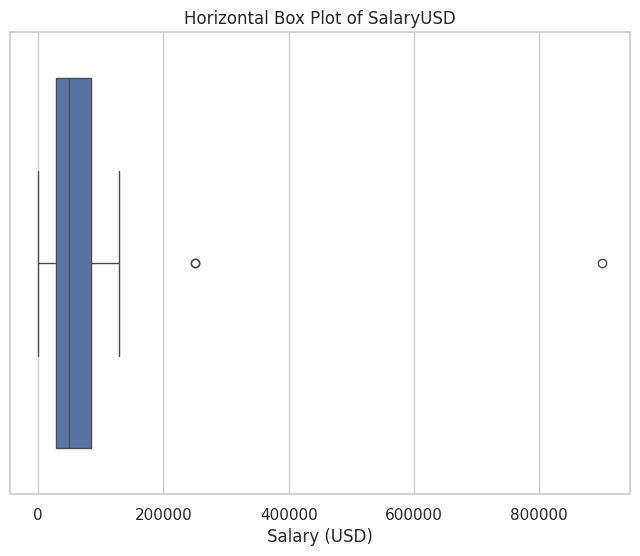

In [1958]:
# Visualizing the outliers detected for 'Salaryusd' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SalaryUSD', orient='h')
plt.title('Horizontal Box Plot of SalaryUSD')
plt.xlabel('Salary (USD)')
plt.show()


From the Box plot, we get to know that the distribution is a bit right skewed. There are potential outliers present here.

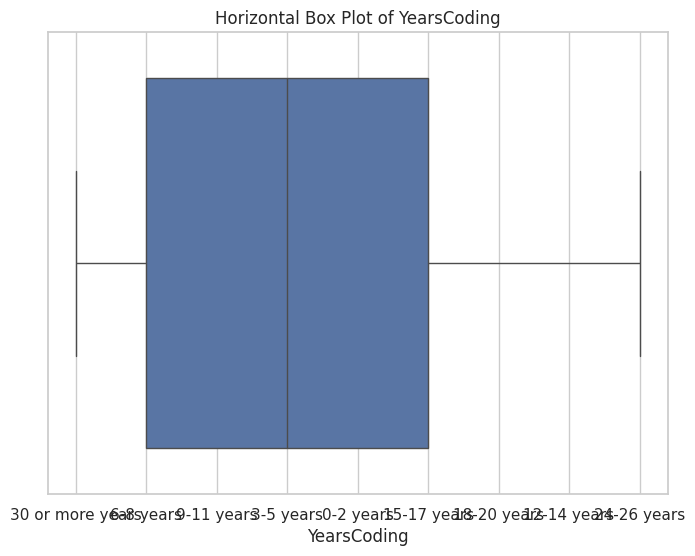

In [1959]:
# Visualizing the outliers detected for 'YearsCoding' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='YearsCoding', orient='h')
plt.title('Horizontal Box Plot of YearsCoding')
plt.xlabel('YearsCoding')
plt.show()


From the Box plot, we get to know that the distribution is symmetric and positively skewed. There are no potential outliers present here.

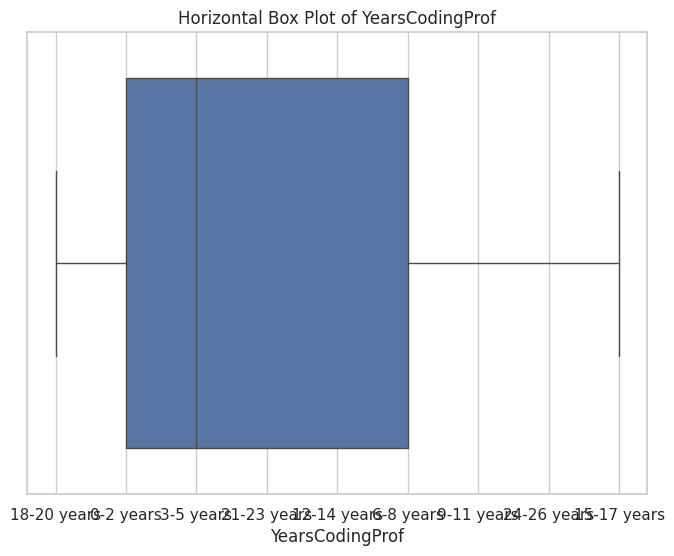

In [1960]:
# Visualizing the outliers detected for 'YearsCodingProf' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='YearsCodingProf', orient='h')
plt.title('Horizontal Box Plot of YearsCodingProf')
plt.xlabel('YearsCodingProf')
plt.show()

From the Box plot, we get to know that the distribution is not symmetric and right skewed. There are no potential outliers present here.

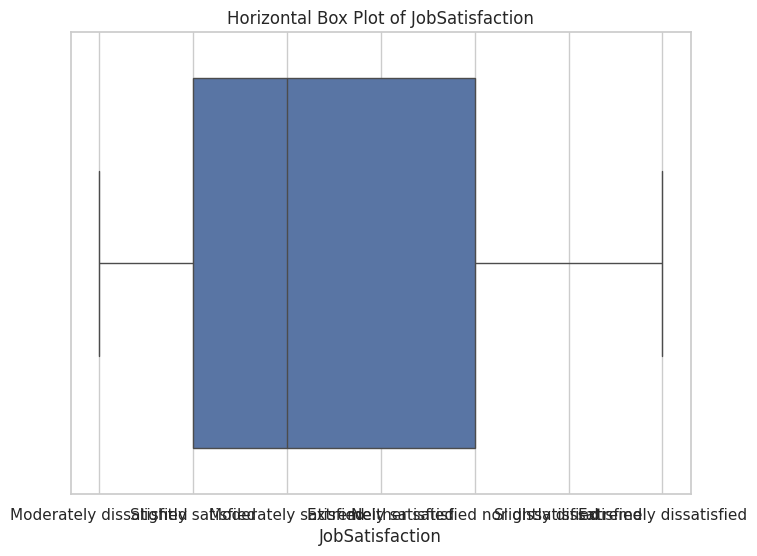

In [1961]:
# Visualizing the outliers detected for 'JobSatisfaction' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='JobSatisfaction', orient='h')
plt.title('Horizontal Box Plot of JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.show()

From the Box plot, we get to know that the distribution is not symmetric and right skewed. There are no potential outliers present here.

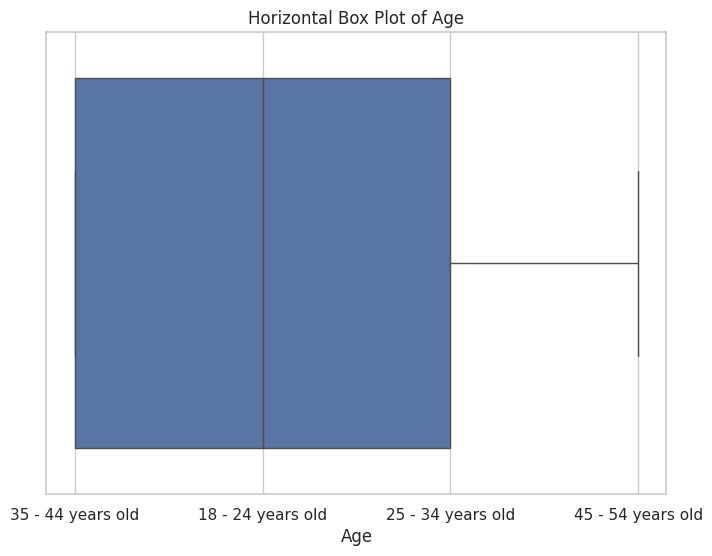

In [1962]:
# Visualizing the outliers detected for 'age' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age', orient='h')
plt.title('Horizontal Box Plot of Age')
plt.xlabel('Age')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and positively skewed. There are no potential outliers present here.

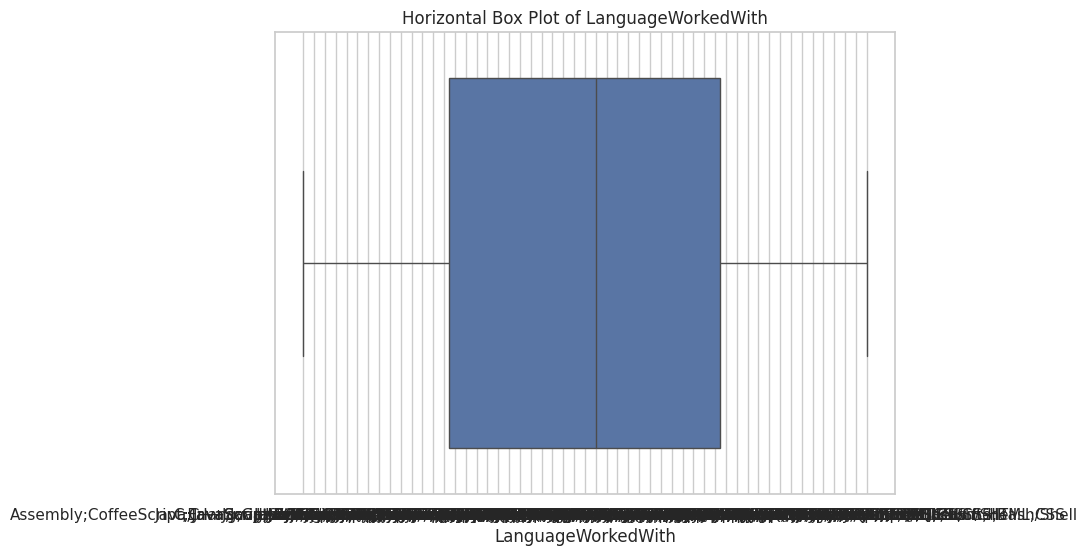

In [1963]:
# Visualizing the outliers detected for 'LanguageWorkedWith' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='LanguageWorkedWith', orient='h')
plt.title('Horizontal Box Plot of LanguageWorkedWith')
plt.xlabel('LanguageWorkedWith')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and It is not skewed as well. There are no potential outliers present here.

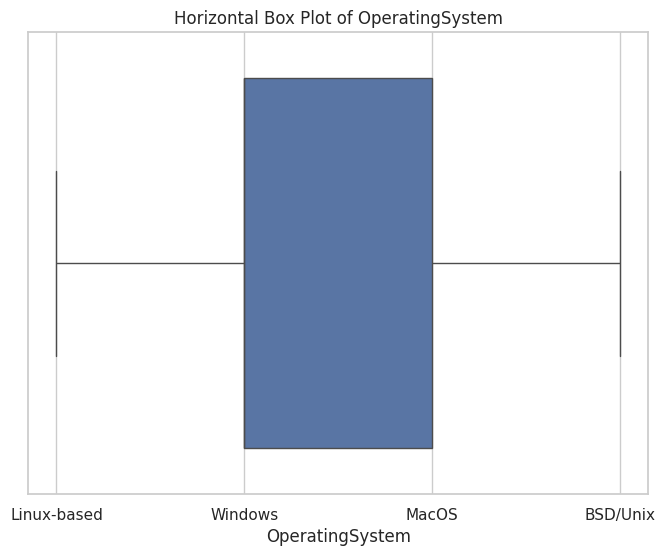

In [1964]:
# Visualizing the outliers detected for 'OperatingSystem' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='OperatingSystem', orient='h')
plt.title('Horizontal Box Plot of OperatingSystem')
plt.xlabel('OperatingSystem')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and It is not skewed as well. There are no potential outliers present here.

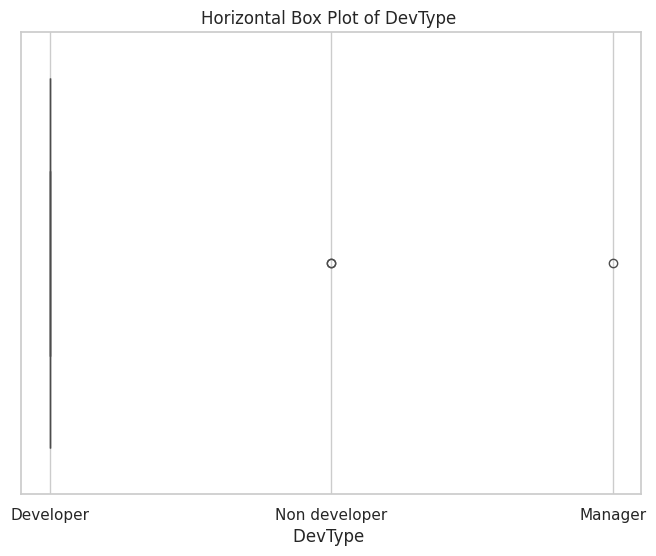

In [1965]:
# Visualizing the outliers detected for 'DevType ' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DevType', orient='h')
plt.title('Horizontal Box Plot of DevType ')
plt.xlabel('DevType ')
plt.show()

From thi Box plot, We get to know that there are potential outliers.

*From all the Box plots we did, we can conclude that there are outlier in the DevType and SalaryUSD columns which are to be handled*

**HANDLING OUTLIERS**

*Removing the outliers*

Removing the outliers using interquartile range method


In [1966]:
def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows where values are within the bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return filtered_data

# Assuming 'df' is your DataFrame and 'SalaryUSD' is the column with outliers
df = remove_outliers_iqr(df, 'SalaryUSD')


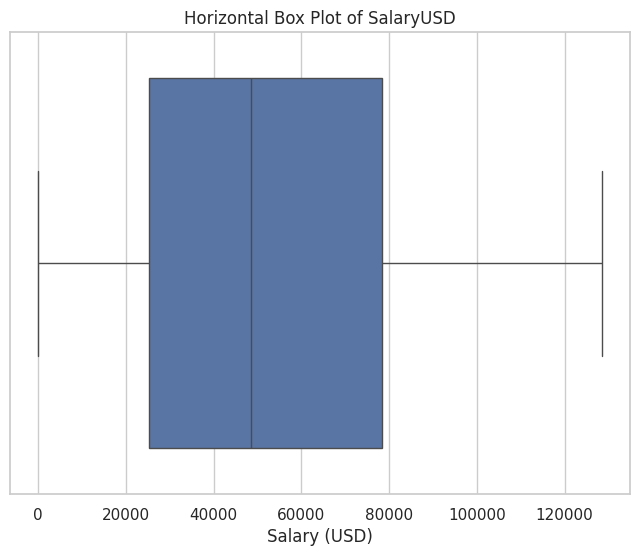

In [1967]:
# Visualizing the outliers whether they are removed or not for 'Salaryusd' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='SalaryUSD', orient='h')
plt.title('Horizontal Box Plot of SalaryUSD')
plt.xlabel('Salary (USD)')
plt.show()

From this we can see that there are no potential outliers left. Hence we successfully removed the outliers

*By this the data cleaning part is done*

**DATA VISUALIZATION**

**UNIVARIENT ANALYSIS**

*SalaryUSD*

This histogram shows the distribution of salaries and the bars represent the frequency of salaries.

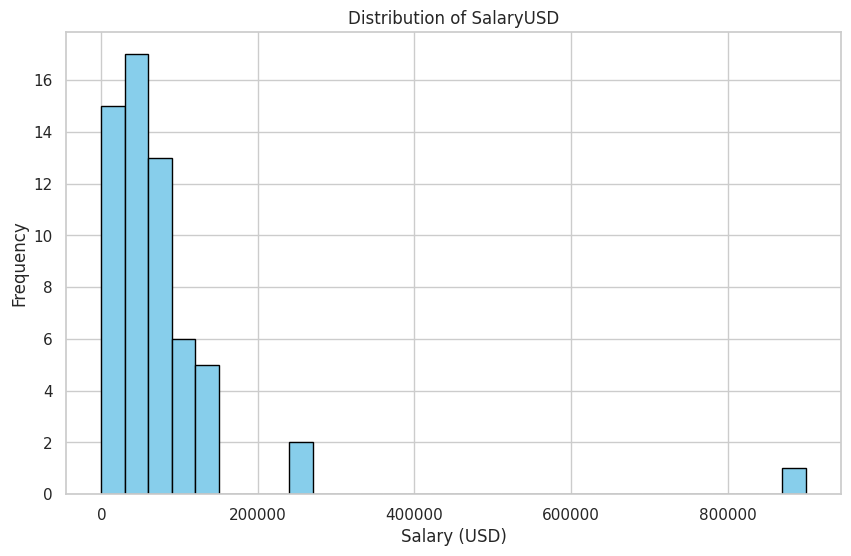

In [1968]:
# Plotting the histogram for SalaryUSD
plt.figure(figsize=(10, 6))
plt.hist(cleaned_2018['SalaryUSD'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of SalaryUSD')
plt.grid(True)
plt.show()


From the result, we can know that there are many salaries in the lower range [between o to 200000 USD].

*DevType*

This plots a count plot which shows the distribution of developer type correspoding to the count of respondant

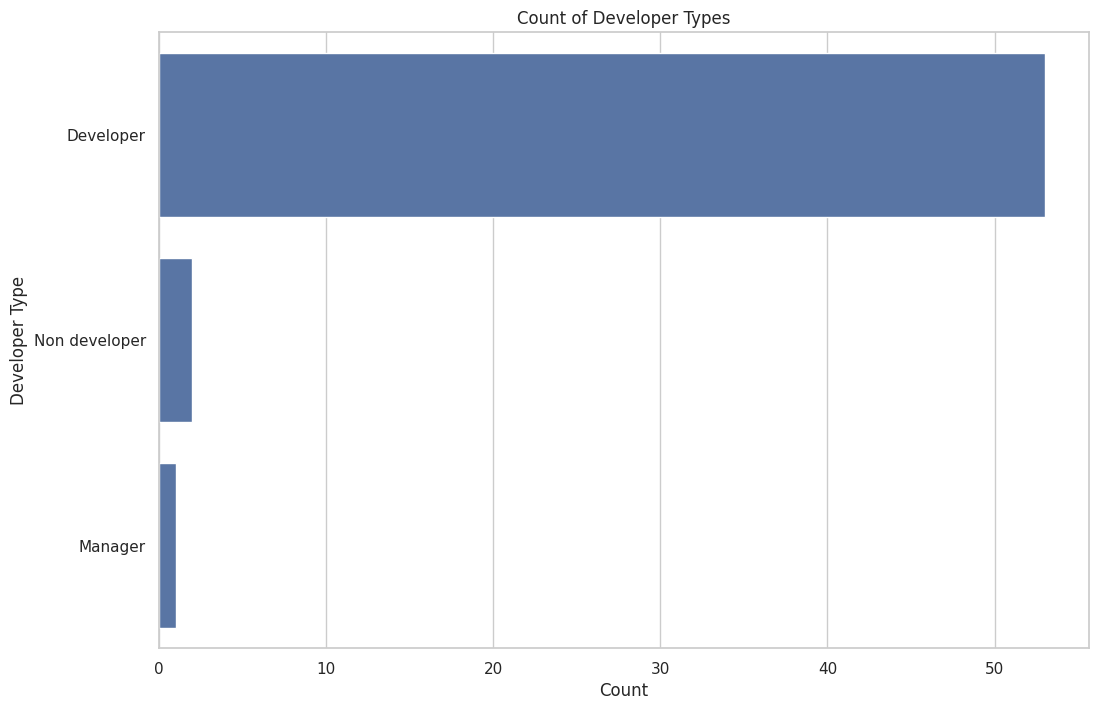

In [1969]:
# plotting a count plot for DevType
plt.figure(figsize=(12, 8))
sns.countplot(y='DevType', data=df)
plt.title('Count of Developer Types')
plt.xlabel('Count')
plt.ylabel('Developer Type')
plt.show()


By the result, we can understand that there are extremely high developer categorized ones compared to the non developer and manager.

*Employement*

This plot shows the distribution of different employement statuses among the respondants

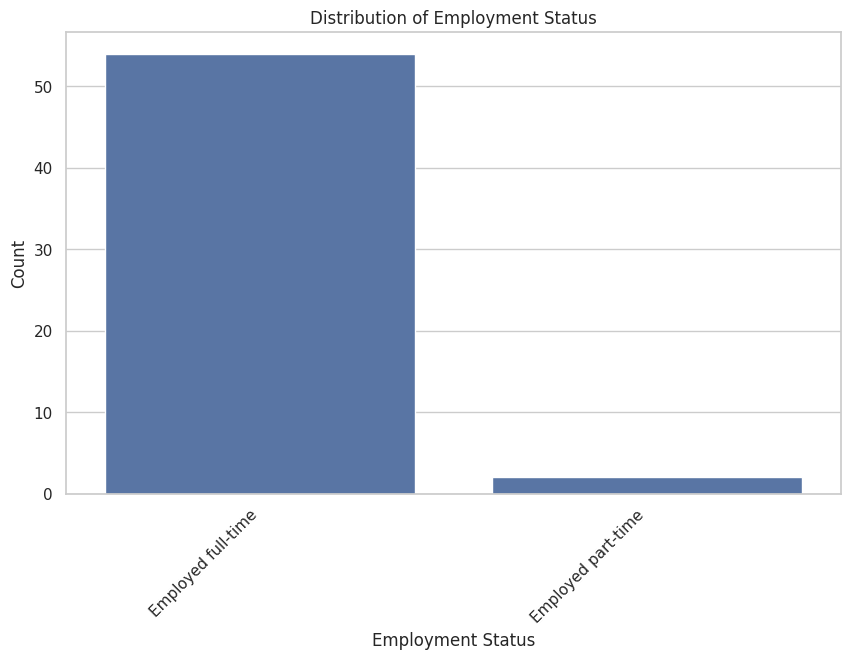

In [1970]:
# Plotting the distribution of employment status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


By the result, We can clearly see that large number of respondants are employed for full time.

*Years of coding profession*

This plot shows the distribution of years of professional coding experience among the respondants.

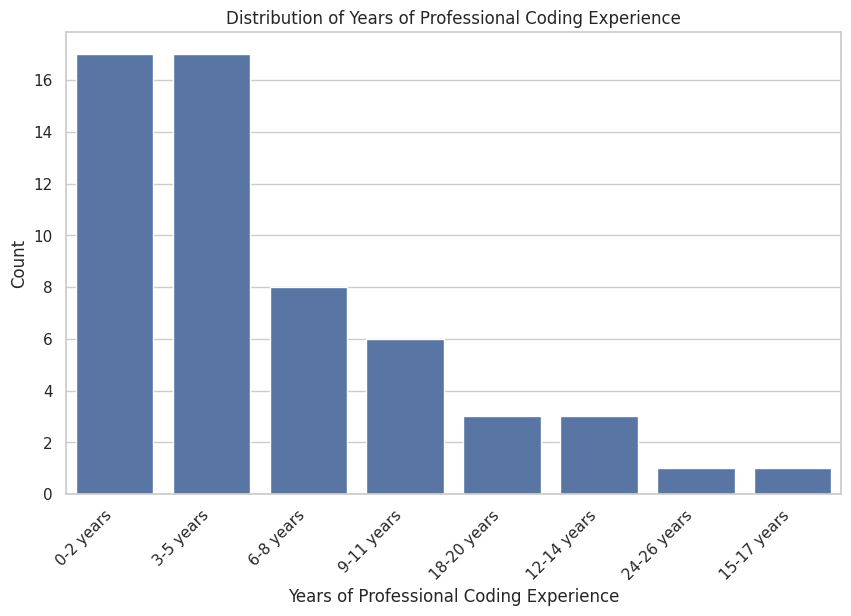

In [1971]:
# Plotting the distribution of years of professional coding experience
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YearsCodingProf', order=df['YearsCodingProf'].value_counts().index)
plt.title('Distribution of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


By the result, we get to know that there are more people who are experienced for 0-2  years and 3-5 years.

*language worked with*

This plot shows the distribution of different languages worked with among the respondents.

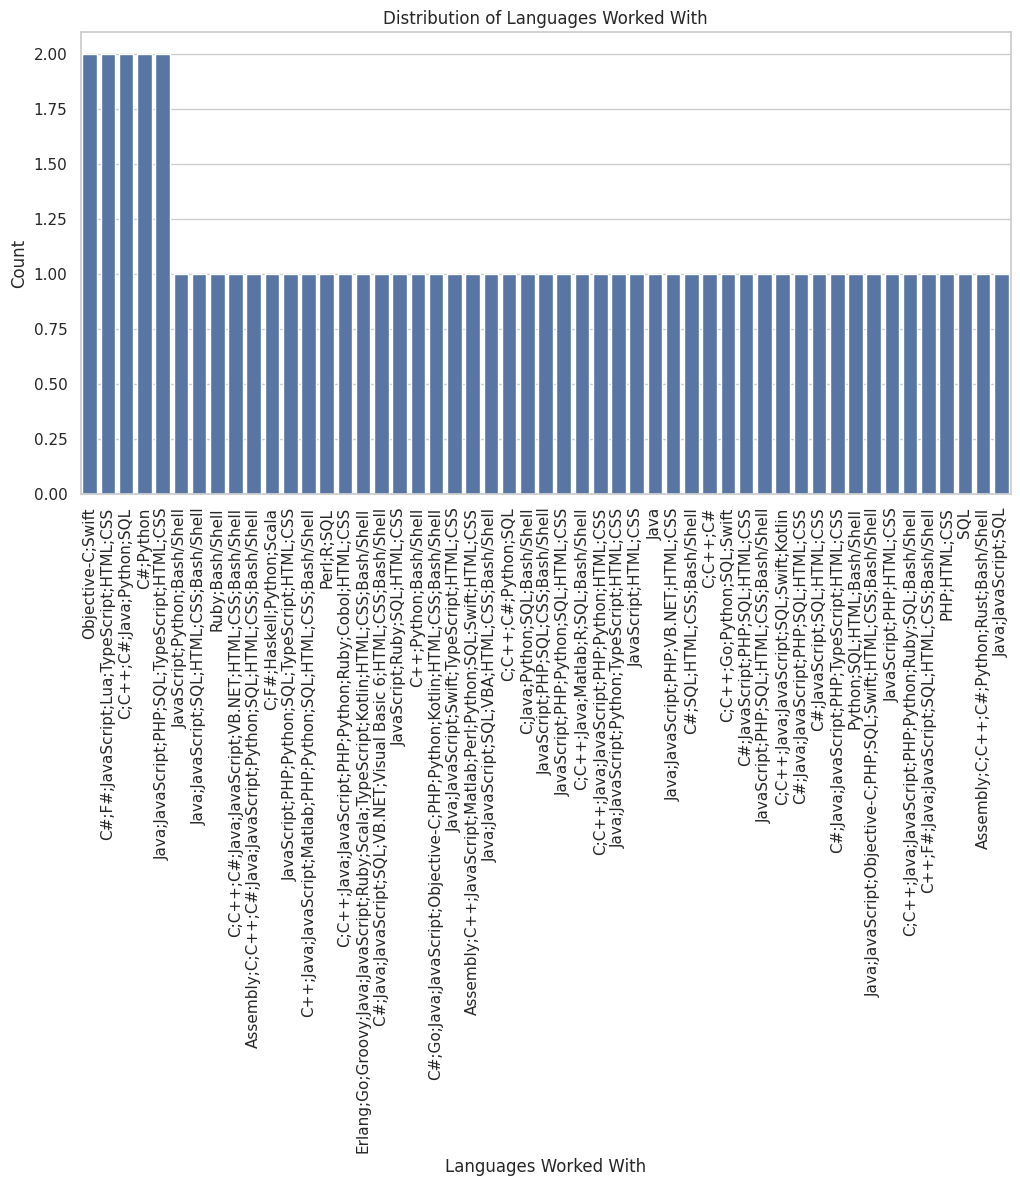

In [1972]:
# Plotting the distribution of languages worked with
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='LanguageWorkedWith', order=df['LanguageWorkedWith'].value_counts().index)
plt.title('Distribution of Languages Worked With')
plt.xlabel('Languages Worked With')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


By the result, we get to know that all the languages are worked mostly but the first three row's languages are used the most.

**BIVARIATE ANALYSIS**

*AGE vs SALARYUSD*

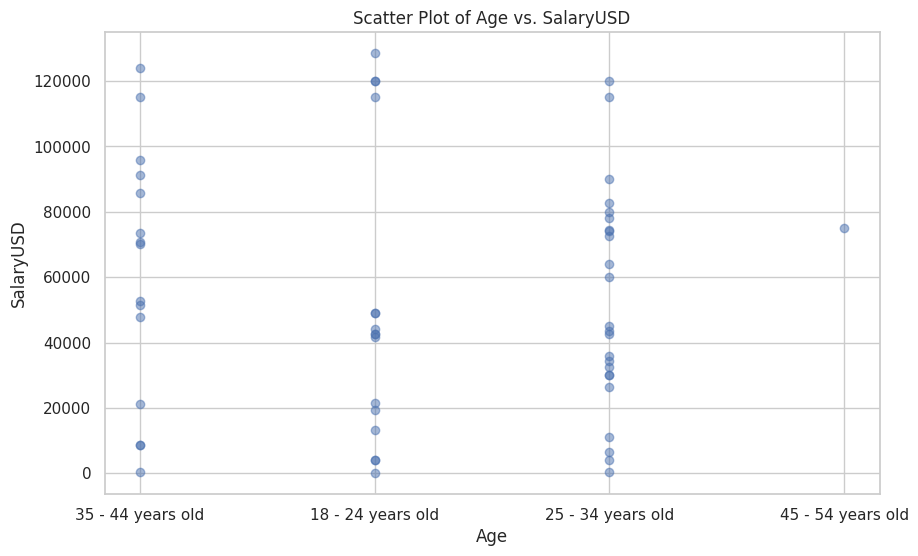

In [1973]:
# Scatter plot for Age vs. SalaryUSD
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['SalaryUSD'], alpha=0.5)
plt.title('Scatter Plot of Age vs. SalaryUSD')
plt.xlabel('Age')
plt.ylabel('SalaryUSD')
plt.grid(True)
plt.show()


The higher density of dots in the 25-34 years and 35-44 years age ranges indicates that there are more individuals within these age brackets who are paid well.

*DEVTYPE vs SALARYUSD*

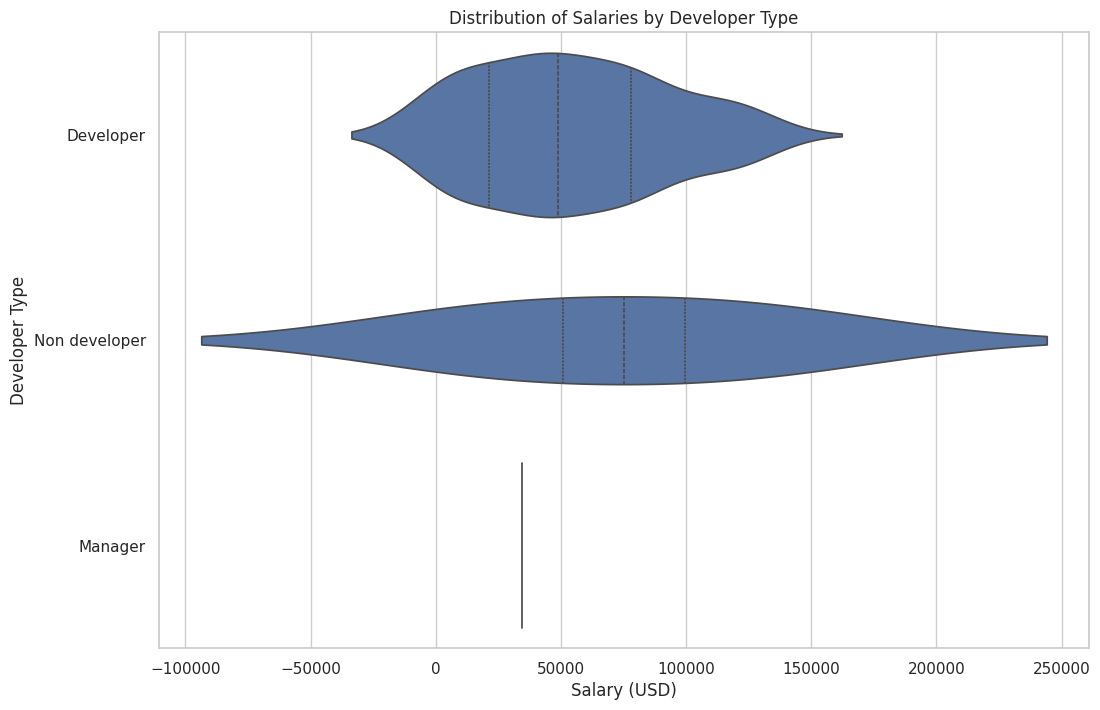

In [1974]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='SalaryUSD', y='DevType', data=df, inner='quartile')
plt.title('Distribution of Salaries by Developer Type')
plt.xlabel('Salary (USD)')
plt.ylabel('Developer Type')
plt.show()


This tells that the salaries of the developer are much concentrated between 0 to 100000 USD and there is variablity in salaries. and the salaries of the non developer are evenly distributed and less variable and the salaries of the managers are very little variable.

*Employment vs SalaryUSD*

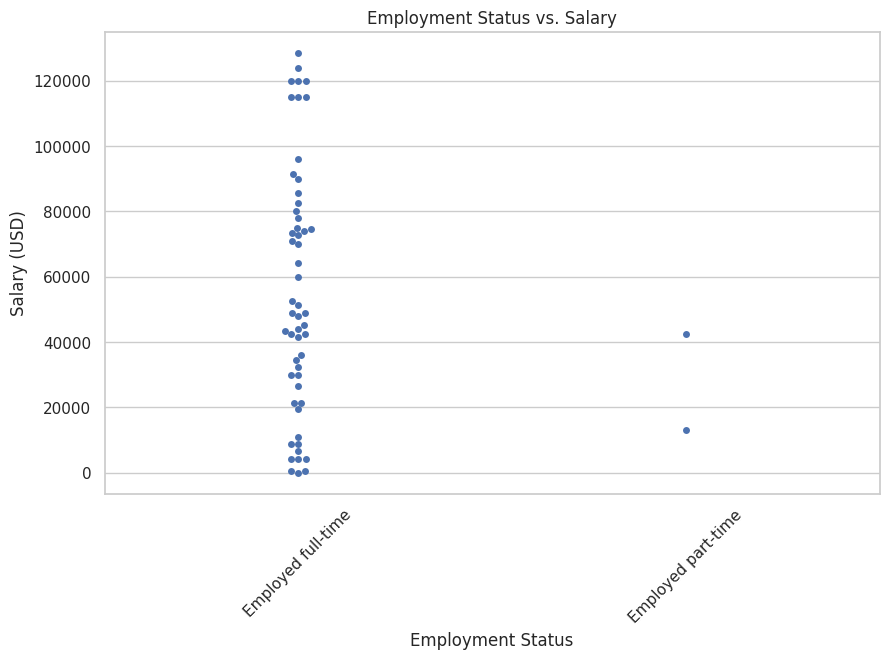

In [1975]:
# Creating a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Employment', y='SalaryUSD', data=df)
plt.title('Employment Status vs. Salary')
plt.xlabel('Employment Status')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


This observation says that the expectation that full-time positions typically offer higher salaries compared to part-time positions is true, resulting in more data points at higher salary ranges for full-time employment.








*YearsCodingProf vs. SalaryUSD*

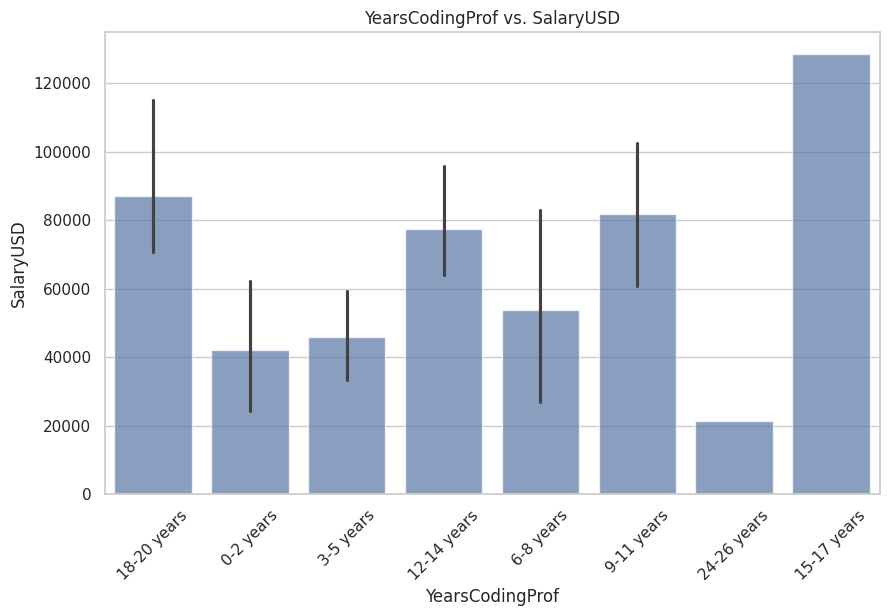

In [1976]:
#Bar plot for YearsCodingProf vs. SalaryUSD
plt.figure(figsize=(10, 6))
sns.barplot(x='YearsCodingProf', y='SalaryUSD', data=df, alpha=0.7)
plt.title('YearsCodingProf vs. SalaryUSD')
plt.xlabel('YearsCodingProf')
plt.ylabel('SalaryUSD')
plt.xticks(rotation=45)
plt.show()


Results seem like individuals with 15-17 years of professional coding experience tend to have relatively higher salaries, with earning up to $120,000. This observation suggests that there may be a positive relation between years of professional coding experience and salary, indicating that more experienced professionals tend to command higher salaries.
The 24-26 years again tend to have low salary maybe due to the factor of age and a desire of having young ones to be worked.

*LanguageWorkedWith vs. SalaryUSD*

<ipython-input-1977-ec6b2cfc68a6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LanguageWorkedWith', y='SalaryUSD', data=df, ci=None)


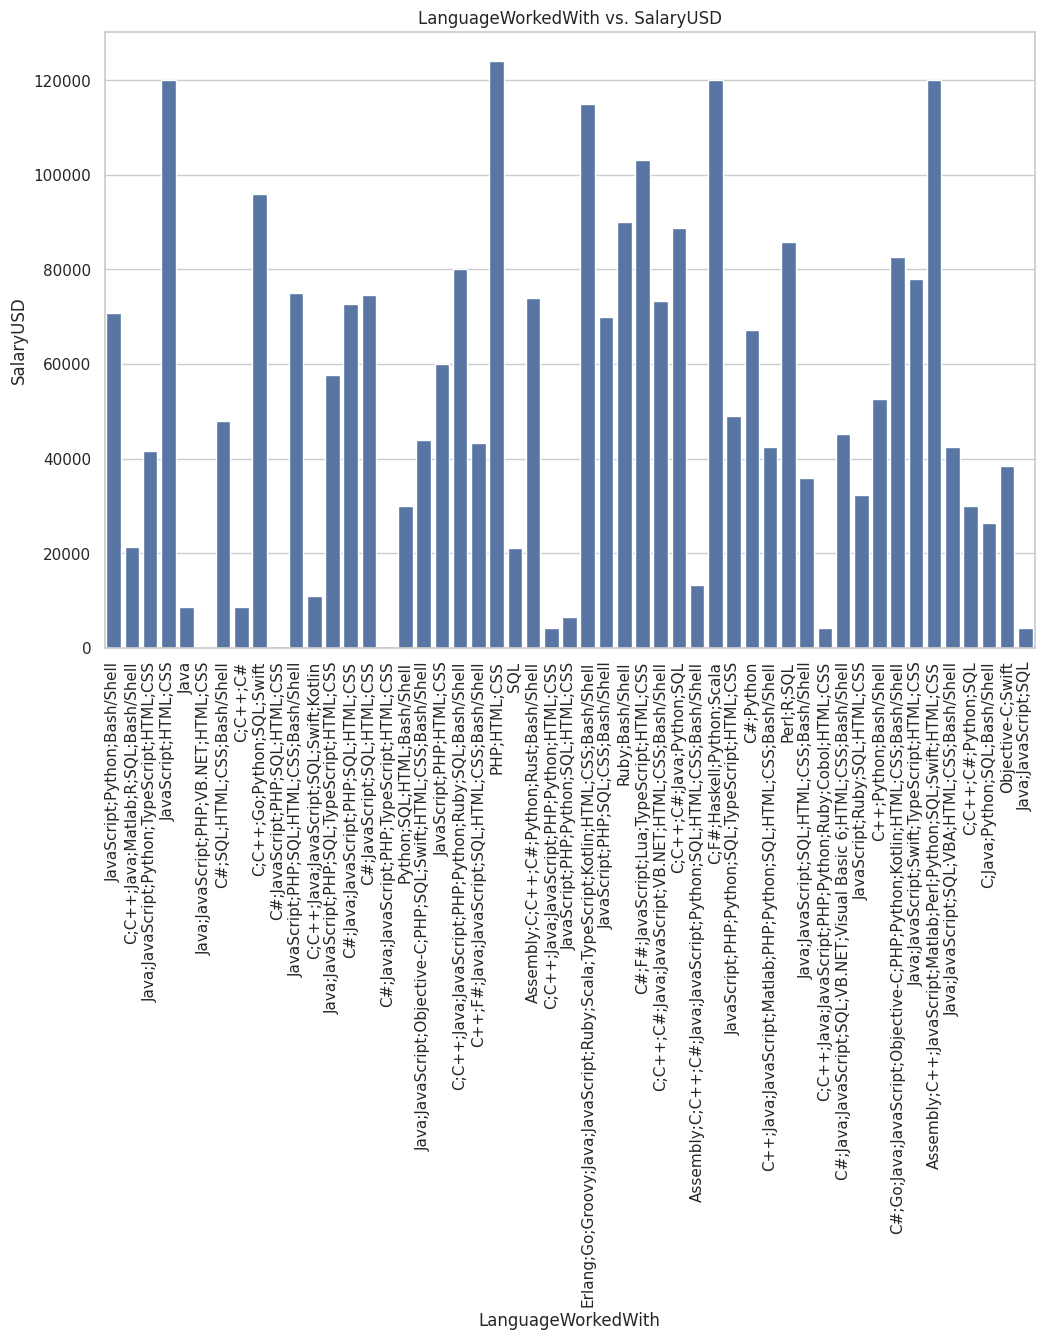

In [1977]:
# Bar plot of LanguageWorkedWith vs. SalaryUSD
plt.figure(figsize=(12, 8))
sns.barplot(x='LanguageWorkedWith', y='SalaryUSD', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('LanguageWorkedWith vs. SalaryUSD')
plt.xlabel('LanguageWorkedWith')
plt.ylabel('SalaryUSD')
plt.show()


The individuals who work with the languages oriented with css,html,php,swift tend to have more pay of salary extending upto 120000 USD.

All these visualizations provide valuable insights into different aspects of the data, such as the distribution of salary, the relationship between different variables like age and salary, and how various factors like employment type and years of coding experience relate to salary which answers many analysis questions.

**CORRELATION ANALYSIS**

*To understand the relation between them we need to perform correlation analysis.*

**Correlation analysis:AGE vs SALARYUSD**

Correlation Matrix:
             Average_Age  SalaryUSD
Average_Age     1.000000   0.122929
SalaryUSD       0.122929   1.000000


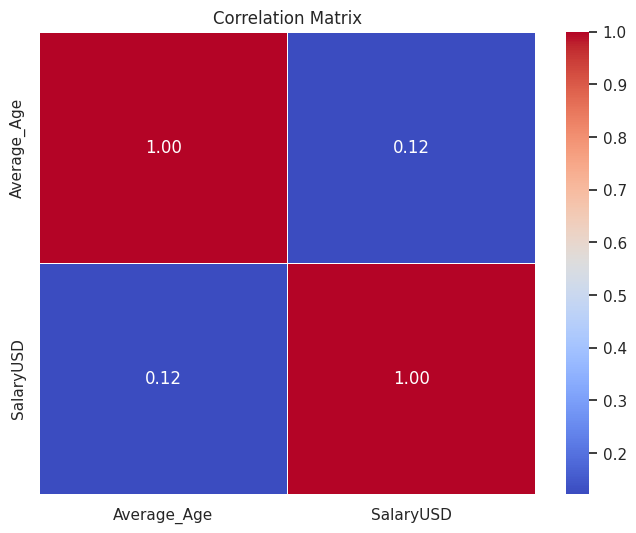

In [1978]:
# Replacing 'years old' with an empty string and split the age range into two separate columns
df[['Age_Start', 'Age_End']] = df['Age'].str.replace(' years old', '').str.split(' - ', expand=True)

# Converting the 'Age_Start' and 'Age_End' columns to numeric format
df[['Age_Start', 'Age_End']] = df[['Age_Start', 'Age_End']].astype(float)

# Considering the average of 'Age_Start' and 'Age_End' to get the approximate age
df['Average_Age'] = (df['Age_Start'] + df['Age_End']) / 2

# Calculating the correlation coefficient
correlation = df[['Average_Age', 'SalaryUSD']].corr()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation)

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

From the result, we get to know that the correlation coefficient of 0.12 indicates a weak positive correlation between the variables 'Age' and 'SalaryUSD'. This means that as age increases, there is a slight tendency for salary to increase, but the relationship is not very strong.

**Correlation analysis:Job staistfaction vs SALARYUSD**

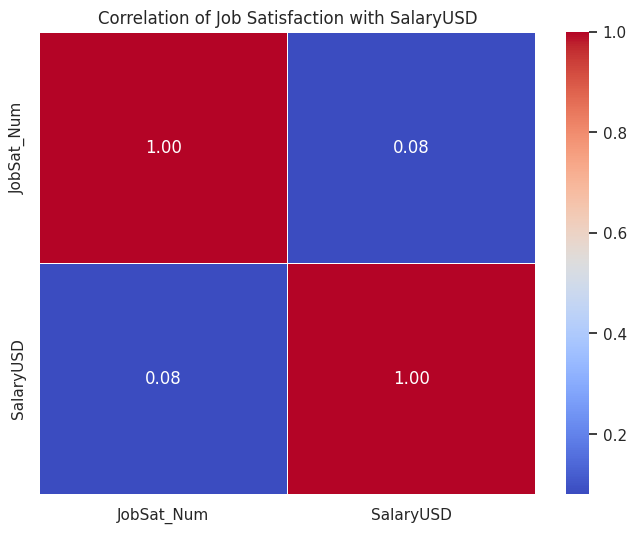

In [1979]:
# Defining a mapping dictionary for job satisfaction levels
job_sat_mapping = {
    'Extremely dissatisfied': 1,
    'Moderately dissatisfied': 2,
    'Slightly dissatisfied': 3,
    'Neither satisfied nor dissatisfied': 4,
    'Slightly satisfied': 5,
    'Moderately satisfied': 6,
    'Extremely satisfied': 7
}

# Mapping the JobSatisfaction column using the defined mapping
df['JobSat_Num'] = df['JobSatisfaction'].map(job_sat_mapping)

# Calculating the correlation matrix
correlation_matrix = df[['JobSat_Num', 'SalaryUSD']].corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Job Satisfaction with SalaryUSD')
plt.show()


From the result, we can see that the correlation coefficient is 0.08 which indicates a very weak positive correlation between job satisfaction and salary. This means that there is a slight tendency for job satisfaction to increase as salary increases, but the relationship is not strong.

**Correlation analysis:Job staistfaction vs RACE ETHNICITY**

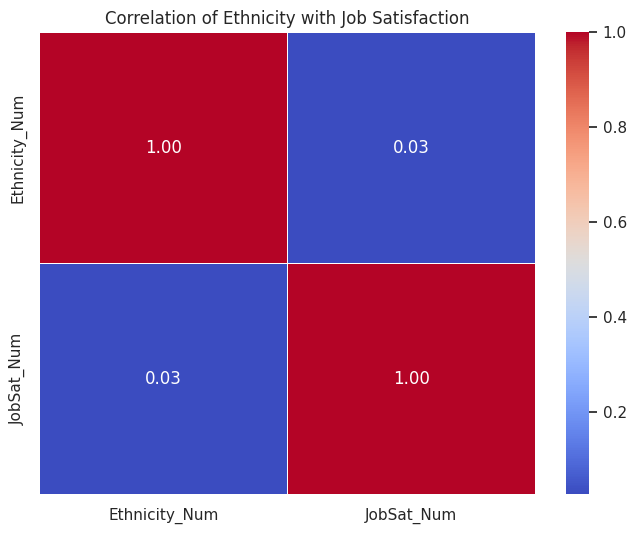

In [1980]:
# Defining a mapping dictionary for ethnicities
ethnicity_mapping = {
    'Black or African descent': 1,
    'East Asian': 2,
    'Hispanic or Latino': 3,
    'South Asian': 4,
    'White or European descent': 5
}

# Mapping the RaceEthnicity column using the defined mapping
df['Ethnicity_Num'] = df['RaceEthnicity'].map(ethnicity_mapping)

# Calculating the correlation matrix
correlation_matrix_ethnicity = df[['Ethnicity_Num', 'JobSat_Num']].corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_ethnicity, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Ethnicity with Job Satisfaction')
plt.show()


From the result, we can see that the correlation coefficient is 0.03 which indicates a very weak positive correlation between ethnicity and job satisfaction. This suggests that there is little to no linear relationship between ethnicity and job satisfaction in the dataset.

**ANALYSIS**

**JOB SATISFACTION vs EDUCATION LEVEL**

In [1981]:
# Calculate the distribution of job satisfaction levels within each education level category
education_job_satisfaction_distribution = df.groupby('EdLevel')['JobSatisfaction'].value_counts().unstack().fillna(0)

# Display the distribution
print("Job Satisfaction Distribution by Education Level:")
print(education_job_satisfaction_distribution)


Job Satisfaction Distribution by Education Level:
JobSatisfaction  Extremely dissatisfied  Extremely satisfied  \
EdLevel                                                        
Associate                           0.0                  0.0   
Bachelors                           2.0                  4.0   
No Degree                           0.0                  0.0   

JobSatisfaction  Moderately dissatisfied  Moderately satisfied  \
EdLevel                                                          
Associate                            0.0                   2.0   
Bachelors                            4.0                  15.0   
No Degree                            0.0                   3.0   

JobSatisfaction  Neither satisfied nor dissatisfied  Slightly dissatisfied  \
EdLevel                                                                      
Associate                                       0.0                    0.0   
Bachelors                                       4.0             

We can conclude the distribution of job satisfaction levels within each education level category.

For the "Associate" education level:

Moderately satisfied: 2
Moderately dissatisfied: 0
Neither satisfied nor dissatisfied: 0
Slightly satisfied: 0
Slightly dissatisfied: 0
Extremely satisfied: 0
Extremely dissatisfied: 0

For the "Bachelors" education level:

Moderately satisfied: 15
Moderately dissatisfied: 4
Neither satisfied nor dissatisfied: 4
Slightly satisfied: 6
Slightly dissatisfied: 5
Extremely satisfied: 4
Extremely dissatisfied: 2

For the "No Degree" education level:

Moderately satisfied: 3
Moderately dissatisfied: 0
Neither satisfied nor dissatisfied: 3
Slightly satisfied: 6
Slightly dissatisfied: 2
Extremely satisfied: 0
Extremely dissatisfied: 0

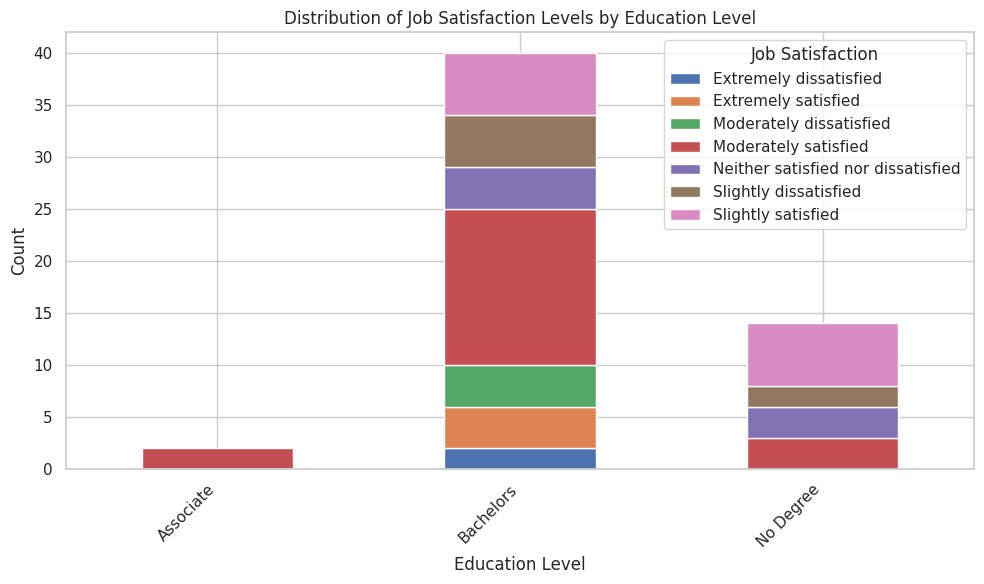

In [1982]:
# Plotting the distribution of job satisfaction levels by education level
education_job_satisfaction_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Job Satisfaction Levels by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction')
plt.tight_layout()
plt.show()


**COUNTRY vs DEVTYPE**

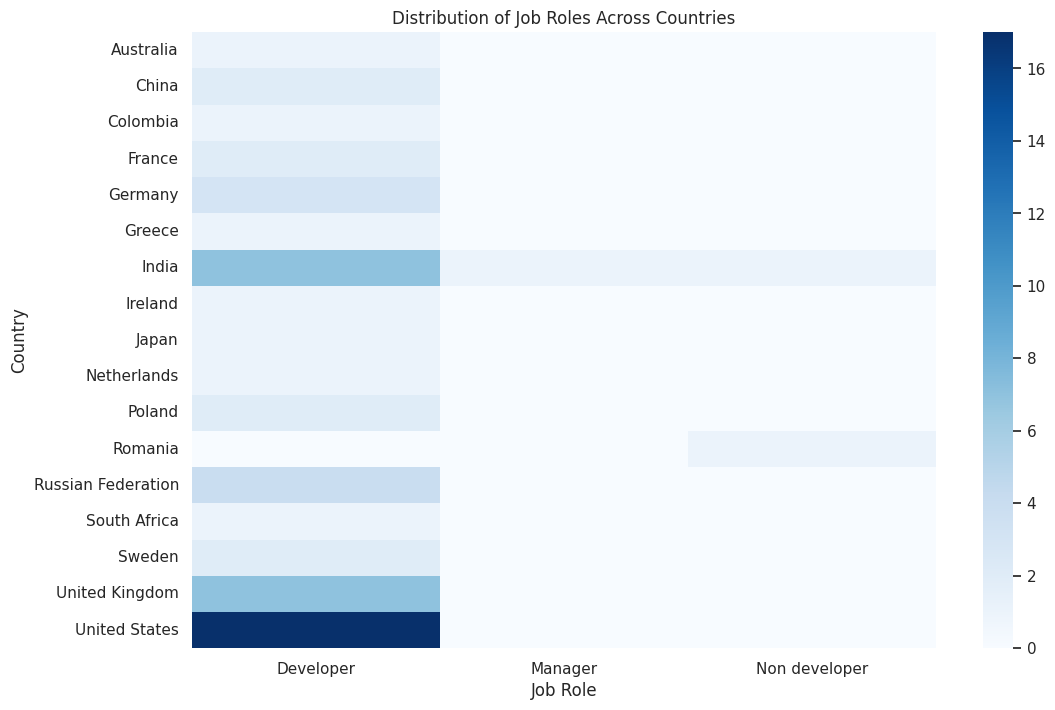

In [1983]:
# Grouping the data by 'Country' and 'DevType', and counting the number of respondents in each category
job_role_country_distribution = df.groupby(['Country', 'DevType']).size().unstack().fillna(0)

# Plotting the distribution of job roles in different countries
plt.figure(figsize=(12, 8))
sns.heatmap(job_role_country_distribution, cmap='Blues')
plt.title('Distribution of Job Roles Across Countries')
plt.xlabel('Job Role')
plt.ylabel('Country')
plt.show()


We can conclude from the heatmap that the most developers are presnt in United States and then in India. We can also observe that there are barely any jobs of manager and non developer.

**Language desire next year vs Devtype**

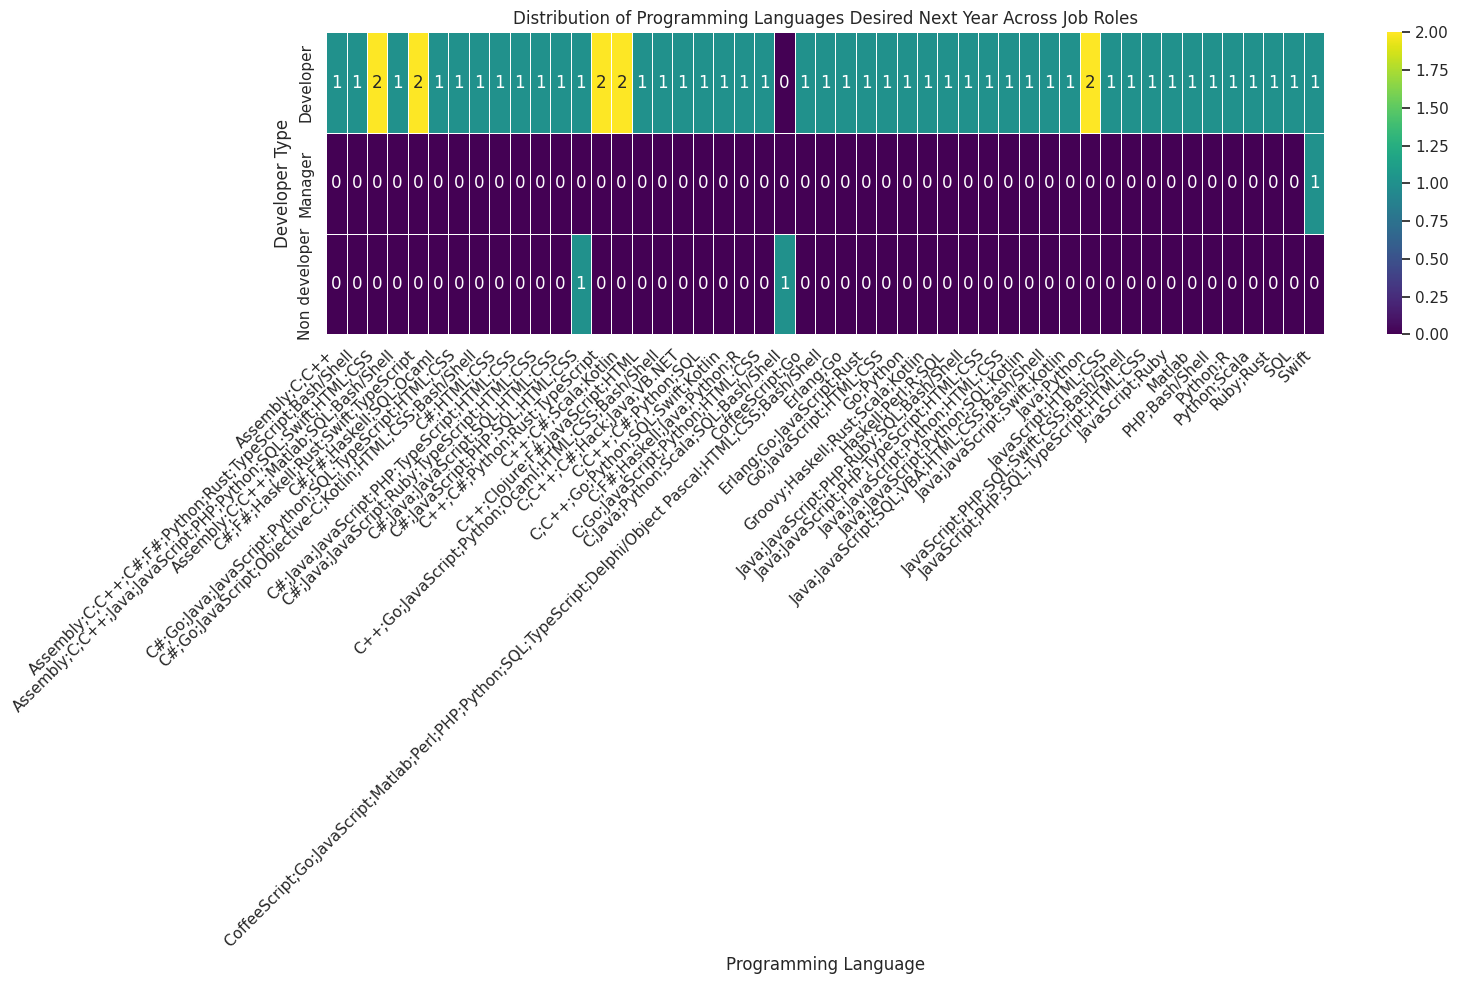

In [1984]:
# Grouping the data by DeveloperType and LanguageDesireNextYear
language_job_grouped = df.groupby('DevType')['LanguageDesireNextYear'].value_counts().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(language_job_grouped, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Distribution of Programming Languages Desired Next Year Across Job Roles')
plt.xlabel('Programming Language')
plt.ylabel('Developer Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can see that, the languages used next year- javasrcipt,css,html,python are to be used by developers only and likely there are more job roles for developers only.

In [1985]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'EdLevel', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy',
       'Age_Start', 'Age_End', 'Average_Age', 'JobSat_Num', 'Ethnicity_Num'],
      dtype='object', length=134)

**STUDENTS vs EMPLOYMENT**

*students who are employed*

In [1986]:
# Count the number of respondents who are students and employed
student_employed_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time')]['Employment'].value_counts()

# Display the count
print("Number of students who are employed:")
print(student_employed_count)


Number of students who are employed:
Employment
Employed full-time    6
Employed part-time    2
Name: count, dtype: int64


*STUDENTS WHO ARE EMPLOYED AND NOT EMPLOYED AFTER COMPLETING THEIR STUDIES*

In [1987]:
# Count the number of students who are employed
student_employed_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time')]['Employment'].value_counts()

# Display the count
print("Number of students who are employed:")
print(student_employed_count)

# Count the number of students who are not employed after completing studies
completed_students_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time') & (df['Employment'] == 'Not employed, and not looking for work')].shape[0]

# Display the count
print("\nNumber of students who are not employed after completing studies:")
print(completed_students_count)


Number of students who are employed:
Employment
Employed full-time    6
Employed part-time    2
Name: count, dtype: int64

Number of students who are not employed after completing studies:
6


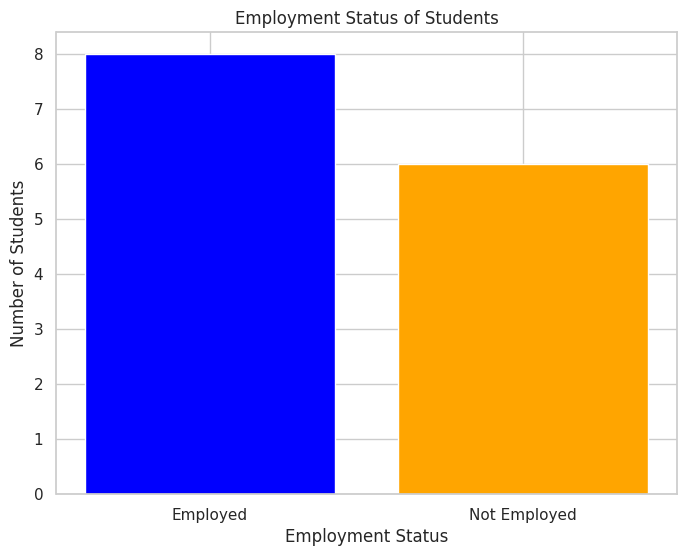

In [1988]:
# Counting the number of students who are employed
student_employed_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time')]['Employment'].value_counts()

# Counting the number of students who are not employed after completing studies
completed_students_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time') & (df['Employment'] == 'Not employed, and not looking for work')].shape[0]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Employed', 'Not Employed'], [student_employed_count.sum(), completed_students_count], color=['blue', 'orange'])
plt.title('Employment Status of Students')
plt.xlabel('Employment Status')
plt.ylabel('Number of Students')
plt.show()


*PAY OF PYTHON USERS NEXT YEAR*

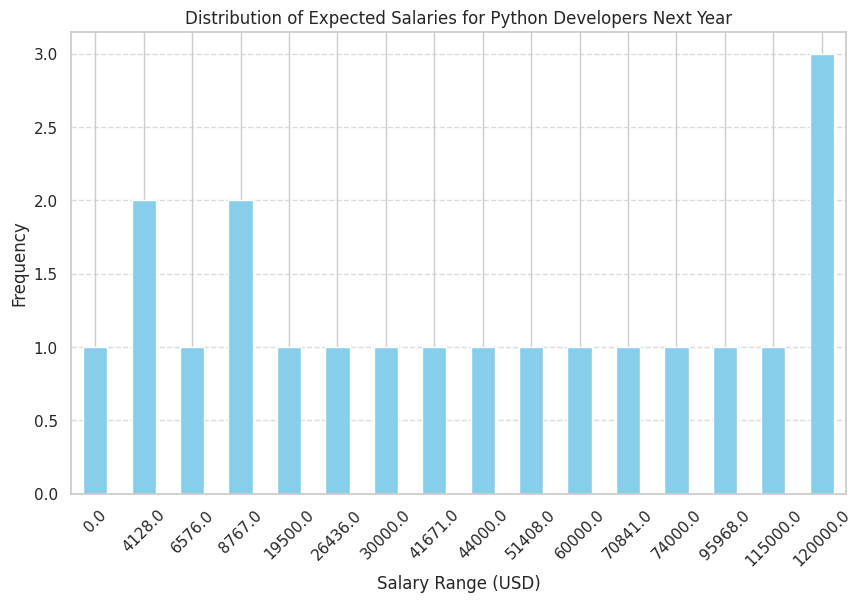

In [1989]:
# Filtering the DataFrame for respondents who plan to work with Python next year
python_next_year = df[df['LanguageDesireNextYear'].str.contains('Python', na=False)]

# Calculating the salary distribution
salary_distribution = python_next_year['SalaryUSD'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 6))
salary_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Salary Range (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Salaries for Python Developers Next Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


We can conlude that the frequency 3.0 that is the respondants can get the highest pay of 120000 USD.

We performed a good analysis and visualizations where we estimated the relationship between two columns and now we can answer any kind of questions.

# STACK OVERFLOW DATA-2019

**DATA LOADING**

In [1990]:
#assigning the null values
na_vals = ['NA', 'Missing']

*loading the data*

In [1991]:
#loading the data
survey_main_df = pd.read_csv("/content/survey_results_sample_2019.csv")

In [1992]:
#loading the survey schema
schema_df = pd.read_csv("/content/Schema_2019.csv")

*Initial Exploration*

In [1993]:
#Selecting only the required columns for analysis
survey_df_2019 = survey_main_df[['Age', 'CareerSat', 'ConvertedComp', 'Country', 'Dependents', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'Hobbyist', 'ImpSyn', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MainBranch',
 'UndergradMajor', 'YearsCodePro', 'DevType']]

In [1994]:
#renaming the column names for our easier understanding
survey_df_2019.rename(columns={'MainBranch': 'Profession', 'ConvertedComp': 'SalaryUSD',  'CareerSat': 'JobSatisfaction', 'ImpSyn' : 'CompetenceLevel', 'JobSat' : 'CurrentJobSatis', 'JobSeek' : 'JobStatus' }, inplace =True)


<ipython-input-1994-bd08faedb80a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_2019.rename(columns={'MainBranch': 'Profession', 'ConvertedComp': 'SalaryUSD',  'CareerSat': 'JobSatisfaction', 'ImpSyn' : 'CompetenceLevel', 'JobSat' : 'CurrentJobSatis', 'JobSeek' : 'JobStatus' }, inplace =True)


In [1995]:
#sorting the columns alphabetically
survey_df_2019.sort_index(axis=1).head(3)

Age CompetenceLevel                 Country     CurrentJobSatis  \
0  14.0             NaN          United Kingdom                 NaN   
1  19.0             NaN  Bosnia and Herzegovina                 NaN   
2  28.0         Average                Thailand  Slightly satisfied   

  Dependents                                            DevType  \
0         No                                                NaN   
1         No  Developer, desktop or enterprise applications;...   
2        Yes  Designer;Developer, back-end;Developer, front-...   

                                             EdLevel  \
0                          Primary/elementary school   
1  Secondary school (e.g. American high school, G...   
2         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   

                               Employment Ethnicity Gender Hobbyist  \
0  Not employed, and not looking for work       NaN    Man      Yes   
1      Not employed, but looking for work       NaN    Man       No   
2                      Employed full-time       NaN    Man      Yes   

      JobSatisfaction                                          JobStatus  \
0                 NaN                                                NaN   
1                 NaN                    I am actively looking for a job   
2  Slightly satisfied  I‚Äôm not actively looking, but I am open to n...   

                            LanguageDesireNextYear  \
0  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL   
1                      C++;HTML/CSS;JavaScript;SQL   
2                                  Elixir;HTML/CSS   

                LanguageWorkedWith  \
0  HTML/CSS;Java;JavaScript;Python   
1              C++;HTML/CSS;Python   
2                         HTML/CSS   

                                          Profession  SalaryUSD  \
0             I am a student who is learning to code        NaN   
1             I am a student who is learning to code        NaN   
2  I am not primarily a developer, but I write co...     8820.0   

                  UndergradMajor YearsCodePro  
0                            NaN          NaN  
1                            NaN          NaN  
2  Web development or web design            1

In [1996]:
#first few rows
survey_df_2019.head()

Age     JobSatisfaction  SalaryUSD                 Country Dependents  \
0  14.0                 NaN        NaN          United Kingdom         No   
1  19.0                 NaN        NaN  Bosnia and Herzegovina         No   
2  28.0  Slightly satisfied     8820.0                Thailand        Yes   
3  22.0      Very satisfied    61000.0           United States         No   
4  30.0   Very dissatisfied        NaN                 Ukraine         No   

                                             EdLevel  \
0                          Primary/elementary school   
1  Secondary school (e.g. American high school, G...   
2         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
3         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
4         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   

                               Employment  \
0  Not employed, and not looking for work   
1      Not employed, but looking for work   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                  Ethnicity Gender Hobbyist  \
0                                       NaN    Man      Yes   
1                                       NaN    Man       No   
2                                       NaN    Man      Yes   
3              White or of European descent    Man       No   
4  White or of European descent;Multiracial    Man      Yes   

          CompetenceLevel        CurrentJobSatis  \
0                     NaN                    NaN   
1                     NaN                    NaN   
2                 Average     Slightly satisfied   
3  A little below average     Slightly satisfied   
4  A little above average  Slightly dissatisfied   

                                           JobStatus  \
0                                                NaN   
1                    I am actively looking for a job   
2  I‚Äôm not actively looking, but I am open to n...   
3       I am not interested in new job opportunities   
4       I am not interested in new job opportunities   

                            LanguageDesireNextYear  \
0  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL   
1                      C++;HTML/CSS;JavaScript;SQL   
2                                  Elixir;HTML/CSS   
3                              C;C#;JavaScript;SQL   
4         HTML/CSS;Java;JavaScript;SQL;WebAssembly   

                            LanguageWorkedWith  \
0              HTML/CSS;Java;JavaScript;Python   
1                          C++;HTML/CSS;Python   
2                                     HTML/CSS   
3                          C;C++;C#;Python;SQL   
4  C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA   

                                          Profession  \
0             I am a student who is learning to code   
1             I am a student who is learning to code   
2  I am not primarily a developer, but I write co...   
3                     I am a developer by profession   
4                     I am a developer by profession   

                                      UndergradMajor      YearsCodePro  \
0                                                NaN               NaN   
1                                                NaN               NaN   
2                      Web development or web design                 1   
3  Computer science, computer engineering, or sof...  Less than 1 year   
4  Computer science, computer engineering, or sof...                 9   

                                             DevType  
0                                                NaN  
1  Developer, desktop or enterprise applications;...  
2  Designer;Developer, back-end;Developer, front-...  
3                              Developer, full-stack  
4  Academic researcher;Developer, desktop or ente...

In [1997]:
#dimensions of the data
survey_df_2019.shape

(99, 19)

In [1998]:
#datatype of survey data
survey_df_2019.dtypes

Age                       float64
JobSatisfaction            object
SalaryUSD                 float64
Country                    object
Dependents                 object
EdLevel                    object
Employment                 object
Ethnicity                  object
Gender                     object
Hobbyist                   object
CompetenceLevel            object
CurrentJobSatis            object
JobStatus                  object
LanguageDesireNextYear     object
LanguageWorkedWith         object
Profession                 object
UndergradMajor             object
YearsCodePro               object
DevType                    object
dtype: object

In [1999]:
survey_df_2019.columns

Index(['Age', 'JobSatisfaction', 'SalaryUSD', 'Country', 'Dependents',
       'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'Hobbyist',
       'CompetenceLevel', 'CurrentJobSatis', 'JobStatus',
       'LanguageDesireNextYear', 'LanguageWorkedWith', 'Profession',
       'UndergradMajor', 'YearsCodePro', 'DevType'],
      dtype='object')

**DATA CLEANING**

In [2000]:
#checking the missing values
missing_values = survey_df_2019.isnull().sum()
missing_values

Age                        9
JobSatisfaction           20
SalaryUSD                 33
Country                    0
Dependents                 7
EdLevel                    2
Employment                 2
Ethnicity                 23
Gender                     4
Hobbyist                   0
CompetenceLevel           20
CurrentJobSatis           20
JobStatus                 12
LanguageDesireNextYear     4
LanguageWorkedWith         1
Profession                 0
UndergradMajor            19
YearsCodePro              18
DevType                    7
dtype: int64

By this we can come to the conclusion that there are missing values

In [2001]:
#Find % of missing data
missing_count = survey_df_2019.isnull().sum() #number of missing
total_cells = np.product(survey_df_2019.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells


In [2002]:
print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1881
Total missing :  201
Missing Percentage:  10.685805422647528 %


Approximately 10% data is missing or contains null values

*Cleaning gender column*

In [2003]:
survey_df_2019['Gender'].value_counts()

Gender
Man                                                  87
Woman                                                 7
Non-binary, genderqueer, or gender non-conforming     1
Name: count, dtype: int64

In [2004]:
#lets refactor Gender values to Male, female and Non binary
#For the purpose of our data analysis we are considering three gender category. This not to defame any gender.
#refactoring Gender
def refactor_gender(df):
    '''function to change gender category to Male, Female, Non binary'''
    conditions = [(df['Gender'] == 'Man') | (df['Gender'] == 'Man;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Woman') | (df['Gender'] == 'Woman;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Non-binary, genderqueer, or gender non-conforming')
                  | (df['Gender'] == 'Woman;Man')
                  | (df['Gender'] == 'Woman;Man;Non-binary, genderqueer, or gender non-conforming')]

    values = ['Man', 'Woman', 'Non-binary']

    df['Gender'] = np.select(conditions, values, default = np.NaN)

    return df


In [2005]:
survey_df_2019 = refactor_gender(survey_df_2019)

<ipython-input-2004-c159affba392>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = np.select(conditions, values, default = np.NaN)


In [2006]:
survey_df_2019['Gender'].replace('nan', 'Non-binary', inplace =True)

<ipython-input-2006-3fb4d4af9d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_2019['Gender'].replace('nan', 'Non-binary', inplace =True)


In [2007]:
survey_df_2019['Gender'] = survey_df_2019['Gender'].fillna('Non-binary')

<ipython-input-2007-1dec9f459f5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_2019['Gender'] = survey_df_2019['Gender'].fillna('Non-binary')


In [2008]:
#Assigining the surveyors who havent mentioned their gender to Non-Binary category
survey_df_2019.isnull().sum()['Gender']

0

Hence, the gender column doesnt contain any null values

In [2009]:
survey_df_2019.groupby('Gender')['Gender'].count()

Gender
Man           87
Non-binary     5
Woman          7
Name: Gender, dtype: int64

*Cleaning age column*

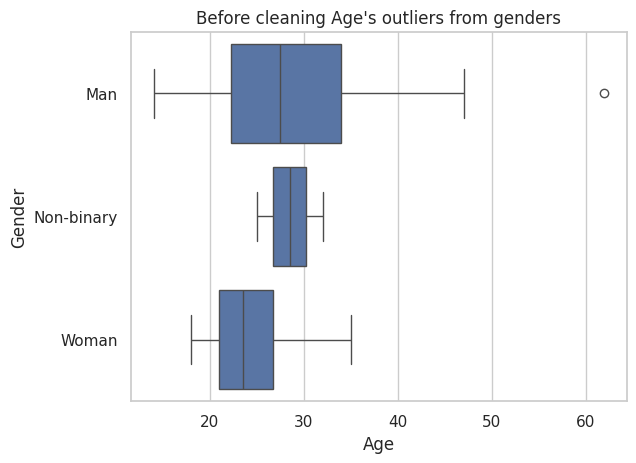

In [2010]:
sns.boxplot(x='Age', y= 'Gender', data=survey_df_2019)
plt.title("Before cleaning Age's outliers from genders")
plt.show()

We found that there are outliers for the man gender

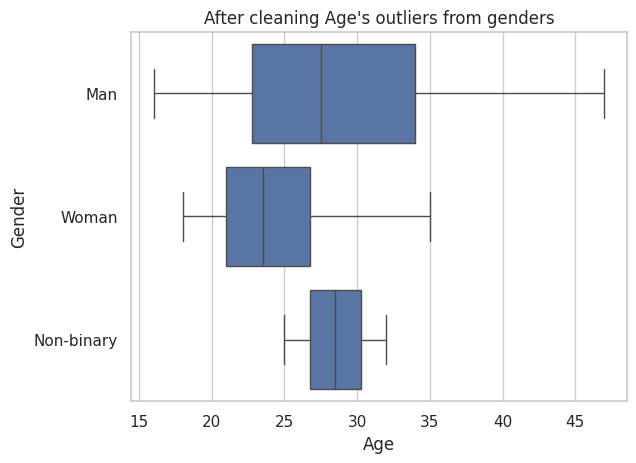

In [2011]:
#We are considering developes of age 15 to 60
filt = (survey_df_2019['Age'] >= 15) & (survey_df_2019['Age'] <= 60)
survey_df_2019 = survey_df_2019[filt]
sns.boxplot(x='Age', y= 'Gender', data=survey_df_2019)
plt.title("After cleaning Age's outliers from genders")
plt.show()

In [2012]:
survey_df_2019['Age'].isnull().sum()

0

Hence, the age column doesnot contain any null values

*Cleaning profession column (Mainbranch)*

In [2013]:
survey_df_2019['Profession'].value_counts()

Profession
I am a developer by profession                                                   62
I am not primarily a developer, but I write code sometimes as part of my work    10
I am a student who is learning to code                                            8
I code primarily as a hobby                                                       6
I used to be a developer by profession, but no longer am                          2
Name: count, dtype: int64

In [2014]:

#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]

    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']

    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)

    return df

survey_df_2019 = refactor_prof(survey_df_2019)

In [2015]:
survey_df_2019['Profession'].value_counts()

Profession
Developer        62
Non developer    10
Student           8
Novoice           6
Ex-Developer      2
Name: count, dtype: int64

In [2016]:
survey_df_2019['Profession'].isnull().sum()

0

Hence, there are no null values in the profession column

*Cleaning the EDlevel column*

In [2017]:
survey_df_2019['EdLevel'].value_counts()

EdLevel
Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)                                            42
Some college/university study without earning a degree                                15
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)                                         10
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9
Associate degree                                                                       5
Primary/elementary school                                                              3
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2
Professional degree (JD, MD, etc.)                                                     1
Name: count, dtype: int64

In [2018]:
survey_df_2019['EdLevel'].isnull().sum()

1

In [2019]:
#  Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                     (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                     (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),
                     (df['EdLevel'] == 'Associate degree'),
                     (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                     (df['EdLevel'] == 'Some college/university study without earning a degree')
                     | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
                     | (df['EdLevel'] == 'Primary/elementary school')
                     | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Bachelors', 'Masters', 'Professional', 'Associate', 'Doctorate', 'No Degree']

    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)

    return df

# applying function to subsets
survey_df_2019 = refactor_ed(survey_df_2019)
survey_df_2019['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [2020]:
survey_df_2019['EdLevel'].value_counts()

EdLevel
Bachelors       53
No Degree       27
Associate        5
Doctorate        2
Professional     1
Name: count, dtype: int64

In [2021]:
survey_df_2019.isnull().sum()['EdLevel']

0

Hence, there are no existing null values in the Edlevel column

*Cleaning the Undergrad column*

In [2022]:
#This returns the largest 10 rows in the undergrad major column
survey_df_2019['UndergradMajor'].value_counts().nlargest(10)

UndergradMajor
Computer science, computer engineering, or software engineering          36
Information systems, information technology, or system administration    15
Web development or web design                                             5
Mathematics or statistics                                                 4
Another engineering discipline (ex. civil, electrical, mechanical)        4
A business discipline (ex. accounting, finance, marketing)                3
A natural science (ex. biology, chemistry, physics)                       2
A social science (ex. anthropology, psychology, political science)        2
A humanities discipline (ex. literature, history, philosophy)             1
Fine arts or performing arts (ex. graphic design, music, studio art)      1
Name: count, dtype: int64

In [2023]:
survey_df_2019['UndergradMajor'].isnull().sum()

15

In [2024]:
survey_df_2019['UndergradMajor'].fillna(method='ffill', inplace=True)

In [2025]:
#returning the largest 15 rows
survey_df_2019['UndergradMajor'].value_counts().nlargest(15)

UndergradMajor
Computer science, computer engineering, or software engineering          43
Information systems, information technology, or system administration    19
Web development or web design                                             6
Another engineering discipline (ex. civil, electrical, mechanical)        5
Mathematics or statistics                                                 4
A natural science (ex. biology, chemistry, physics)                       3
A business discipline (ex. accounting, finance, marketing)                3
A social science (ex. anthropology, psychology, political science)        2
A humanities discipline (ex. literature, history, philosophy)             1
Fine arts or performing arts (ex. graphic design, music, studio art)      1
Name: count, dtype: int64

In [2026]:
survey_df_2019['UndergradMajor'].isnull().sum()

1

In [2027]:
survey_df_2019.dropna(subset=['UndergradMajor'], inplace=True)

In [2028]:
survey_df_2019['UndergradMajor'].isnull().sum()

0

In [2029]:

# Refactoring UndergradMajor
def refactor_major(df):
    '''function to change undergrad major category to Computer Science, Engineering, Info Systems, Math/Stat,
        Other Science, Web Design/Dev, Business, Arts and Science'''


    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'I never declared a major'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)')]

    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'No Major', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science']

    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)

    return df

# applying function to subsets
survey_df_2019 = refactor_major(survey_df_2019)

In [2030]:
survey_df_2019['UndergradMajor'].value_counts()

UndergradMajor
Computer Science    43
Info Systems        19
Web Design/Dev       6
Engineering          5
Math/Stat            4
Arts and Science     4
Other Science        3
Business             3
Name: count, dtype: int64

In [2031]:
survey_df_2019['UndergradMajor'].isnull().sum()

0

Hence, there are no existing null values in the Undergrad major column

*Cleaning the JobStatus column*

In [2032]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
I‚Äôm not actively looking, but I am open to new opportunities    44
I am not interested in new job opportunities                      23
I am actively looking for a job                                   12
Name: count, dtype: int64

In [2033]:
survey_df_2019['JobStatus'].isnull().sum()

8

In [2034]:
survey_df_2019['JobStatus'].fillna(method='ffill', inplace=True)

In [2035]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
I‚Äôm not actively looking, but I am open to new opportunities    50
I am not interested in new job opportunities                      24
I am actively looking for a job                                   13
Name: count, dtype: int64

In [2036]:
survey_df_2019.dropna(subset=['JobStatus'], inplace=True)

In [2037]:

# refactoring JobStatus
# changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''

    conditions_job = [(df['JobStatus'] == 'I am actively looking for a job'),
                    (df['JobStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobStatus'] == 'I’m not actively looking, but I am open to new opportunities')]

    choices_job = ['Seeking', 'Not seeking']

    df['JobStatus'] = np.select(conditions_job, choices_job, default=np.nan)

    return df

survey_df_2019 = refactor_job(survey_df_2019)

In [2038]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
nan            50
Not seeking    24
Seeking        13
Name: count, dtype: int64

In [2039]:
survey_df_2019['JobStatus'].isnull().sum()

0

Hence, there are no existing null values in the job status column

*Cleaning the job statisfaction column*

In [2040]:
survey_df_2019['JobSatisfaction'].value_counts()

JobSatisfaction
Very satisfied                        33
Slightly satisfied                    21
Slightly dissatisfied                  8
Neither satisfied nor dissatisfied     6
Very dissatisfied                      4
Name: count, dtype: int64

In [2041]:
survey_df_2019['JobSatisfaction'].isnull().sum()

15

In [2042]:
survey_df_2019['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [2043]:
survey_df_2019['JobSatisfaction'].value_counts()

JobSatisfaction
Very satisfied                        41
Slightly satisfied                    26
Slightly dissatisfied                 10
Neither satisfied nor dissatisfied     6
Very dissatisfied                      4
Name: count, dtype: int64

In [2044]:
survey_df_2019['JobSatisfaction'].isnull().sum()

0

Hence, there are no existing null values in the job statisfaction column

*Cleaning the Employment column*

In [2045]:
survey_df_2019['Employment'].value_counts()

Employment
Employed full-time                                      64
Independent contractor, freelancer, or self-employed    12
Employed part-time                                       5
Not employed, but looking for work                       4
Not employed, and not looking for work                   1
Name: count, dtype: int64

In [2046]:
survey_df_2019['Employment'].isnull().sum()

1

In [2047]:
survey_df_2019['Employment'].fillna(method='ffill', inplace=True)

In [2048]:
survey_df_2019['Employment'].value_counts()

Employment
Employed full-time                                      65
Independent contractor, freelancer, or self-employed    12
Employed part-time                                       5
Not employed, but looking for work                       4
Not employed, and not looking for work                   1
Name: count, dtype: int64

In [2049]:
survey_df_2019['Employment'].isnull().sum()

0

In [2050]:
#Refactoring the employment
def refactor_emp(df):
    '''function to change Employment category to Full-time, Self-employed, Not employed, Part-time '''
    conditions_emp = [(df['Employment'] == 'Employed full-time'),
                    (df['Employment'] == 'Independent contractor, freelancer, or self-employed'),
                    (df['Employment'] == 'Not employed, but looking for work')
                    | (df['Employment'] == 'Not employed, and not looking for work')
                    | (df['Employment'] == 'Retired'),
                    (df['Employment'] == 'Employed part-time')]

    choices_emp = ['Full-time', 'Self-employed', 'Not employed', 'Part-time']

    df['Employment'] = np.select(conditions_emp, choices_emp, default=np.nan)

    return df


survey_df_2019 = refactor_emp(survey_df_2019)

In [2051]:
survey_df_2019['Employment'].value_counts()

Employment
Full-time        65
Self-employed    12
Not employed      5
Part-time         5
Name: count, dtype: int64

In [2052]:
survey_df_2019['Employment'].isnull().sum()

0

Hence, there are no existing null values

*Cleaning the ethnicity column*

In [2053]:
ethnicity_list = survey_df_2019['Ethnicity'].unique().tolist()

In [2054]:
#here, you can see that we have long list of values. lets refactor them
ethnicity_list

[nan,
 'White or of European descent',
 'White or of European descent;Multiracial',
 'East Asian',
 'Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Biracial;Multiracial',
 'Black or of African descent',
 'Hispanic or Latino/Latina;Multiracial',
 'Hispanic or Latino/Latina',
 'Middle Eastern',
 'South Asian',
 'Multiracial',
 'East Asian;South Asian',
 'Biracial']

In [2055]:
len(ethnicity_list)

13

In [2056]:
#refactoring long list of values into categories.
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Biracial', na=False), 'Ethnicity'] = 'Biracial'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Black or of African descent', na=False), 'Ethnicity'] = 'Black or of African descent'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('East Asian', na=False), 'Ethnicity'] = 'East Asian'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Hispanic or Latino', na=False), 'Ethnicity'] = 'Hispanic or Latino'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Indigenous', na=False), 'Ethnicity'] = 'Indigenous'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Middle Eastern', na=False), 'Ethnicity'] = 'Middle Eastern'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('South Asian', na=False), 'Ethnicity'] = 'South Asian'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('White or of European descent', na=False), 'Ethnicity'] = 'White or of European descent'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Multiracial', na=False), 'Ethnicity'] = 'Multiracial'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Native American', na=False), 'Ethnicity'] = 'Native American'

In [2057]:
survey_df_2019['Ethnicity'].isnull().sum()

15

In [2058]:
survey_df_2019['Ethnicity'].value_counts()

Ethnicity
White or of European descent    45
South Asian                      8
Hispanic or Latino               6
East Asian                       4
Black or of African descent      4
Middle Eastern                   3
Multiracial                      1
Biracial                         1
Name: count, dtype: int64

In [2059]:
survey_df_2019['Ethnicity']=survey_df_2019.groupby(['Country'])['Ethnicity'].bfill().ffill()

In [2060]:
survey_df_2019['Ethnicity'].value_counts()

Ethnicity
White or of European descent    52
South Asian                     14
Hispanic or Latino               6
East Asian                       5
Black or of African descent      4
Middle Eastern                   3
Multiracial                      1
Biracial                         1
Name: count, dtype: int64

In [2061]:
survey_df_2019['Ethnicity'].isnull().sum()

1

In [2062]:
survey_df_2019['Ethnicity'].fillna(method='ffill', inplace=True)

In [2063]:
survey_df_2019['Ethnicity'].isnull().sum()

1

In [2064]:
survey_df_2019.dropna(subset=['Ethnicity'], inplace=True)

In [2065]:
survey_df_2019['Ethnicity'].value_counts()

Ethnicity
White or of European descent    52
South Asian                     14
Hispanic or Latino               6
East Asian                       5
Black or of African descent      4
Middle Eastern                   3
Multiracial                      1
Biracial                         1
Name: count, dtype: int64

In [2066]:
survey_df_2019['Ethnicity'].isnull().sum()

0

Hence, there are no existing null values in the ethnicicty column

*Cleaning the dependents column*

In [2067]:
survey_df_2019["Dependents"].value_counts()

Dependents
No     55
Yes    26
Name: count, dtype: int64

In [2068]:
survey_df_2019["Dependents"].isnull().sum()

5

In [2069]:
#Lets consider that people who didnt respond has no dependents for the purpose of analysis
survey_df_2019["Dependents"].fillna(method='ffill', inplace=True)

In [2070]:
survey_df_2019["Dependents"].value_counts()

Dependents
No     58
Yes    28
Name: count, dtype: int64

In [2071]:
survey_df_2019["Dependents"].isnull().sum()

0

Hence, there are no existing null values in dependents column

*Cleaning the Devtype column*

In [2072]:
survey_df_2019['DevType'].isnull().sum()

3

In [2073]:
#returns the top 10 rows in the devtype column
survey_df_2019['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                                                             12
Developer, front-end                                                                                                                               4
Developer, back-end;DevOps specialist                                                                                                              3
Developer, desktop or enterprise applications                                                                                                      2
Developer, full-stack;Engineer, data                                                                                                               2
Student                                                                                                                                            2
System administrator                                                                              

In [2074]:
survey_df_2019['DevType'].fillna(method='ffill', inplace=True)

In [2075]:
survey_df_2019['DevType'].value_counts().nlargest()

DevType
Developer, full-stack                            12
Developer, front-end                              4
Developer, back-end;DevOps specialist             3
Developer, desktop or enterprise applications     3
Developer, back-end;Developer, front-end          2
Name: count, dtype: int64

In [2076]:
survey_df_2019['DevType'].isnull().sum()

0

Hence, there are no existing null values in the DevType column

*Cleaning the Language worked with column*

In [2077]:
survey_df_2019['LanguageWorkedWith'].isnull().sum()

1

In [2078]:
#returning the top 10 rows
survey_df_2019['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript                                       5
C#;HTML/CSS;JavaScript;SQL                                3
HTML/CSS;JavaScript;PHP;SQL                               2
HTML/CSS;JavaScript;PHP;TypeScript                        2
C;C++;C#;Python;SQL                                       1
C;C#;HTML/CSS;Java;JavaScript;PHP;Python;SQL;VBA          1
SQL                                                       1
C#;HTML/CSS;JavaScript;PHP;SQL;TypeScript                 1
HTML/CSS;JavaScript;PHP;Python;SQL;VBA                    1
C#;HTML/CSS;Java;JavaScript;Objective-C;SQL;TypeScript    1
Name: count, dtype: int64

In [2079]:
survey_df_2019['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [2080]:
survey_df_2019['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript                            5
C#;HTML/CSS;JavaScript;SQL                     3
HTML/CSS;JavaScript;PHP;SQL                    2
HTML/CSS;JavaScript;PHP;TypeScript             2
Bash/Shell/PowerShell;JavaScript;SQL           2
C;C++;C#;Python;SQL                            1
HTML/CSS;Java;JavaScript;Python                1
HTML/CSS;Java;JavaScript;Kotlin;Python;Ruby    1
SQL                                            1
C#;HTML/CSS;JavaScript;PHP;SQL;TypeScript      1
Name: count, dtype: int64

In [2081]:
survey_df_2019['LanguageWorkedWith'].isnull().sum()

0

Hence, there are no existing null values in the language worked with column

*Cleaning the competence level column*

In [2082]:
survey_df_2019['CompetenceLevel'].value_counts()

CompetenceLevel
A little above average    30
Average                   20
Far above average         16
A little below average     5
Name: count, dtype: int64

In [2083]:
survey_df_2019['CompetenceLevel'].isnull().sum()

15

In [2084]:
#Assign the null values based on forward fill.
survey_df_2019['CompetenceLevel'].fillna(method='ffill', inplace=True)

In [2085]:
survey_df_2019['CompetenceLevel'].value_counts()

CompetenceLevel
A little above average    38
Average                   23
Far above average         20
A little below average     5
Name: count, dtype: int64

In [2086]:
survey_df_2019['CompetenceLevel'].isnull().sum()

0

Hence, there are no existing null values in the competence level column

*Cleaning the current job statisfaction column*

In [2087]:
survey_df_2019['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        31
Slightly satisfied                    18
Slightly dissatisfied                 12
Neither satisfied nor dissatisfied     6
Very dissatisfied                      4
Name: count, dtype: int64

In [2088]:
survey_df_2019['CurrentJobSatis'].isnull().sum()

15

In [2089]:
#Assign the null values based on forward fill.
survey_df_2019['CurrentJobSatis'].fillna(method='ffill', inplace=True)

In [2090]:
survey_df_2019['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        39
Slightly satisfied                    24
Slightly dissatisfied                 12
Neither satisfied nor dissatisfied     7
Very dissatisfied                      4
Name: count, dtype: int64

In [2091]:
survey_df_2019['CurrentJobSatis'].isnull().sum()

0

Hence, there are no existing null values in the current job satisfaction column

*Cleaning the language desire next year column*

In [2092]:
#returning the top 20 rows
survey_df_2019['LanguageDesireNextYear'].value_counts().nlargest(20)

LanguageDesireNextYear
HTML/CSS;JavaScript                                                                  3
Go                                                                                   2
C#                                                                                   2
C;C#;JavaScript;SQL                                                                  1
C++;C#;Java;SQL                                                                      1
HTML/CSS;Java;JavaScript;Python;TypeScript                                           1
Java;Kotlin;Python                                                                   1
SQL                                                                                  1
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                1
C#;HTML/CSS;JavaScript;PHP;Ruby;SQL                                                  1
C#;HTML/CSS;JavaScript;Python;SQL;TypeScript                                         1
Elixir;Go;HTML/CSS;J

In [2093]:
survey_df_2019['LanguageDesireNextYear'].isnull().sum()

4

In [2094]:
#Assign the null values based on forward fill.
survey_df_2019['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [2095]:
survey_df_2019['LanguageDesireNextYear'].value_counts().nlargest(20)

LanguageDesireNextYear
HTML/CSS;JavaScript                                                                3
Erlang;Go;Scala;TypeScript                                                         2
Bash/Shell/PowerShell;Clojure;JavaScript;Python;R;TypeScript                       2
C#                                                                                 2
Go                                                                                 2
Bash/Shell/PowerShell;C#;JavaScript;Objective-C;Ruby;SQL;Swift;TypeScript          2
HTML/CSS;JavaScript;PHP;Python;Ruby;SQL;WebAssembly                                2
C;C#;JavaScript;SQL                                                                1
HTML/CSS;Java;JavaScript;Python;TypeScript                                         1
Java;Kotlin;Python                                                                 1
SQL                                                                                1
C#;HTML/CSS;JavaScript;SQL;TypeScript     

In [2096]:
survey_df_2019['LanguageDesireNextYear'].isnull().sum()

0

*Cleaning the years coding proficiency column*

In [2097]:
survey_df_2019['YearsCodePro'].value_counts

<bound method IndexOpsMixin.value_counts of 3     Less than 1 year
4                    9
5                    3
6                    4
7                  NaN
            ...       
94                   8
95                  19
96                   6
97                 NaN
98                 NaN
Name: YearsCodePro, Length: 86, dtype: object>

In [2098]:
#changing the dtype to float
survey_df_2019['YearsCodePro'] = survey_df_2019['YearsCodePro'].apply(pd.to_numeric, errors='coerce')

In [2099]:
survey_df_2019['YearsCodePro'].value_counts().head(10)

YearsCodePro
2.0     16
3.0      8
1.0      7
8.0      6
5.0      4
9.0      3
4.0      3
13.0     3
14.0     3
23.0     3
Name: count, dtype: int64

In [2100]:
survey_df_2019['YearsCodePro'].isnull().sum()

18

In [2101]:
survey_df_2019['YearsCodePro'].fillna(method='ffill', inplace=True)

In [2102]:
survey_df_2019.dropna(subset=['YearsCodePro'], inplace=True)

In [2103]:
survey_df_2019['YearsCodePro'].value_counts().head(10)

YearsCodePro
2.0     18
3.0      9
8.0      7
1.0      7
4.0      6
5.0      5
14.0     5
23.0     5
10.0     4
9.0      3
Name: count, dtype: int64

In [2104]:
survey_df_2019['YearsCodePro'].isnull().sum()

0

Hence, there are no existing null values in the yearscode proficiency column

*Cleaning the Country column*

In [2105]:
survey_df_2019['Country'].value_counts().nlargest(15)

Country
United States     20
India             10
Germany            5
Canada             5
United Kingdom     4
New Zealand        3
Ukraine            2
Switzerland        2
China              2
Poland             2
Sri Lanka          2
Argentina          2
Czech Republic     2
Brazil             2
Australia          2
Name: count, dtype: int64

In [2106]:
survey_df_2019['Country'].isnull().sum()

0

In [2107]:
survey_df_2019['Country'].fillna(method='ffill', inplace=True)

In [2108]:
survey_df_2019['Country'].value_counts().nlargest(15)

Country
United States     20
India             10
Germany            5
Canada             5
United Kingdom     4
New Zealand        3
Ukraine            2
Switzerland        2
China              2
Poland             2
Sri Lanka          2
Argentina          2
Czech Republic     2
Brazil             2
Australia          2
Name: count, dtype: int64

In [2109]:
survey_df_2019['Country'].isnull().sum()

0

Hence, there are no existing null values in the country column

*Cleaning the salary usd column*

In [2110]:
survey_df_2019['SalaryUSD'].value_counts().nlargest()

SalaryUSD
100000.0    2
366420.0    1
17491.0     1
648.0       1
107000.0    1
Name: count, dtype: int64

In [2111]:
survey_df_2019['SalaryUSD'].isnull().sum()

26

In [2112]:
survey_df_2019['SalaryUSD'] = survey_df_2019.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [2113]:
survey_df_2019['SalaryUSD'].isnull().sum()

25

In [2114]:
survey_df_2019['SalaryUSD'].value_counts().nlargest()

SalaryUSD
47300.0     2
100000.0    2
366420.0    1
114575.0    1
648.0       1
Name: count, dtype: int64

In [2115]:
country_mean_salary = survey_df_2019.groupby('Country')['SalaryUSD'].mean()

In [2116]:
country_mean_salary.nlargest(10)

Country
Canada            366420.0
United States     256575.0
United Kingdom    179262.0
Ireland           114575.0
New Zealand       102765.5
France             97389.0
Netherlands        87994.0
Sweden             68268.0
Serbia             60000.0
Austria            57287.0
Name: SalaryUSD, dtype: float64

In [2117]:
survey_df_2019.dropna(subset=['SalaryUSD'], inplace=True)

In [2118]:
survey_df_2019['SalaryUSD'].isnull().sum()

0

Hence, there are no existing null values in the salary usd column

*Cleaned 2019 Dataset*

In [2119]:
#handle all the null value
survey_df_2019.isnull().sum()

Age                       0
JobSatisfaction           0
SalaryUSD                 0
Country                   0
Dependents                0
EdLevel                   0
Employment                0
Ethnicity                 0
Gender                    0
Hobbyist                  0
CompetenceLevel           0
CurrentJobSatis           0
JobStatus                 0
LanguageDesireNextYear    0
LanguageWorkedWith        0
Profession                0
UndergradMajor            0
YearsCodePro              0
DevType                   0
dtype: int64

In [2120]:
#resetting the index values
survey_df_2019 = survey_df_2019.reset_index(drop=True)

In [2121]:
cleaned_df_2019 = survey_df_2019[survey_df_2019.notnull()]

print(f"Number of rows before cleaning the data is {survey_main_df.shape[0]}")
print(f"Number of rows after cleaning the data is {cleaned_df_2019.shape[0]}")

Number of rows before cleaning the data is 99
Number of rows after cleaning the data is 60


In [2122]:
cleaned_df_2019['Age']=cleaned_df_2019['Age'].astype(int)

In [2123]:
cleaned_df_2019.head(5)

Age     JobSatisfaction  SalaryUSD         Country Dependents    EdLevel  \
0   28      Very satisfied   366420.0          Canada         No  Bachelors   
1   23  Slightly satisfied    95179.0     New Zealand         No  No Degree   
2   28      Very satisfied    90000.0   United States        Yes  Bachelors   
3   31      Very satisfied    57060.0         Germany         No  Doctorate   
4   26      Very satisfied   455352.0  United Kingdom         No  Bachelors   

  Employment                     Ethnicity Gender Hobbyist  \
0  Full-time                    East Asian    Man      Yes   
1  Full-time  White or of European descent    Man      Yes   
2  Full-time  White or of European descent    Man      Yes   
3  Full-time  White or of European descent    Man      Yes   
4  Full-time  White or of European descent    Man      Yes   

          CompetenceLevel     CurrentJobSatis    JobStatus  \
0  A little above average  Slightly satisfied  Not seeking   
1  A little above average  Slightly satisfied          nan   
2  A little above average      Very satisfied  Not seeking   
3  A little above average      Very satisfied  Not seeking   
4                 Average  Slightly satisfied          nan   

                              LanguageDesireNextYear  \
0                                   Python;Scala;SQL   
1  Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...   
2  Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...   
3                                                C++   
4  C#;HTML/CSS;JavaScript;TypeScript;WebAssembly;...   

                                  LanguageWorkedWith     Profession  \
0                                         Java;R;SQL  Non developer   
1  Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...      Developer   
2  Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...      Developer   
3                                                C++      Developer   
4  Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...      Developer   

     UndergradMajor  YearsCodePro  \
0         Math/Stat           3.0   
1  Computer Science           4.0   
2  Computer Science           8.0   
3  Computer Science           2.0   
4  Computer Science           3.0   

                                             DevType  
0  Data or business analyst;Data scientist or mac...  
1  Database administrator;Developer, back-end;Dev...  
2  Data or business analyst;Database administrato...  
3      Developer, desktop or enterprise applications  
4                              Developer, full-stack

*After cleaning the 2019 dataset*

In [2124]:
#Find % of missing data
missing_count = survey_df_2019.isnull().sum() #number of missing
total_cells = np.product(survey_df_2019.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1140
Total missing :  0
Missing Percentage:  0.0 %


Hence, there is no missing data in this data set now

**Outlier Detection**

In [2125]:
#detecting outliers using the interquartile range (IQR) method
def detect_outliers_iqr(dataframe, fields):
    outliers_indices = []
    for feature in fields:
        # Calculate the first and third quartiles
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        # Calculating the interquartile range (IQR)(diff of remaining)
        IQR = Q3 - Q1
        # Defining the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Finding outliers based on the lower and upper bounds
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)].index
        # Adding the indices of outliers to the list to know whether they exist or not
        outliers_indices.extend(outliers)
    # Return indices of outliers
    return list(set(outliers_indices))

*Detecting the outliers for the numerical columns- age, salaryusd, yearscodepro*

Number of outliers detected: 7
    Age        JobSatisfaction  SalaryUSD         Country Dependents  \
0    28         Very satisfied   366420.0          Canada         No   
32   47         Very satisfied  2000000.0   United States        Yes   
4    26         Very satisfied   455352.0  United Kingdom         No   
41   42  Slightly dissatisfied    75000.0   United States        Yes   
42   21         Very satisfied     4128.0     Philippines         No   
15   21     Slightly satisfied  1100000.0   United States         No   
20   42         Very satisfied   156000.0   United States         No   

      EdLevel Employment                     Ethnicity Gender Hobbyist  \
0   Bachelors  Full-time                    East Asian    Man      Yes   
32  Bachelors  Full-time  White or of European descent    Man      Yes   
4   Bachelors  Full-time  White or of European descent    Man      Yes   
41  Bachelors  Full-time  White or of European descent    Man       No   
42  Bachelors  Full-ti

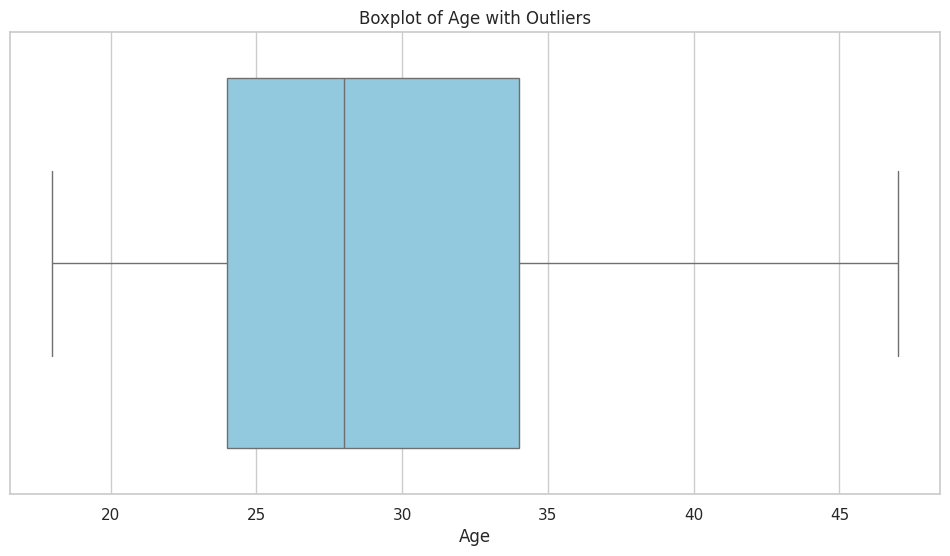

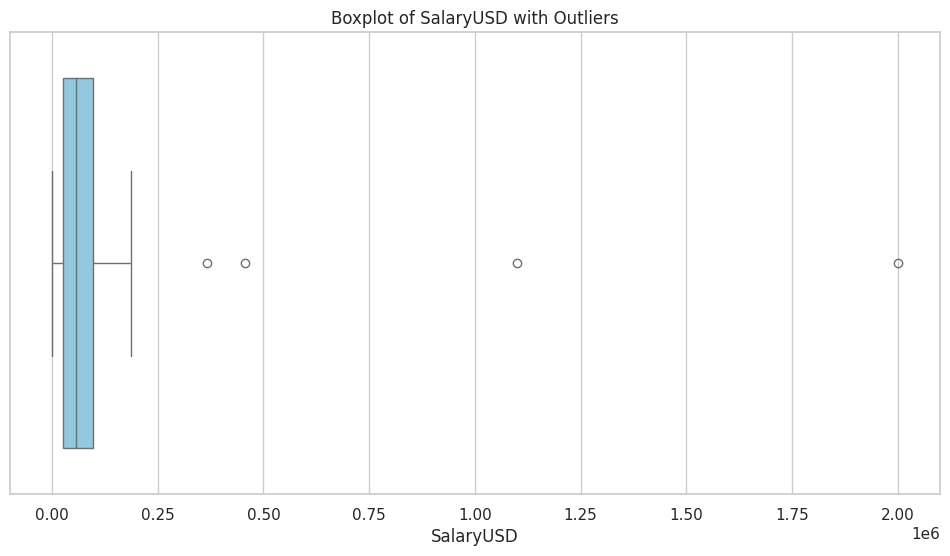

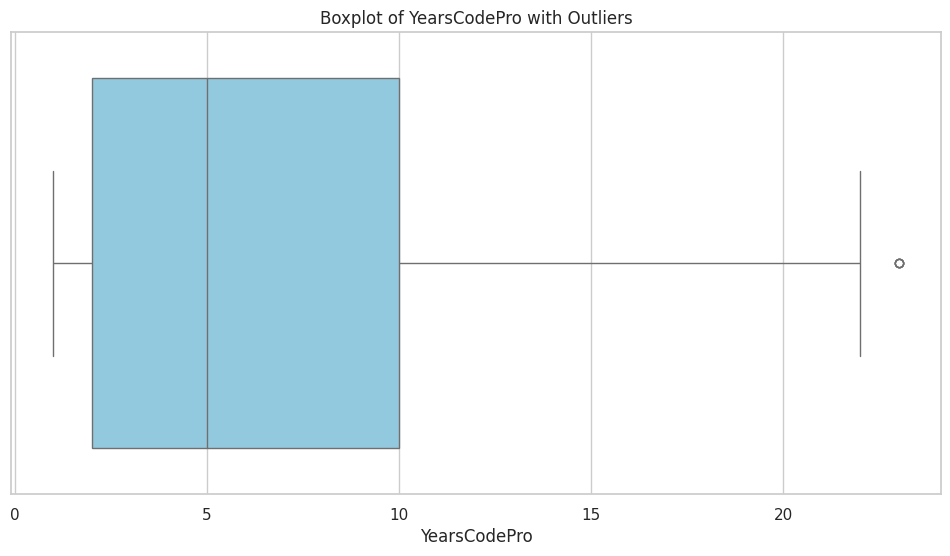

In [2126]:
# List of numerical columns to check for outliers
numeric_columns = ['Age', 'SalaryUSD', 'YearsCodePro']

# Detecting outliers in the specified columns
outliers_indices = detect_outliers_iqr(cleaned_df_2019, numeric_columns)
print(f"Number of outliers detected: {len(outliers_indices)}")

# Displaying rows that contain outliers
outliers_df = cleaned_df_2019.loc[outliers_indices]
print(outliers_df)

# Visualizing the outliers for each numeric column using box plots
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cleaned_df_2019[column], color='skyblue')
    plt.title(f'Boxplot of {column} with Outliers')
    plt.show()


We can conclude that there exist outliers in the SalaryUSD column

*Detecting outliers for categorical columns*

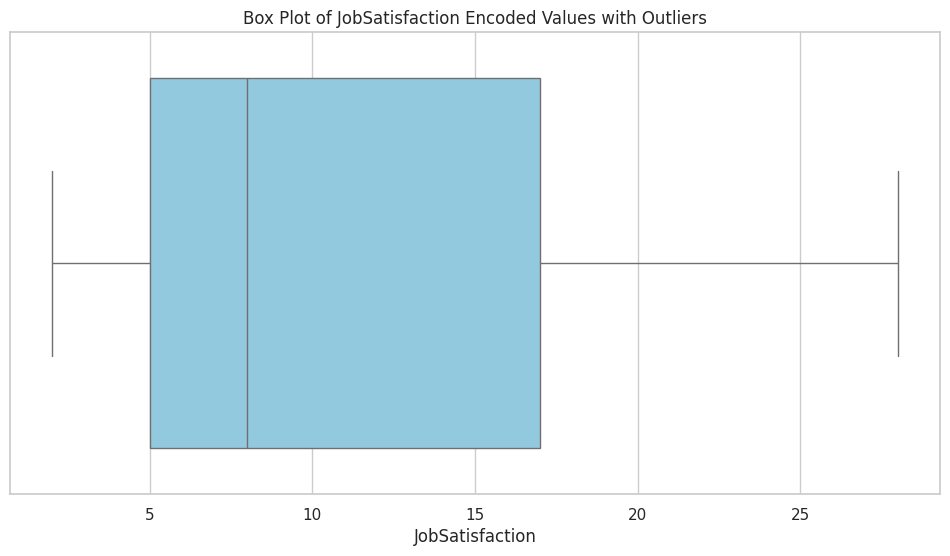

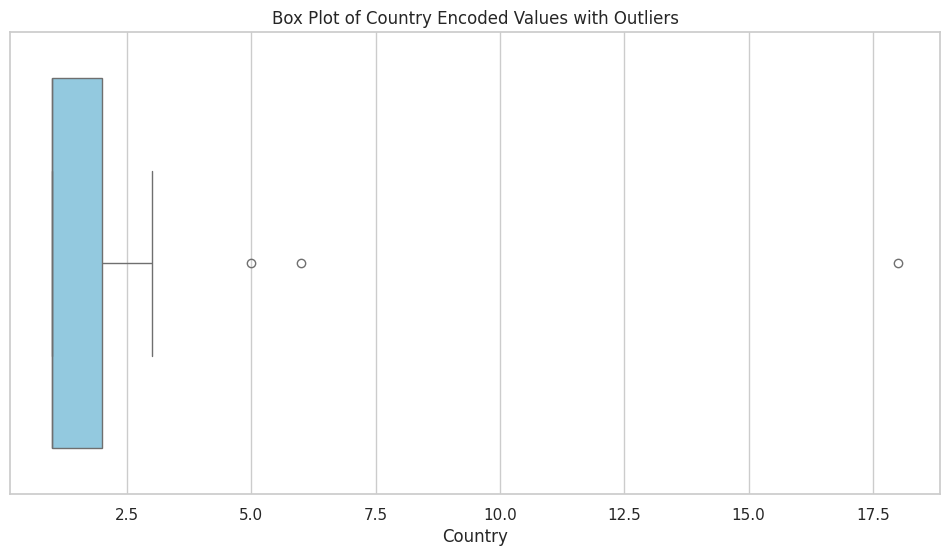

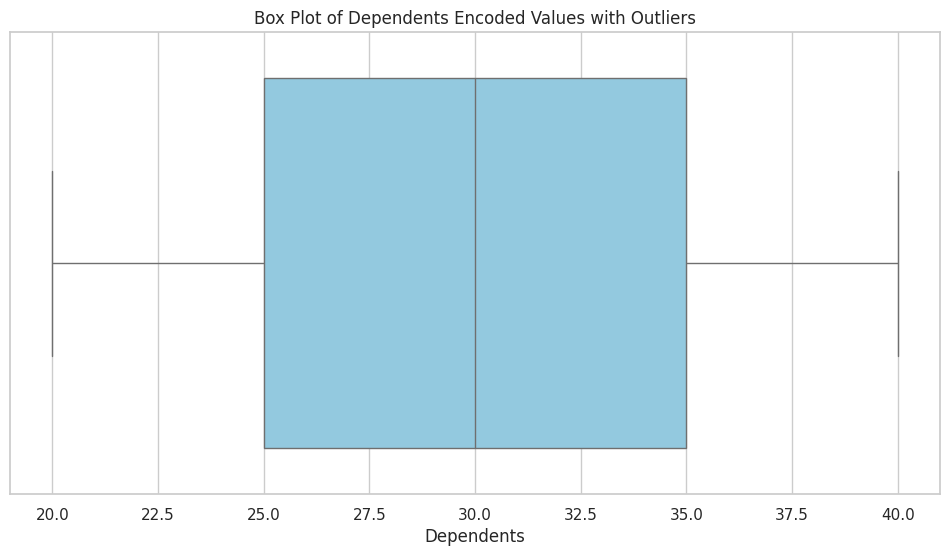

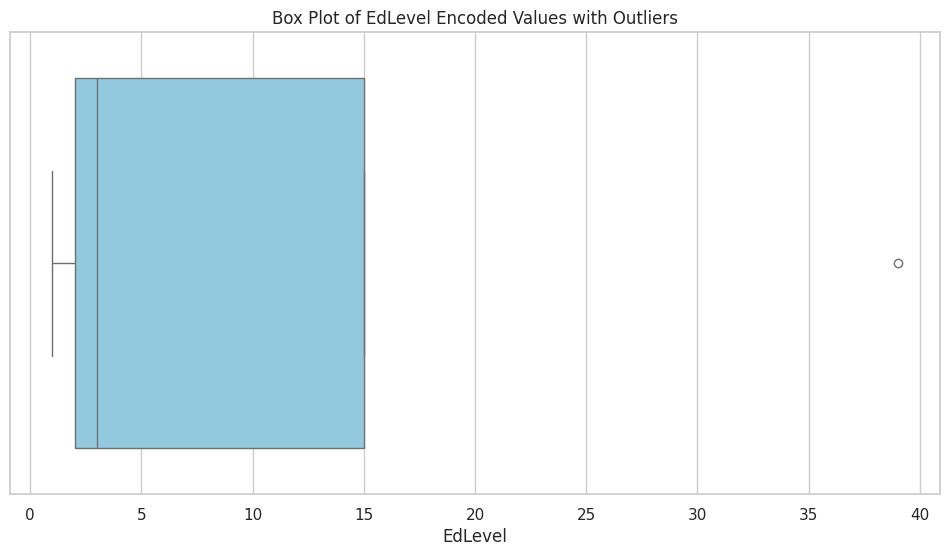

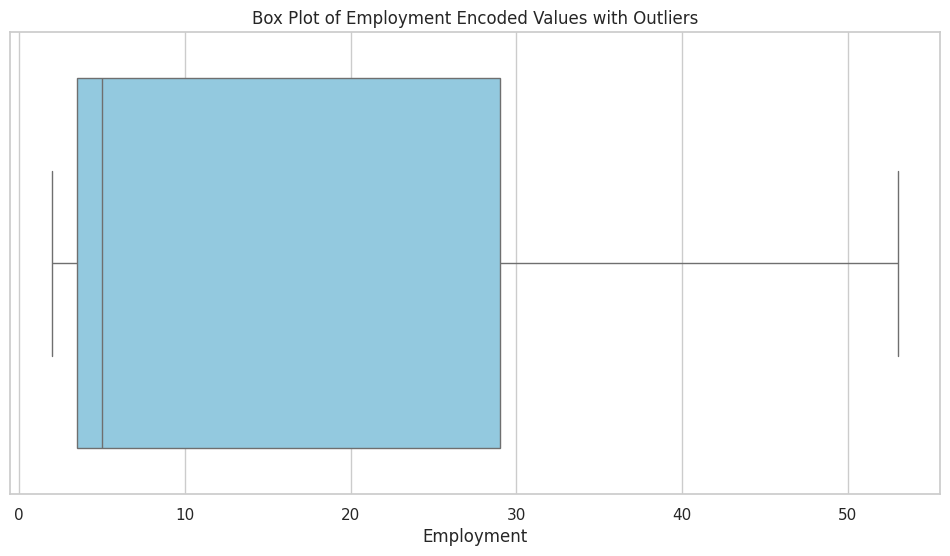

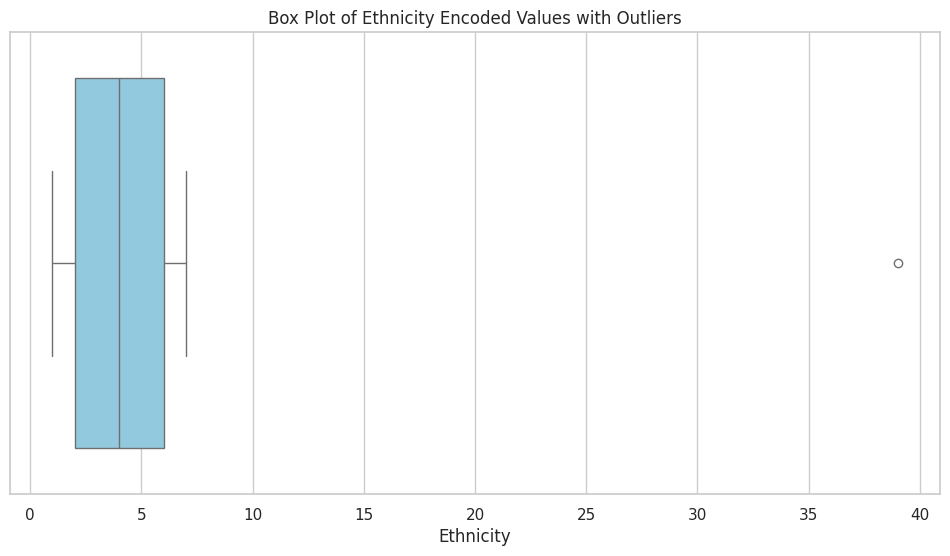

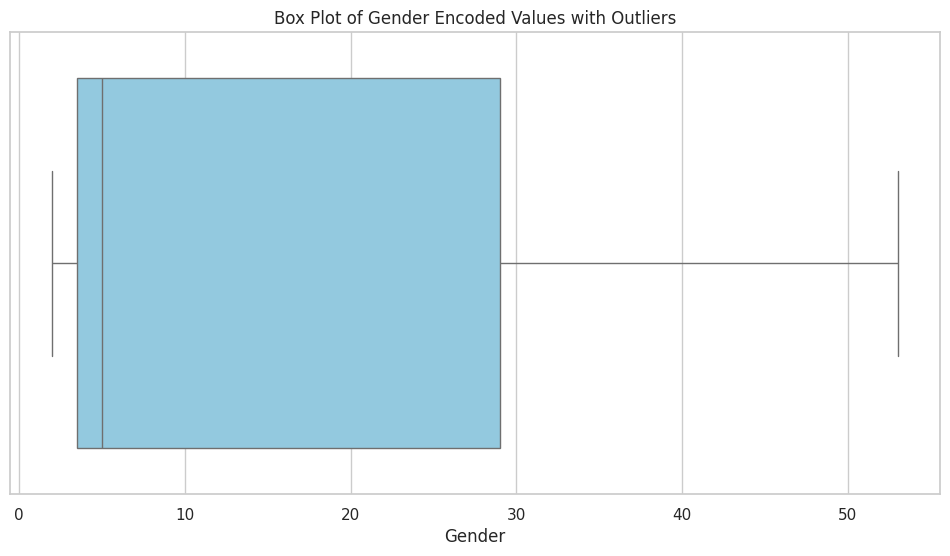

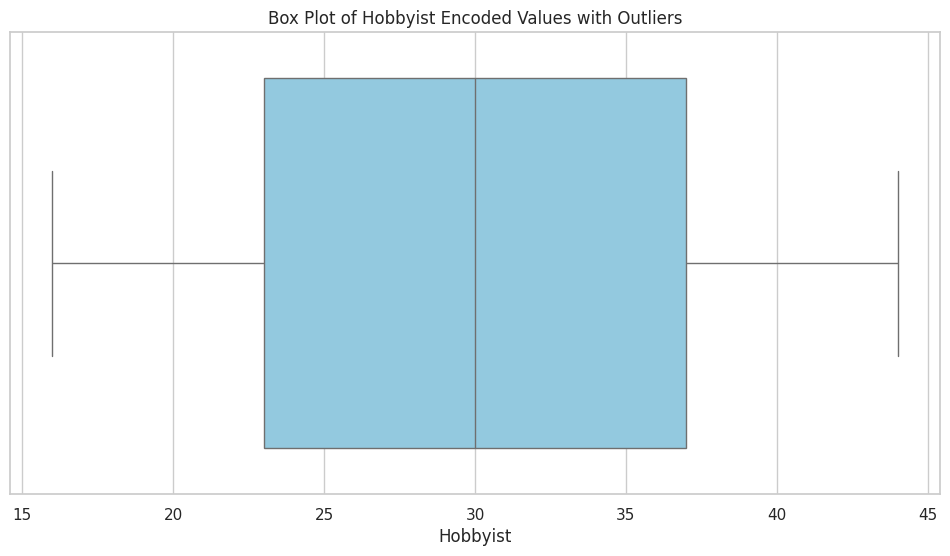

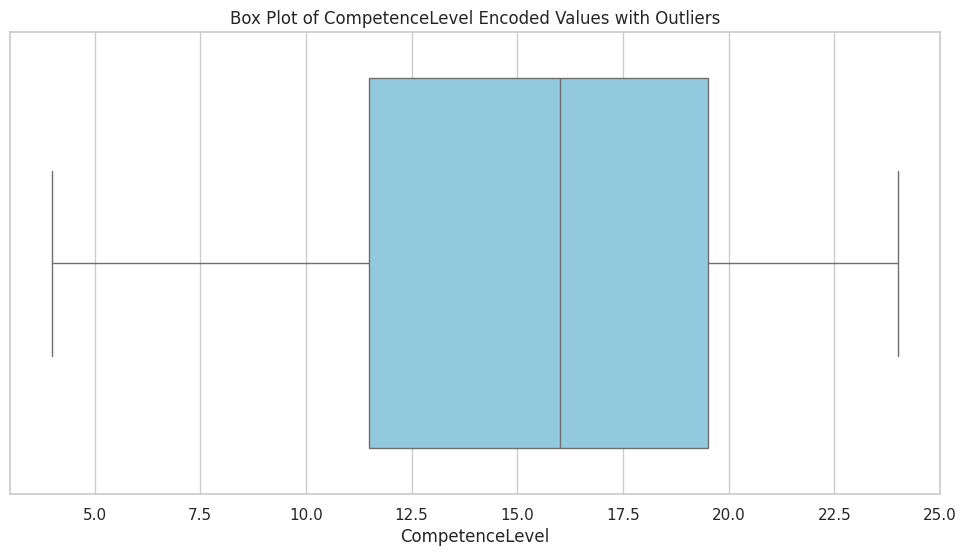

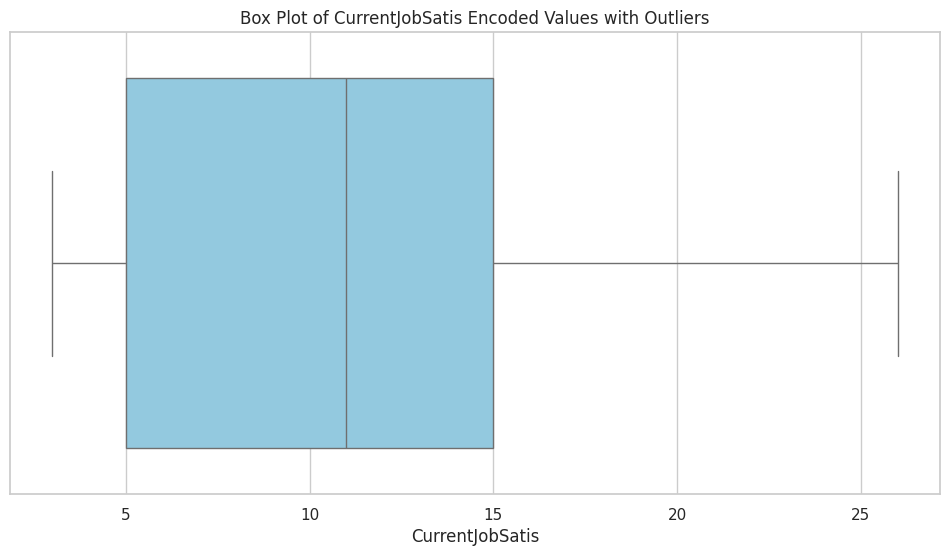

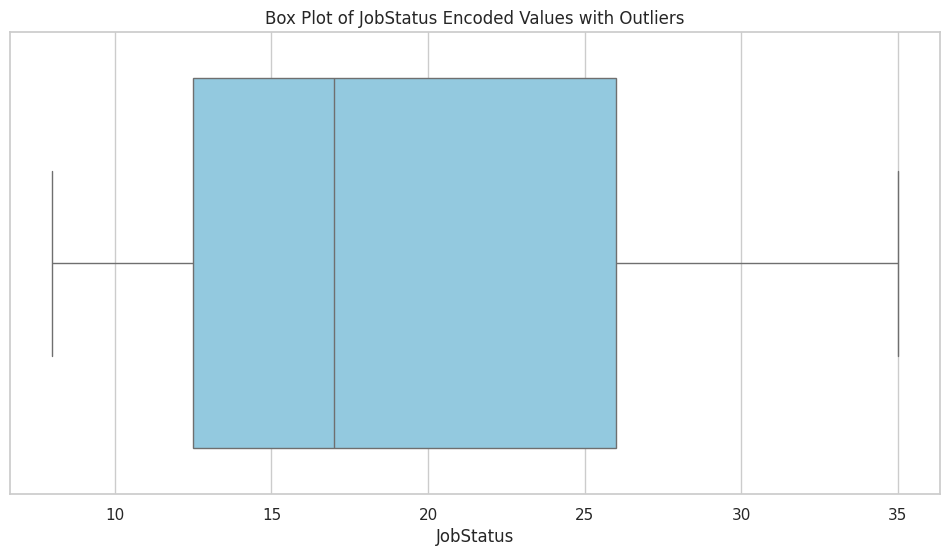

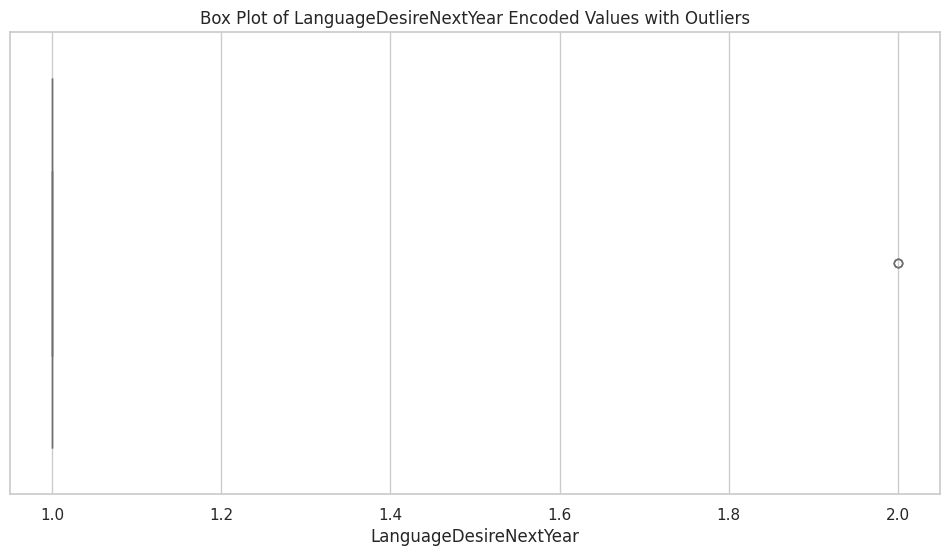

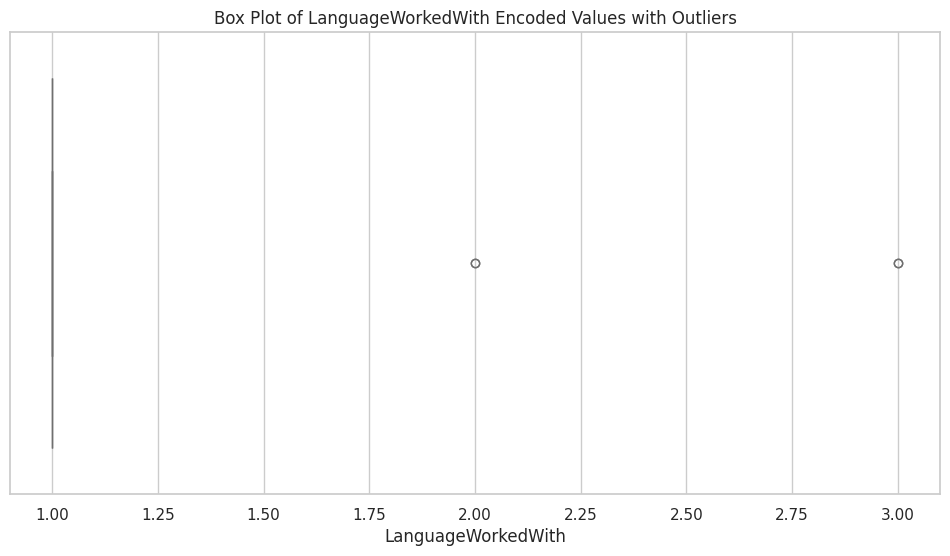

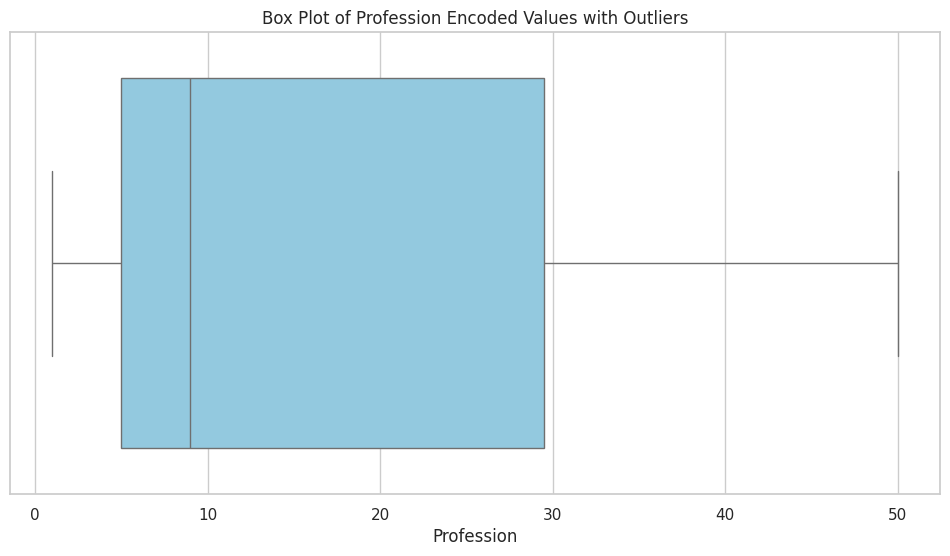

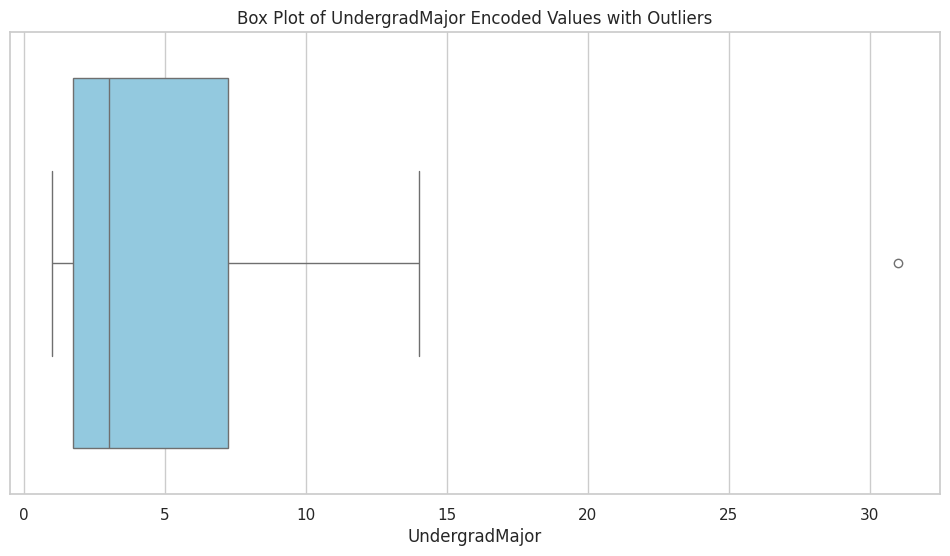

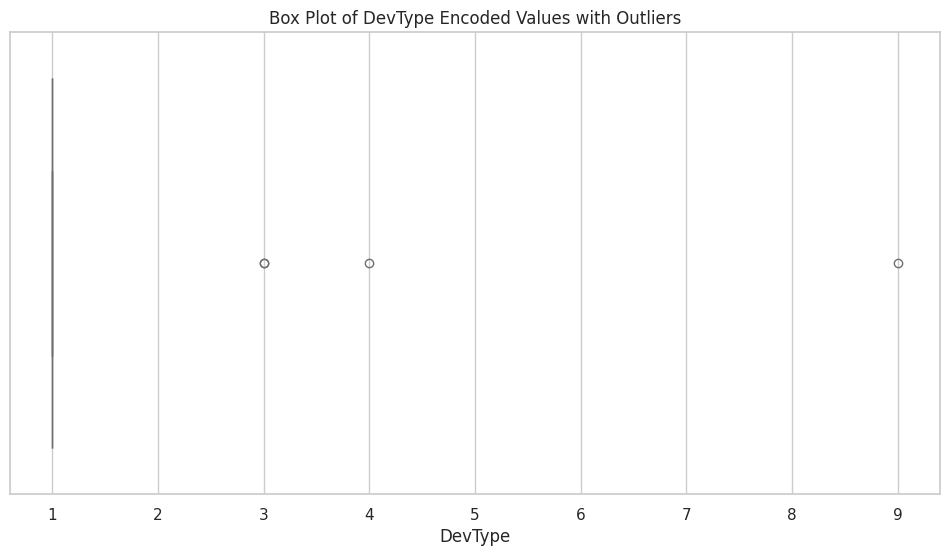

In [2127]:
# Categorical columns to check for outliers
categorical_columns_2019 = ['JobSatisfaction', 'Country', 'Dependents', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'Hobbyist', 'CompetenceLevel', 'CurrentJobSatis', 'JobStatus', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'Profession', 'UndergradMajor', 'DevType']

# Creating box plots for each categorical column
for column in categorical_columns_2019:
    plt.figure(figsize=(12, 6))
    # Since categorical data needs to be encoded, we can use value counts as a simple representation
    encoded_data = survey_df_2019[column].value_counts()
    sns.boxplot(x=encoded_data, color='skyblue')
    plt.title(f'Box Plot of {column} Encoded Values with Outliers')
    plt.xlabel(column)
    plt.show()


Hence, we can conclude that there exist outliers in Dev type column

**Removing the outliers**

*Removing the outliers for SalaryUSD column*

In [2128]:
def remove_outliers_iqr(dataframe, field):
    # Calculate the first and third quartiles
    Q1 = dataframe[field].quantile(0.25)
    Q3 = dataframe[field].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataframe to exclude outliers
    filtered_df = dataframe[(dataframe[field] >= lower_bound) & (dataframe[field] <= upper_bound)]
    return filtered_df

# Removing outliers from SalaryUSD
survey_df_2019_no_outliers = remove_outliers_iqr(survey_df_2019, 'SalaryUSD')
print(f"Original number of rows: {len(survey_df_2019)}")
print(f"Number of rows after removing outliers: {len(survey_df_2019_no_outliers)}")


Original number of rows: 60
Number of rows after removing outliers: 56


Hence, We removed all the outliers in the SalaryUSD column

*Removing the outliers for DevType column*

In [2129]:
# Assuming `DevType` outliers are identified as those with very low counts
devtype_counts = survey_df_2019['DevType'].value_counts()
# Define a threshold for what counts as an outlier, e.g., categories with fewer than 10 entries
threshold = 10
outliers_devtype = devtype_counts[devtype_counts < threshold].index

# Filter out the outliers from DevType
survey_df_2019_no_outliers = survey_df_2019_no_outliers[~survey_df_2019_no_outliers['DevType'].isin(outliers_devtype)]
print(f"Number of rows after removing DevType outliers: {len(survey_df_2019_no_outliers)}")


Number of rows after removing DevType outliers: 0


Hence, We removed all the outliers in Devtype column

#STACK OVERFLOW DATA-2020

**DATA LOADING**

In [2130]:
df2020 = pd.read_csv("/content/survey_results_sample_2020 (2).csv")
df2020.head(10)

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   
5           6                     I am a developer by profession       No   
6           7                     I am a developer by profession      Yes   
7           8                     I am a developer by profession      Yes   
8           9                     I am a developer by profession       No   
9          10                     I am a developer by profession      Yes   

    Age  Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN        13.0  Monthly        NaN            NaN             Germany   
1   NaN        19.0      NaN        NaN            NaN      United Kingdom   
2   NaN        15.0      NaN        NaN            NaN  Russian Federation   
3  25.0        18.0      NaN        NaN            NaN             Albania   
4  31.0        16.0      NaN        NaN            NaN       United States   
5   NaN        14.0      NaN        NaN            NaN             Germany   
6   NaN        18.0  Monthly        NaN            NaN               India   
7  36.0        12.0   Yearly   116000.0       116000.0       United States   
8  30.0        20.0      NaN        NaN            NaN             Tunisia   
9  22.0        14.0   Yearly    25000.0        32315.0      United Kingdom   

           CurrencyDesc  ...                  SurveyEase  \
0         European Euro  ...  Neither easy nor difficult   
1        Pound sterling  ...                         NaN   
2                   NaN  ...  Neither easy nor difficult   
3          Albanian lek  ...                         NaN   
4                   NaN  ...                        Easy   
5         European Euro  ...  Neither easy nor difficult   
6  United States dollar  ...                         NaN   
7  United States dollar  ...                        Easy   
8  United States dollar  ...  Neither easy nor difficult   
9        Pound sterling  ...                        Easy   

            SurveyLength Trans  \
0  Appropriate in length    No   
1                    NaN   NaN   
2  Appropriate in length   NaN   
3                    NaN    No   
4              Too short    No   
5  Appropriate in length   NaN   
6                    NaN   NaN   
7  Appropriate in length    No   
8  Appropriate in length    No   
9  Appropriate in length    No   

                                      UndergradMajor  WebframeDesireNextYear  \
0  Computer science, computer engineering, or sof...            ASP.NET Core   
1  Computer science, computer engineering, or sof...                     NaN   
2                                                NaN                     NaN   
3  Computer science, computer engineering, or sof...                     NaN   
4  Computer science, computer engineering, or sof...    Django;Ruby on Rails   
5                                                NaN                React.js   
6  Computer science, computer engineering, or sof...                     NaN   
7  Computer science, computer engineering, or sof...  Django;React.js;Vue.js   
8  Computer science, computer engineering, or sof...              Angular.js   
9                          Mathematics or statistics            Flask;jQuery   

     WebframeWorkedWith                             WelcomeChange WorkWeekHrs  \
0  ASP.NET;ASP.NET Core   Just as welcome now as I felt last year        50.0   
1                   NaN  Somewhat more welcome now than last year         NaN   
2                   NaN  Somewhat more welcome now than last year         NaN   
3                   NaN  Somewhat less welcome now than

**INITIAL EXPLORATION**

In [2131]:
#drop unnecessary columns
#drop_cols = [  'Age1stCode', 'CompFreq', 'CompTotal', 'CurrencyDesc', 'CurrencySymbol', 'NEWJobHunt','NEWJobHuntResearch', 'NEWLearn',
            # 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch',
             #'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith',
             #'PurchaseWhat', 'Respondent', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase',
             #'SurveyLength', 'Trans', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode']
#df.drop(drop_cols, axis=1, inplace=True)

In [2132]:
#Selecting only the required columns for analysis
#cols =['Age','Gender', 'ConvertedComp', 'Country', 'DevType', 'Hobbyist', 'EdLevel', 'Employment',
 #     'Ethnicity', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MainBranch',
  #     'UndergradMajor', 'YearsCodePro']
#df2020 = df[cols]

In [2133]:
df2020.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age  Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN        13.0  Monthly        NaN            NaN             Germany   
1   NaN        19.0      NaN        NaN            NaN      United Kingdom   
2   NaN        15.0      NaN        NaN            NaN  Russian Federation   
3  25.0        18.0      NaN        NaN            NaN             Albania   
4  31.0        16.0      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

In [2134]:
#changing the name of columns for easier understanding

df2020.rename(columns={'MainBranch': 'Profession', 'ConvertedComp': 'SalaryUSD',
                               'JobSat' : 'CurrentJobSatis', 'JobSeek' : 'JobStatus' },
                      inplace =True)

In [2135]:
#data types of the columns
df2020.dtypes

Respondent              int64
Profession             object
Hobbyist               object
Age                   float64
Age1stCode            float64
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object

In [2136]:
df2020.shape

(99, 61)

In [2137]:
print(df2020.isnull().sum())

Respondent             0
Profession             0
Hobbyist               0
Age                   24
Age1stCode             1
                      ..
WebframeWorkedWith    34
WelcomeChange          8
WorkWeekHrs           27
YearsCode              2
YearsCodePro          21
Length: 61, dtype: int64


**Data Cleaning**

*Data Validation- percentage of missing values*

In [2138]:
#Finding % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df2020.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total cell: ', total_cells)
print('Total missing values: ', total_missing)
print('Missing: ', missing_percent, '%')

Total cell:  6039
Total missing values:  1410
Missing:  23.34823646299056 %


Hence, the data contains 28% missing data

*Cleaning the Gender column*

In [2139]:
df2020['Gender'].isnull().sum()

11

In [2140]:
#Counting number of each gender
df2020.groupby('Gender')['Gender'].count()

Gender
Man                                                      79
Man;Non-binary, genderqueer, or gender non-conforming     1
Woman                                                     8
Name: Gender, dtype: int64

In [2141]:
#Assigining the surveyors who havent mentioned their gender to Non-Binary category
df2020['Gender'] = df['Gender'].fillna('Non-binary')

#Grouping genders into 3 groups Man, Womanand Non-binary
df2020['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming', 'Man', inplace =True)
df2020['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming', 'Woman', inplace =True)
df2020['Gender'].replace('Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)
df2020['Gender'].replace('Woman;Man', 'Non-binary', inplace =True)
df2020['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)

In [2142]:
#Counting number of each gender after
df2020.groupby('Gender')['Gender'].count()

Gender
Female             6
Male              41
Non-conforming     9
Name: Gender, dtype: int64

In [2143]:
print('df shape after clean Gender: ', df2020.shape)

df shape after clean Gender:  (99, 61)


In [2144]:
df2020['Gender'].isnull().sum()

43

Hence, there are no existing null values in the gender column

*Cleaning the Age column*

In [2145]:
df2020['Age'].isnull().sum()

24

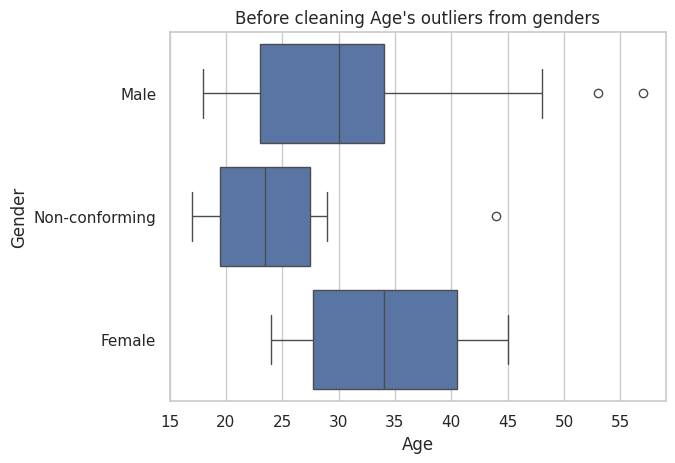

In [2146]:
#Plottig boxplot to check outliers
sns.boxplot(x='Age', y= 'Gender', data=df2020)
plt.title("Before cleaning Age's outliers from genders")
plt.show()

We can see outliers in the man gender

In [2147]:
#Cleaning Age's outliers from each gender)
#df2020 = df2020[(df['Age'] >= 15) & (df2020['Age'] <= 60)]

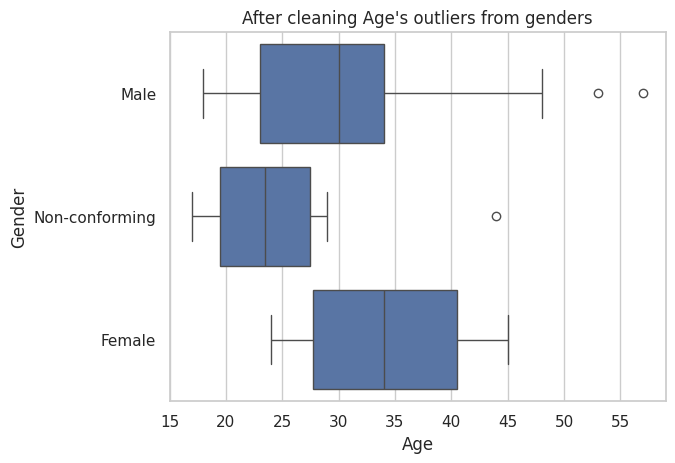

In [2148]:
#Plottig boxplot to check outliers after cleaning some outliers
sns.boxplot(x='Age', y= 'Gender', data=df2020)
plt.title("After cleaning Age's outliers from genders")
plt.show()

We cleaned all the Outliers

In [2149]:
#fill Age's null values with mean of each gender
#means = df2020.groupby('Gender')['Age'].transform('mean')
#df2020['Age'] = df2020['Age'].fillna(means)

#convert from float to int
#df2020['Age'] = df2020['Age'].apply(str).str[:2]
#df2020['Age'] = df2020['Age'].apply(int)

In [2150]:
print('df shape after clean Age: ', df2020.shape)

df shape after clean Age:  (99, 61)


In [2151]:
df2020['Age'].isnull().sum()

24

Hence we cleaned all the existing null values in the age column

*Cleaning the Edlevel column*

In [2152]:
df2020['EdLevel'].isnull().sum()

6

In [2153]:
df2020['EdLevel'].value_counts()

EdLevel
Bachelor‚Äôs degree (B.A., B.S., B.Eng., etc.)                                        44
Master‚Äôs degree (M.A., M.S., M.Eng., MBA, etc.)                                     14
Some college/university study without earning a degree                                14
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8
Associate degree (A.A., A.S., etc.)                                                    7
Professional degree (JD, MD, etc.)                                                     3
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3
Name: count, dtype: int64

In [2154]:
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                    (df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree')
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
df2020 = refactor_ed(df2020)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df2020['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [2155]:
df2020['EdLevel'].value_counts()

EdLevel
Bachelors       64
No Degree       22
Associate        7
Professional     3
Doctorate        3
Name: count, dtype: int64

In [2156]:
df2020['EdLevel'].isnull().sum()

0

Hence there are no existing null values in the Edlevel column

*Cleaning the JobSat (current job satis) column*

In [2157]:
df2020['CurrentJobSatis'].isnull().sum()

21

In [2158]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        32
Slightly satisfied                    16
Slightly dissatisfied                 12
Very dissatisfied                     11
Neither satisfied nor dissatisfied     7
Name: count, dtype: int64

In [2159]:
df2020['CurrentJobSatis'].fillna(method='ffill', inplace=True)

In [2160]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        37
Slightly satisfied                    19
Very dissatisfied                     15
Slightly dissatisfied                 15
Neither satisfied nor dissatisfied    13
Name: count, dtype: int64

In [2161]:
df2020['CurrentJobSatis'].isnull().sum()

0

Hence there are no existing null values in the currentjobsatis column

*Cleaning the Jobseek(job status ) column*

In [2162]:
df2020['JobStatus'].isnull().sum()

4

In [2163]:
df2020.groupby('JobStatus')['JobStatus'].count()

JobStatus
I am actively looking for a job                                   14
I am not interested in new job opportunities                      32
I‚Äôm not actively looking, but I am open to new opportunities    49
Name: JobStatus, dtype: int64

In [2164]:
df2020['JobStatus'].fillna(method='ffill', inplace=True)

In [2165]:
#Refactoring JobStatus
#Changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''

    conditions_job = [(df['JobStatus'] == 'I am actively looking for a job'),
                    (df['JobStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobStatus'] == 'I’m not actively looking, but I am open to new opportunities')]

    choices_job = ['Seeking', 'Not seeking']
    df['JobSeek'] = np.select(conditions_job, choices_job, default=np.nan)
    return df

df2020 = refactor_job(df2020)

In [2166]:
df2020.groupby('JobSeek')['JobSeek'].count()

JobSeek
Not seeking    33
Seeking        14
nan            52
Name: JobSeek, dtype: int64

In [2167]:
df2020['JobStatus'].isnull().sum()

0

Hence there are no existing null values in the job status column

*Cleaning the DevType column*

In [2168]:
df2020['DevType'].isnull().sum()

20

In [2169]:
df2020['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                                                                                                                                                     11
Developer, back-end                                                                                                                                                                                                                        6
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                             5
Designer;Developer, front-end                                                                                                                                                                                                              2
Developer, back-end;Developer, desktop or en

In [2170]:
df2020['DevType'] = df2020['DevType'].bfill().ffill()

In [2171]:
df2020['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                                                                     16
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                             7
Developer, back-end                                                                                                                                        6
Designer;Developer, front-end;Developer, mobile                                                                                                            4
Data or business analyst;Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;System administrator                        3
Developer, front-end;Developer, full-stack                                                                                                                 3
Developer, back-end;Developer, full-stack;Develope

In [2172]:
df.shape

(56, 134)

In [2173]:
df2020['DevType'].isnull().sum()

0

Hence there are no existing null values in the DevType column

*Cleaning the Ethnicity column*

In [2174]:
df2020['Ethnicity'].isnull().sum()

17

In [2175]:
#count number of each Ethnicity
df2020.groupby('Ethnicity')['Ethnicity'].count()
df2020['Ethnicity'].value_counts().nlargest(10)

Ethnicity
White or of European descent                                                                                     63
Hispanic or Latino/a/x                                                                                            6
East Asian                                                                                                        4
Black or of African descent                                                                                       2
South Asian                                                                                                       2
Middle Eastern                                                                                                    1
White or of European descent;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)     1
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)                                  1
Hispanic or Latino/a/x;White or of European descent           

In [2176]:
#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
#df2020.loc[df['Ethnicity'].str.match('Biracial') == True, 'Ethnicity'] = 'Biracial'
#df2020.loc[df['Ethnicity'].str.match('Black or of African descent') == True, 'Ethnicity'] = 'Black or of African descent'
#df2020.loc[df['Ethnicity'].str.match('East Asian') == True, 'Ethnicity'] = 'East Asian'
#df2020.loc[df['Ethnicity'].str.match('Hispanic or Latino') == True, 'Ethnicity'] = 'Hispanic or Latino'
#df2020.loc[df['Ethnicity'].str.match('Indigenous') == True, 'Ethnicity'] = 'Indigenous'
#df2020.loc[df['Ethnicity'].str.match('Middle Eastern') == True, 'Ethnicity'] = 'Middle Eastern'
#df2020.loc[df['Ethnicity'].str.match('South Asian') == True, 'Ethnicity'] = 'South Asian'
#df2020.loc[df['Ethnicity'].str.match('White or of European descent') == True, 'Ethnicity'] = 'White or of European descent'
#df2020.loc[df['Ethnicity'].str.match('Multiracial') == True, 'Ethnicity'] = 'Multiracial'

In [2177]:
df2020.groupby('Ethnicity')['Ethnicity'].count() #11 groups of Ethnicity after combining
df2020['Ethnicity'].value_counts()

Ethnicity
White or of European descent                                                                                     63
Hispanic or Latino/a/x                                                                                            6
East Asian                                                                                                        4
Black or of African descent                                                                                       2
South Asian                                                                                                       2
Middle Eastern                                                                                                    1
White or of European descent;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)     1
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)                                  1
Hispanic or Latino/a/x;White or of European descent           

In [2178]:
df2020['Ethnicity']=df2020.groupby(['Country'])['Ethnicity'].bfill().ffill()

In [2179]:
#count number of each Ethnicity
df2020.groupby('Ethnicity')['Ethnicity'].count()
df2020['Ethnicity'].value_counts()

Ethnicity
White or of European descent                                                                                     74
Hispanic or Latino/a/x                                                                                            7
East Asian                                                                                                        5
South Asian                                                                                                       4
Black or of African descent                                                                                       3
Middle Eastern                                                                                                    2
White or of European descent;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)     1
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)                                  1
Hispanic or Latino/a/x;White or of European descent           

In [2180]:
df2020['Ethnicity'].isnull().sum()

0

Hence there are no existing null values in the Ethnicity column

*Cleaning the Language Desired next year column*

In [2181]:
df2020['LanguageDesireNextYear'].isnull().sum()

9

In [2182]:
df2020['LanguageDesireNextYear'].value_counts().nlargest(10)

LanguageDesireNextYear
C#                                                   3
HTML/CSS;Java;JavaScript;Python;R;SQL                2
C++;Python                                           2
HTML/CSS;JavaScript;TypeScript                       2
Go                                                   2
Go;Kotlin;TypeScript                                 2
HTML/CSS;JavaScript                                  2
C#;HTML/CSS;JavaScript                               2
Python;TypeScript                                    2
C#;HTML/CSS;Java;JavaScript;Perl;Python;Swift;VBA    1
Name: count, dtype: int64

In [2183]:
#df2020['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)
df2020['LanguageDesireNextYear']=df2020['LanguageDesireNextYear'].bfill().ffill()

In [2184]:
df2020['LanguageDesireNextYear'].value_counts().nlargest(10)

LanguageDesireNextYear
C#                                                          3
Java;Kotlin                                                 3
C++;Python                                                  3
Go;Kotlin;TypeScript                                        2
C#;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL;TypeScript    2
Julia;Python;Rust;Swift                                     2
HTML/CSS;JavaScript;PHP;SQL                                 2
Bash/Shell/PowerShell;C#;Dart;Go;TypeScript                 2
JavaScript;Swift                                            2
Go                                                          2
Name: count, dtype: int64

In [2185]:
df2020['LanguageDesireNextYear'].isnull().sum()

0

Hence, There are no existing null values in the Language desire next year column

*Cleaning the Language worked with column*

In [2186]:
df2020['LanguageWorkedWith'].isnull().sum()

1

In [2187]:
df2020['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                                5
C#;HTML/CSS;JavaScript;SQL                                                 2
Bash/Shell/PowerShell;C#;C++                                               2
C#;HTML/CSS;JavaScript                                                     2
Bash/Shell/PowerShell;HTML/CSS;JavaScript                                  1
C#;C++;HTML/CSS;Java;Python;Ruby;SQL;Swift                                 1
C#;HTML/CSS;Java;JavaScript;PHP;Ruby;TypeScript                            1
HTML/CSS;Python                                                            1
Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaScript;PHP;Python    1
HTML/CSS;JavaScript;Ruby                                                   1
Name: count, dtype: int64

In [2188]:
#df2020['LanguageWorkedWith'].fillna(method='ffill', inplace=True)
df2020['LanguageWorkedWith']=df2020['LanguageWorkedWith'].bfill().ffill()

In [2189]:
df2020['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                                5
C#;HTML/CSS;JavaScript                                                     2
HTML/CSS;Ruby;SQL                                                          2
Bash/Shell/PowerShell;C#;C++                                               2
C#;HTML/CSS;JavaScript;SQL                                                 2
HTML/CSS;JavaScript;Perl;SQL                                               1
Bash/Shell/PowerShell;JavaScript;Python;Swift                              1
C#;HTML/CSS;Java;JavaScript;PHP;Ruby;TypeScript                            1
HTML/CSS;Python                                                            1
Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaScript;PHP;Python    1
Name: count, dtype: int64

In [2190]:
df2020['LanguageWorkedWith'].isnull().sum()

0

Hence, There are no existing null values in the language worked with column

*Cleaning the Main Branch (Profession) column*

In [2191]:
df2020['Profession'].isnull().sum()

0

In [2192]:
df2020.groupby('Profession')['Profession'].count()

Profession
I am a developer by profession                                                   75
I am a student who is learning to code                                           14
I am not primarily a developer, but I write code sometimes as part of my work     6
I code primarily as a hobby                                                       2
I used to be a developer by profession, but no longer am                          2
Name: Profession, dtype: int64

In [2193]:
df2020.dropna(subset=['Profession'], inplace = True)

In [2194]:
#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]

    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)
    return df

df2020 = refactor_prof(df2020)

In [2195]:
df2020['Profession'].value_counts()

Profession
Developer        75
Student          14
Non developer     6
Novoice           2
Ex-Developer      2
Name: count, dtype: int64

In [2196]:
df2020['Profession'].isnull().sum()

0

Hence, There are no existing null values in the Profession columns

*Cleaning the Undergrad column*

In [2197]:
df2020['UndergradMajor'].isnull().sum()

13

In [2198]:
df2020.groupby('UndergradMajor')['UndergradMajor'].count()

UndergradMajor
A health science (such as nursing, pharmacy, radiology, etc.)                      2
A humanities discipline (such as literature, history, philosophy, etc.)            2
A natural science (such as biology, chemistry, physics, etc.)                      3
A social science (such as anthropology, psychology, political science, etc.)       1
Another engineering discipline (such as civil, electrical, mechanical, etc.)       5
Computer science, computer engineering, or software engineering                   56
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     2
I never declared a major                                                           2
Information systems, information technology, or system administration              4
Mathematics or statistics                                                          4
Web development or web design                                                      5
Name: UndergradMajor, dtype: int64

In [2199]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (such as civil, electrical, mechanical, etc.)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (such as biology, chemistry, physics, etc.)')
                        |(df['UndergradMajor'] == 'A health science (such as nursing, pharmacy, radiology, etc.)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (such as accounting, finance, marketing, etc.)'),
                        (df['UndergradMajor'] == 'A humanities discipline (such as literature, history, philosophy, etc.)')
                        | (df['UndergradMajor'] == 'A social science (such as anthropology, psychology, political science, etc.)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (such as graphic design, music, studio art, etc.)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]

    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

df2020 = refactor_major(df2020)
df2020['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [2200]:
df2020.groupby('UndergradMajor')['UndergradMajor'].count()

UndergradMajor
Arts and Science     5
Computer Science    56
Engineering          5
Info Systems         4
Math/Stat            4
No major            15
Other Science        5
Web Design/Dev       5
Name: UndergradMajor, dtype: int64

In [2201]:
df2020['UndergradMajor'].isnull().sum()

0

Hence There are no existing null values in the UnderGradMajor column

*Cleaning the Employment column*

In [2202]:
df2020['Employment'].isnull().sum()

2

In [2203]:
df2020.groupby('Employment')['Employment'].count()

Employment
Employed full-time                                      68
Employed part-time                                       2
Independent contractor, freelancer, or self-employed     9
Not employed, but looking for work                       5
Student                                                 13
Name: Employment, dtype: int64

In [2204]:
df2020.dropna(subset=['Employment'], inplace = True)

In [2205]:
#Refactoring Employment
df2020['Employment'].replace('Employed full-time', 'Full-time', inplace =True)
df2020['Employment'].replace('Employed part-time', 'Part-time',inplace =True)
df2020['Employment'].replace('Independent contractor, freelancer, or self-employed', 'Self-employed', inplace =True)
df2020['Employment'].replace('Not employed, but looking for work', 'Not employed', inplace =True)

In [2206]:
df2020.groupby('Employment')['Employment'].count()

Employment
Full-time        68
Not employed      5
Part-time         2
Self-employed     9
Student          13
Name: Employment, dtype: int64

In [2207]:
df2020['Employment'].isnull().sum()

0

Hence, There are no existing values in the Employment column

*Cleaning the country column*

In [2208]:
df2020['Country'].isnull().sum()

0

In [2209]:
df2020.groupby('Country')['Country'].count()

Country
Austria                1
Belgium                2
Brazil                 2
Canada                12
China                  1
Czech Republic         1
France                 8
Germany                6
Greece                 1
India                  4
Indonesia              1
Israel                 1
Italy                  1
Mexico                 2
Netherlands            1
Poland                 1
Portugal               1
Russian Federation     1
Spain                  2
Sweden                 1
Tunisia                1
Ukraine                1
United Kingdom        13
United States         32
Name: Country, dtype: int64

In [2210]:
df2020['Country'].isnull().sum()

0

Hence, There are no existing null values in the Country column

*Cleaning the Years Code Pro column*

In [2211]:
df2020['YearsCodePro'].isnull().sum()

20

In [2212]:
#convert YearsCodePro data type from obj to int
df2020["YearsCodePro"]=pd.to_numeric(df2020["YearsCodePro"],errors='coerce')

#fill YearsCodePro's null values with mean
means = df2020['YearsCodePro'].mean() #means 8.673142457693764
df2020['YearsCodePro'] = df2020['YearsCodePro'].fillna(means)
df2020['YearsCodePro'] = df2020['YearsCodePro'].round(2)

In [2213]:
df2020['YearsCodePro'].isnull().sum()

0

Hence, There are no existing null values in the years code pro column

*Cleaning the Hobbyist column*

In [2214]:
df2020['Hobbyist'].isnull().sum()

0

In [2215]:
df2020.groupby('Hobbyist')['Hobbyist'].count()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Hobbyist
No     25
Yes    72
Name: Hobbyist, dtype: int64

In [2216]:
df2020['Hobbyist'].isnull().sum()

0

Hence, There are no existing null values in the Hobbyist column

*Cleaning the convertedcomp (SalaryUSD) column*

In [2217]:
df2020['SalaryUSD'].isnull().sum()

44

In [2218]:
df2020['SalaryUSD'].value_counts().nlargest()

SalaryUSD
130000.0    2
37816.0     2
116000.0    1
103615.0    1
160000.0    1
Name: count, dtype: int64

In [2219]:
means = df2020.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform('mean')
df2020['SalaryUSD'] = df2020['SalaryUSD'].fillna(means)

In [2220]:
mean_salary = df2020.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

Age   EdLevel       Country       
34.0  Bachelors     United States     1.176000e+06
44.0  Bachelors     United States     8.900000e+05
25.0  Bachelors     France            5.945390e+05
32.0  Bachelors     United States     4.948333e+05
35.0  Professional  United States     2.500000e+05
28.0  Bachelors     United States     1.300000e+05
38.0  Bachelors     United States     1.250000e+05
34.0  Bachelors     United Kingdom    1.240920e+05
48.0  Associate     United States     1.170000e+05
36.0  Bachelors     United States     1.160000e+05
Name: SalaryUSD, dtype: float64

In [2221]:
df2020['SalaryUSD'].value_counts().nlargest()

SalaryUSD
79000.0     3
37816.0     3
130000.0    2
116000.0    1
94500.0     1
Name: count, dtype: int64

In [2222]:
df2020['SalaryUSD'].isnull().sum()

41

In [2223]:
df2020.dropna(subset=['SalaryUSD'], inplace = True)

In [2224]:
df2020['SalaryUSD'].isnull().sum()

0

Hence there are no existing null values in the SalaryUSD column

*Cleaned 2020 dataset*

In [2225]:
print(df2020.isnull().sum())

Respondent       0
Profession       0
Hobbyist         0
Age              6
Age1stCode       0
                ..
WelcomeChange    3
WorkWeekHrs      2
YearsCode        0
YearsCodePro     0
JobSeek          0
Length: 62, dtype: int64


In [2226]:
#resetting the index values
df2020 = df2020.reset_index(drop=True)

In [2227]:
df2020.head(5)

Respondent     Profession Hobbyist   Age  Age1stCode CompFreq  CompTotal  \
0           8      Developer      Yes  36.0        12.0   Yearly   116000.0   
1          10      Developer      Yes  22.0        14.0   Yearly    25000.0   
2          11      Developer      Yes  23.0        13.0   Yearly    31000.0   
3          12      Developer       No  49.0        42.0  Monthly     1100.0   
4          13  Non developer      Yes  53.0        14.0  Monthly     3000.0   

   SalaryUSD         Country          CurrencyDesc  ...  \
0   116000.0   United States  United States dollar  ...   
1    32315.0  United Kingdom        Pound sterling  ...   
2    40070.0  United Kingdom        Pound sterling  ...   
3    14268.0           Spain         European Euro  ...   
4    38916.0     Netherlands         European Euro  ...   

            SurveyLength Trans    UndergradMajor   WebframeDesireNextYear  \
0  Appropriate in length    No  Computer Science   Django;React.js;Vue.js   
1  Appropriate in length    No         Math/Stat             Flask;jQuery   
2  Appropriate in length    No  Computer Science  Angular;Django;React.js   
3  Appropriate in length    No         Math/Stat           ASP.NET;jQuery   
4               Too long    No          No major                      NaN   

                   WebframeWorkedWith  \
0                               Flask   
1                        Flask;jQuery   
2  Angular;Angular.js;Django;React.js   
3                      ASP.NET;jQuery   
4                                 NaN   

                              WelcomeChange WorkWeekHrs YearsCode  \
0   Just as welcome now as I felt last year        39.0        17   
1  Somewhat more welcome now than last year        36.0         8   
2   Just as welcome now as I felt last year        40.0        10   
3   Just as welcome now as I felt last year        40.0         7   
4     A lot less welcome now than last year        36.0        35   

  YearsCodePro      JobSeek  
0         13.0          nan  
1          4.0          nan  
2          2.0      Seeking  
3          7.0          nan  
4         20.0  Not seeking  

[5 rows x 62 columns]

In [2228]:
df2020.info()#after cleaning the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    56 non-null     int64  
 1   Profession                    56 non-null     object 
 2   Hobbyist                      56 non-null     object 
 3   Age                           50 non-null     float64
 4   Age1stCode                    56 non-null     float64
 5   CompFreq                      54 non-null     object 
 6   CompTotal                     53 non-null     float64
 7   SalaryUSD                     56 non-null     float64
 8   Country                       56 non-null     object 
 9   CurrencyDesc                  54 non-null     object 
 10  CurrencySymbol                54 non-null     object 
 11  DatabaseDesireNextYear        42 non-null     object 
 12  DatabaseWorkedWith            50 non-null     object 
 13  DevType

*After cleaning the 2020 dataset*

In [2229]:
#Find % of missing data
missing_count = df2020.isnull().sum() #number of missing
total_cells = np.product(df2020.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  3472
Total missing :  252
Missing Percentage:  7.258064516129032 %


Hence, There are no missing or null values in the data set.

**Outlier Detection**

In [2230]:
def detect_outliers_iqr(dataframe, fields):
    outliers_indices = []
    for feature in fields:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)].index
        outliers_indices.extend(outliers)
    return list(set(outliers_indices))


In [2231]:
# Numerical columns to check for outliers
numeric_columns = ['Age', 'SalaryUSD', 'YearsCodePro']

# Detecting outliers
outliers_indices = detect_outliers_iqr(df2020, numeric_columns)
print(f"Number of outliers detected: {len(outliers_indices)}")

# Displaying rows that contain outliers
outliers_df = df2020.loc[outliers_indices]
print(outliers_df)


Number of outliers detected: 5
    Respondent Profession Hobbyist   Age  Age1stCode CompFreq  CompTotal  \
32          65  Developer      Yes  34.0        13.0  Monthly    98000.0   
33          67  Developer      Yes  35.0         6.0   Yearly   250000.0   
34          69  Developer      Yes  25.0        12.0   Yearly   550000.0   
8           18  Developer      Yes  32.0        12.0  Monthly   105000.0   
29          57  Developer       No  44.0        12.0  Monthly   135000.0   

    SalaryUSD        Country          CurrencyDesc  ...  \
32  1176000.0  United States  United States dollar  ...   
33   250000.0  United States  United States dollar  ...   
34   594539.0         France         European Euro  ...   
8   1260000.0  United States  United States dollar  ...   
29  1620000.0  United States  United States dollar  ...   

             SurveyLength Trans    UndergradMajor WebframeDesireNextYear  \
32  Appropriate in length    No  Computer Science                    NaN   
33  A

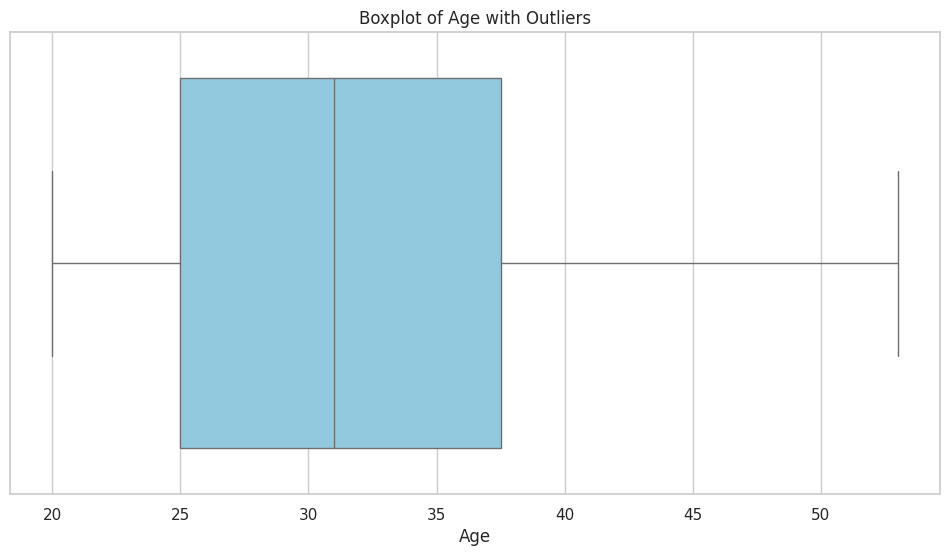

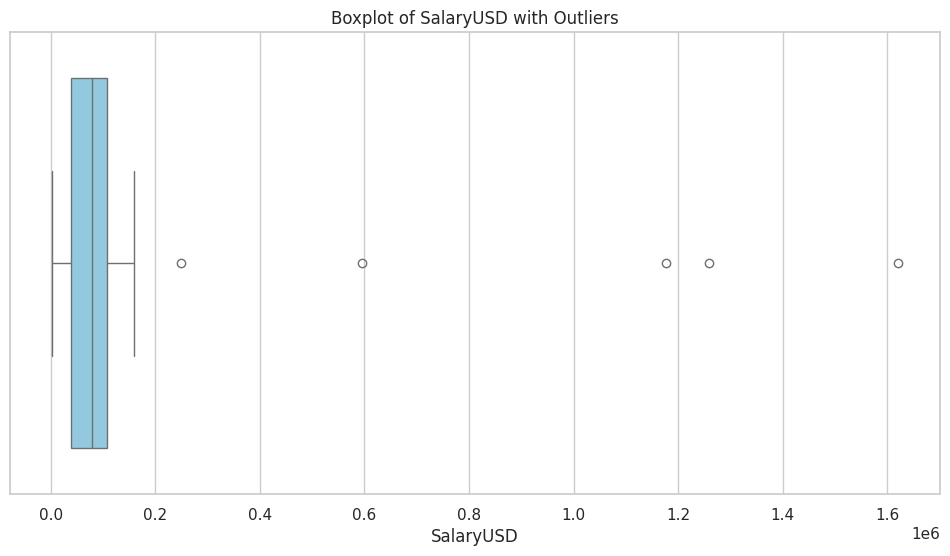

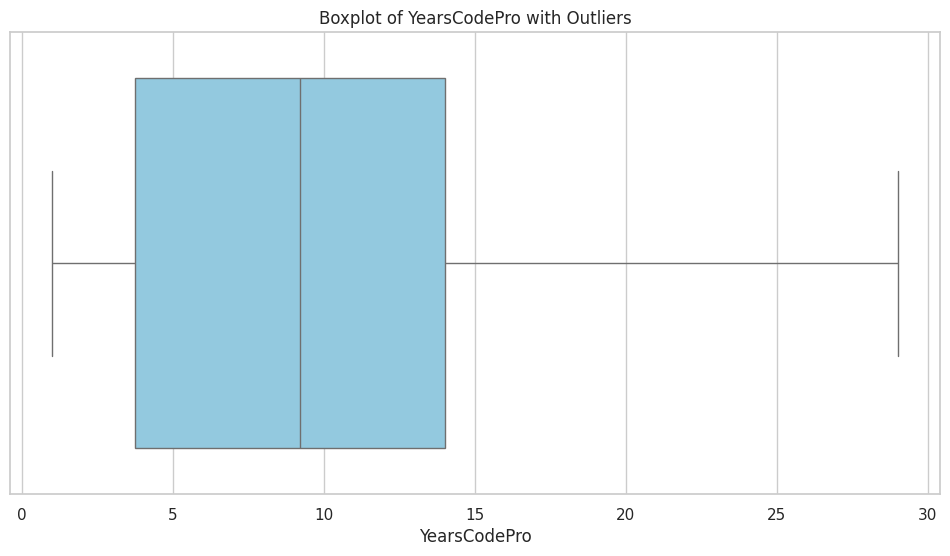

In [2232]:
#visualizing
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df2020[column], color='skyblue')
    plt.title(f'Boxplot of {column} with Outliers')
    plt.show()


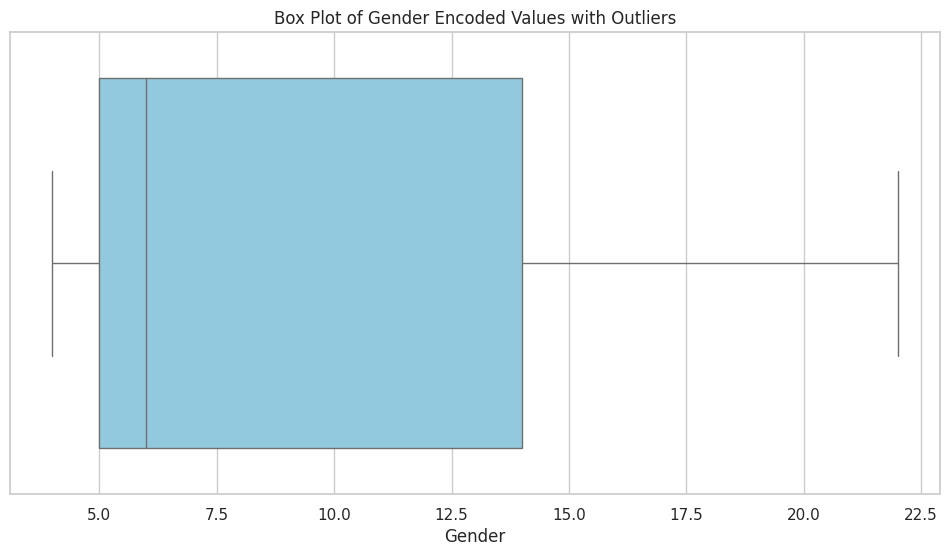

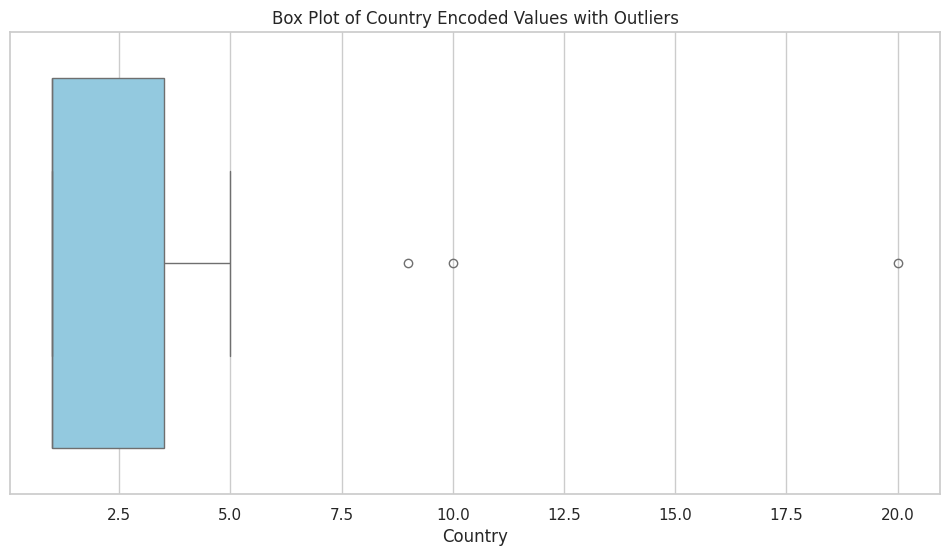

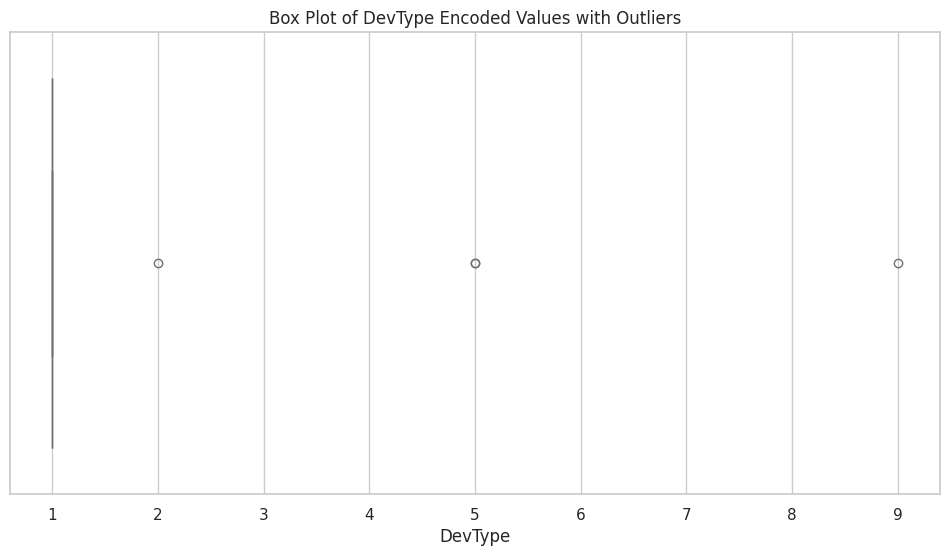

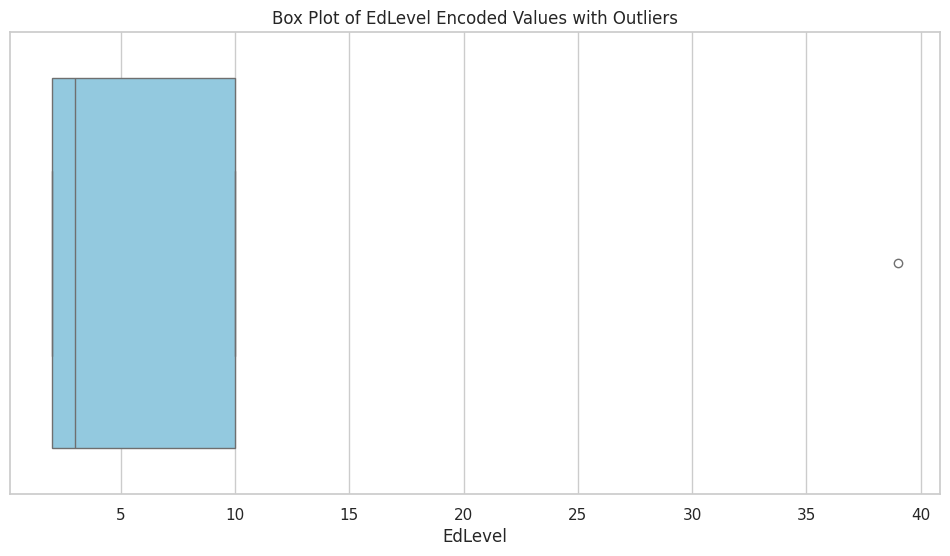

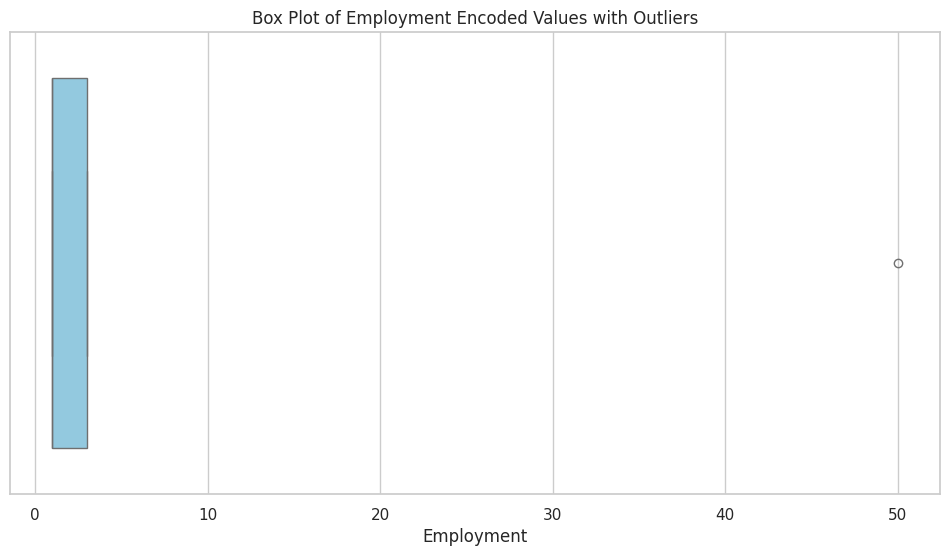

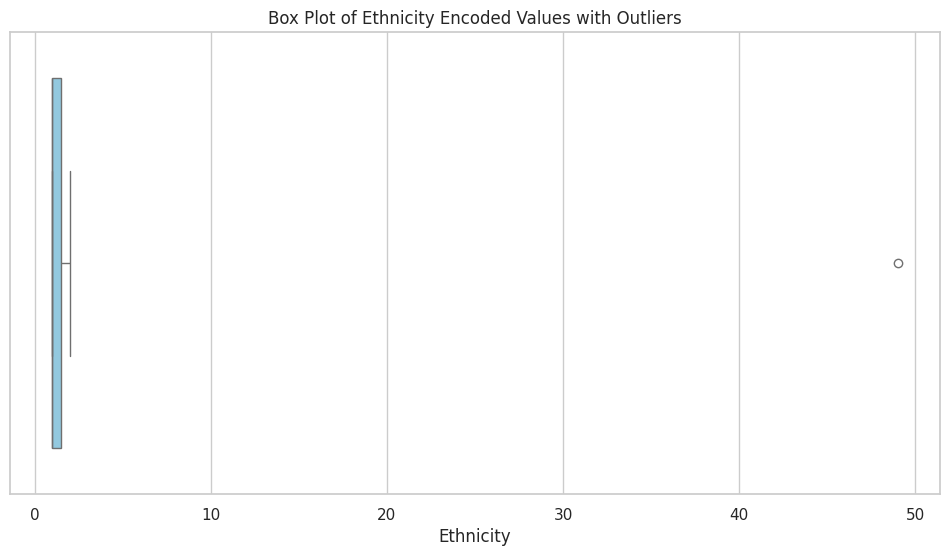

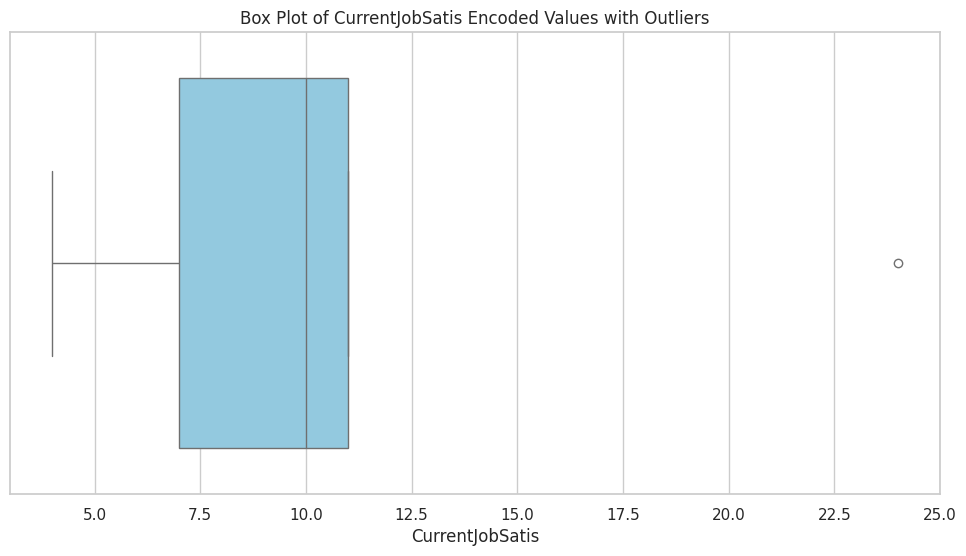

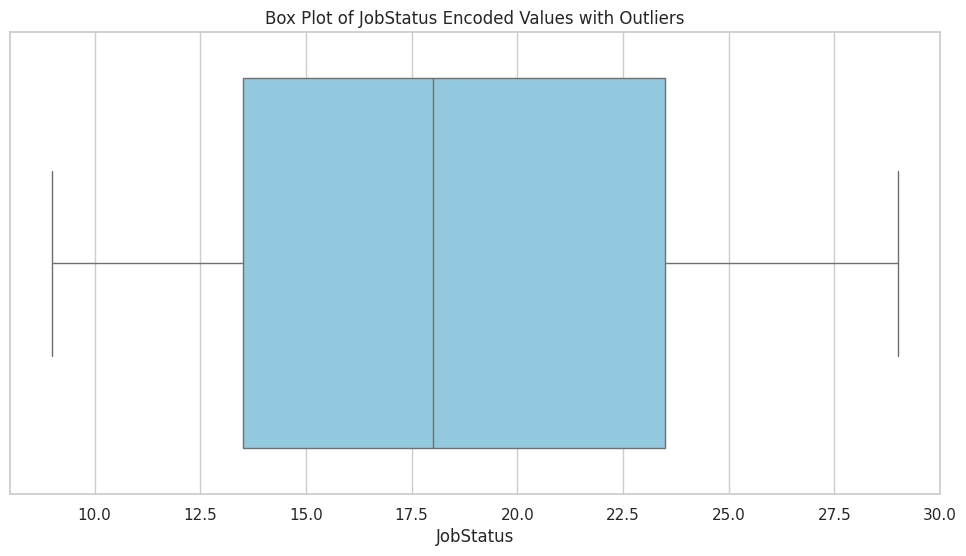

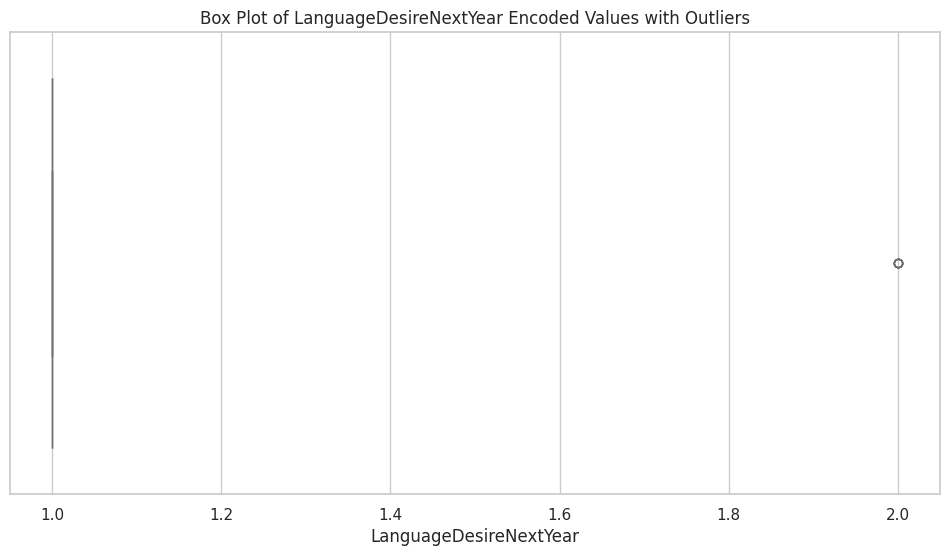

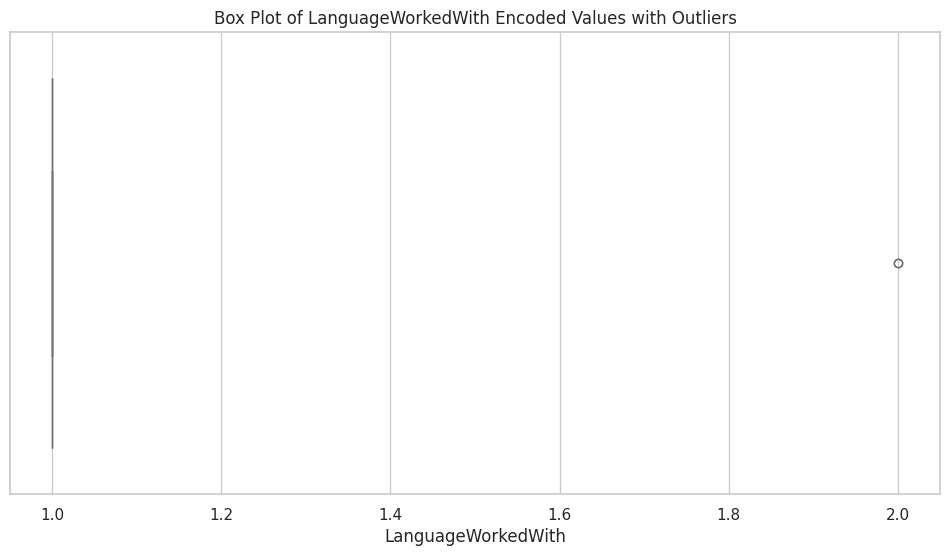

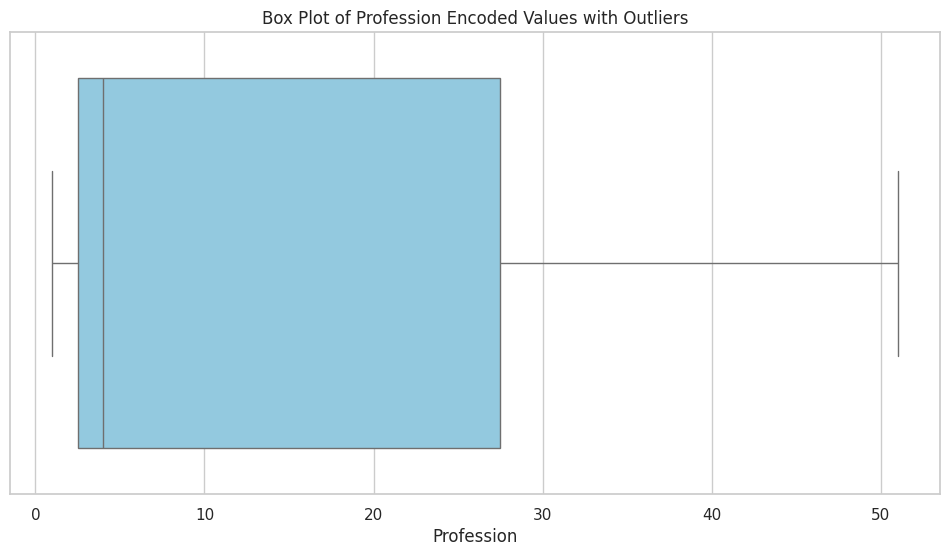

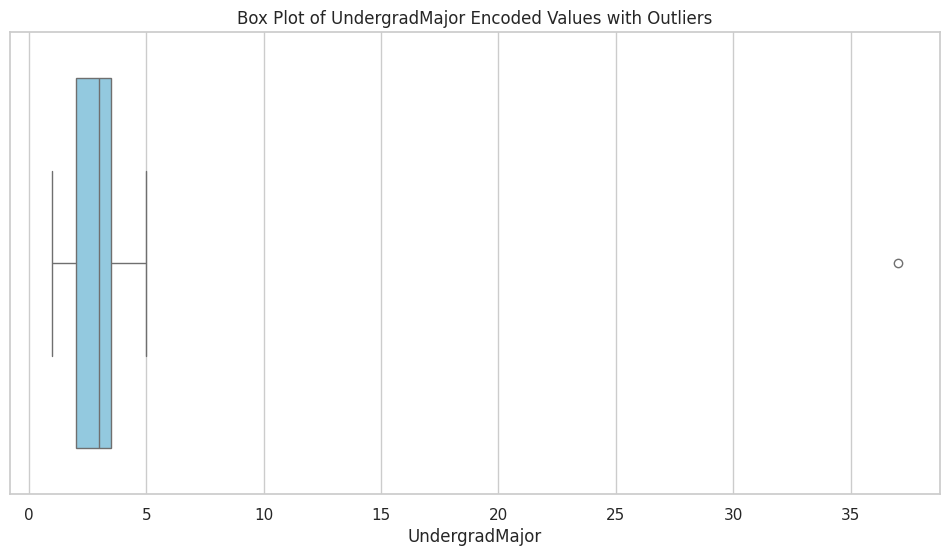

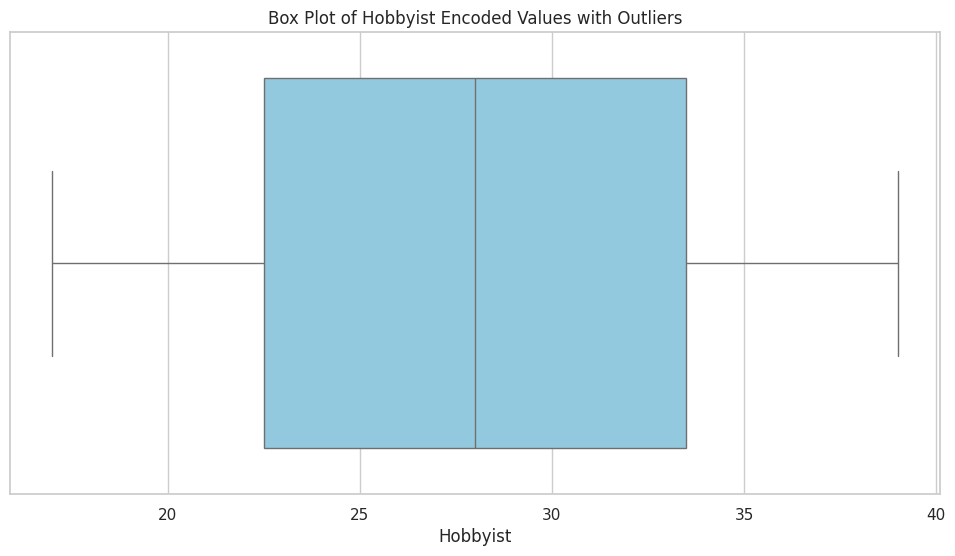

In [2233]:
# List of categorical columns
categorical_columns_2020 = ['Gender', 'Country', 'DevType', 'EdLevel', 'Employment', 'Ethnicity',
                            'CurrentJobSatis', 'JobStatus', 'LanguageDesireNextYear', 'LanguageWorkedWith',
                            'Profession', 'UndergradMajor', 'Hobbyist']

# Visualizing categorical columns with box plots
for column in categorical_columns_2020:
    plt.figure(figsize=(12, 6))
    encoded_data = df2020[column].value_counts()
    sns.boxplot(x=encoded_data, color='skyblue')
    plt.title(f'Box Plot of {column} Encoded Values with Outliers')
    plt.xlabel(column)
    plt.show()

Hence, we can see the outliers exist in Salary USD column and DevType columns

*Removing the outliers*

In [2234]:
# Detecting outliers in the 'SalaryUSD' column
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Removing outliers from 'SalaryUSD'
df2020_cleaned = remove_outliers_iqr(df2020, 'SalaryUSD')
print(f"Shape of dataframe before removing 'SalaryUSD' outliers: {df2020.shape}")
print(f"Shape of dataframe after removing 'SalaryUSD' outliers: {df2020_cleaned.shape}")


Shape of dataframe before removing 'SalaryUSD' outliers: (56, 62)
Shape of dataframe after removing 'SalaryUSD' outliers: (51, 62)


Hence, the outliers in SalaryUSD column are removed

In [2235]:
# Defining a threshold for rare categories (e.g., less than 1% of the total)
threshold = 0.01 * len(df2020_cleaned)

# Finding rare categories in 'DevType'
rare_devtypes = df2020_cleaned['DevType'].value_counts()[df2020_cleaned['DevType'].value_counts() < threshold].index

# Removing rows with rare 'DevType' categories
df2020_cleaned = df2020_cleaned[~df2020_cleaned['DevType'].isin(rare_devtypes)]
print(f"Shape of dataframe after removing rare 'DevType' categories: {df2020_cleaned.shape}")


Shape of dataframe after removing rare 'DevType' categories: (51, 62)


Hence the outliers in the Dev type column are removed

Hence, there are no outliers and the data is clean now we can proceed with visualization of the data.

**Visualization**

# **JOB PREPARATION ANALYSIS**

**ANALYSING THE SALARY TRENDS**

In [2236]:
# Adding 'Year' column to each DataFrame before concatenating
df['Year'] = 2018
survey_df_2019['Year'] = 2019
df2020['Year'] = 2020


In [2237]:
# Reset index to ensure uniqueness
df.reset_index(drop=True, inplace=True)
survey_df_2019.reset_index(drop=True, inplace=True)
df2020.reset_index(drop=True, inplace=True)


In [2238]:
# Load concatenated survey data
df = pd.concat([df, survey_df_2019, df2020])

In [2239]:
# Group data by year
grouped_by_year = df.groupby('Year')

In [2240]:
# Aggregating salary data
salary_stats = grouped_by_year['SalaryUSD'].describe()

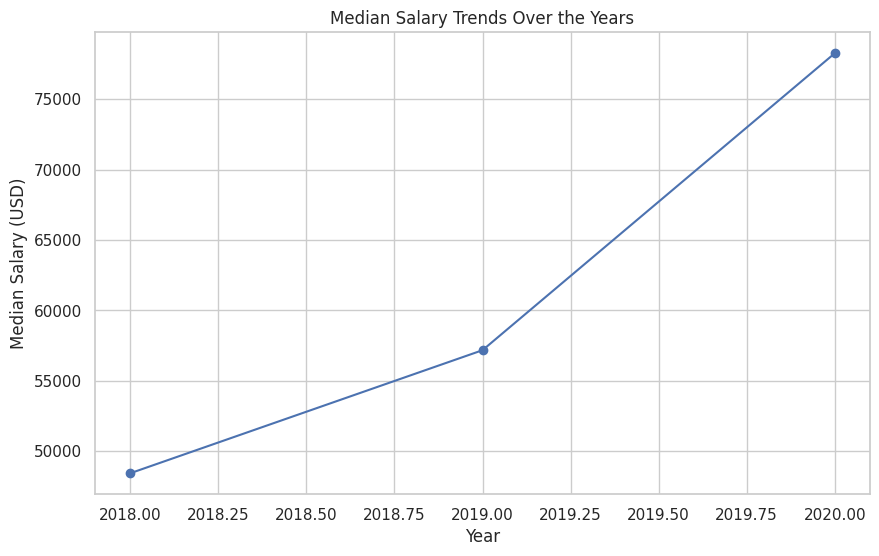

In [2241]:
# Calculating median salary for each year
median_salary_year = df.groupby('Year')['SalaryUSD'].median().reset_index()

# Plotting salary trends over the years
plt.figure(figsize=(10, 6))
plt.plot(median_salary_year['Year'], median_salary_year['SalaryUSD'], marker='o', linestyle='-')
plt.title('Median Salary Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Median Salary (USD)')
plt.grid(True)
plt.show()


We can see an increase in the median of the salary from 2018 to 2020. By that we can conclude that There is:
1.   Economic Growth
2.   Demand for skilled Workers.
3.   Inflation
4.   Industry Trends



It shows positive deployments in the industry.

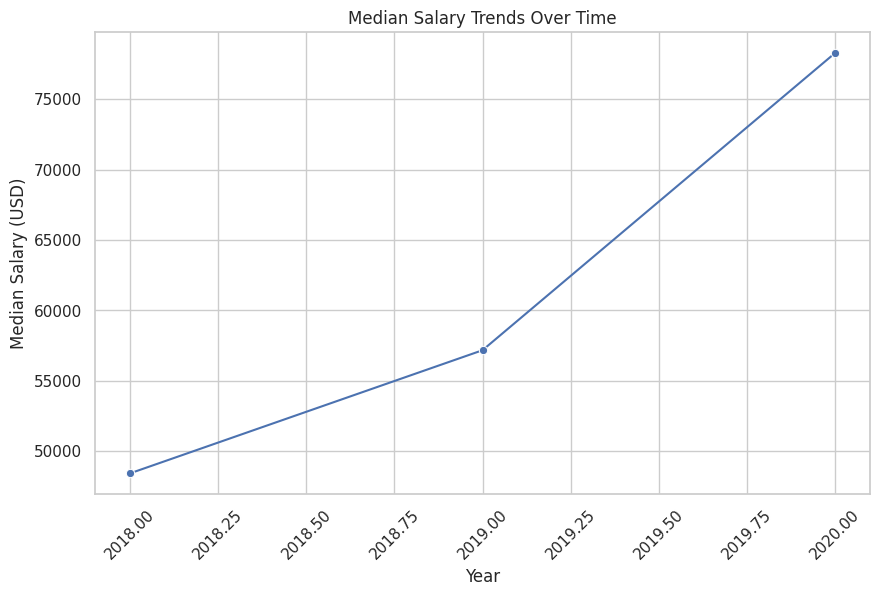

In [2242]:
# Comparing salary trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=salary_stats['50%'], marker='o')
plt.title('Median Salary Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Median Salary (USD)')
plt.xticks(rotation=45)
plt.show()

The graph shows an increasing trend in median salaries over time, it can be interpreted as a positive sign for professionals in the industry.

*Identifying the influencing factors*

*Edlevel vs Salary*

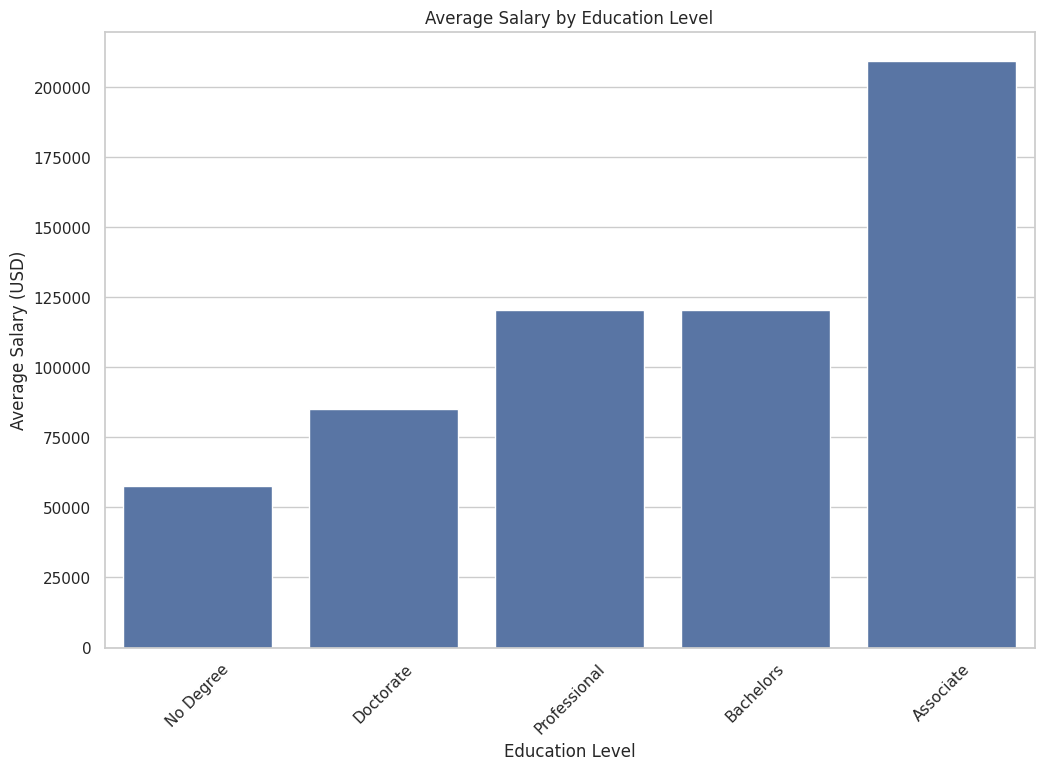

In [2243]:
# Calculating mean salary for each education level
mean_salary_by_edlevel = df.groupby('EdLevel')['SalaryUSD'].mean().sort_values()

# Creating bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_salary_by_edlevel.index, y=mean_salary_by_edlevel.values)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


We can see the mean salary distribution for each Education Level.
And we can see associate tend to have more salary upon years

*Years of professional experience vs salary*

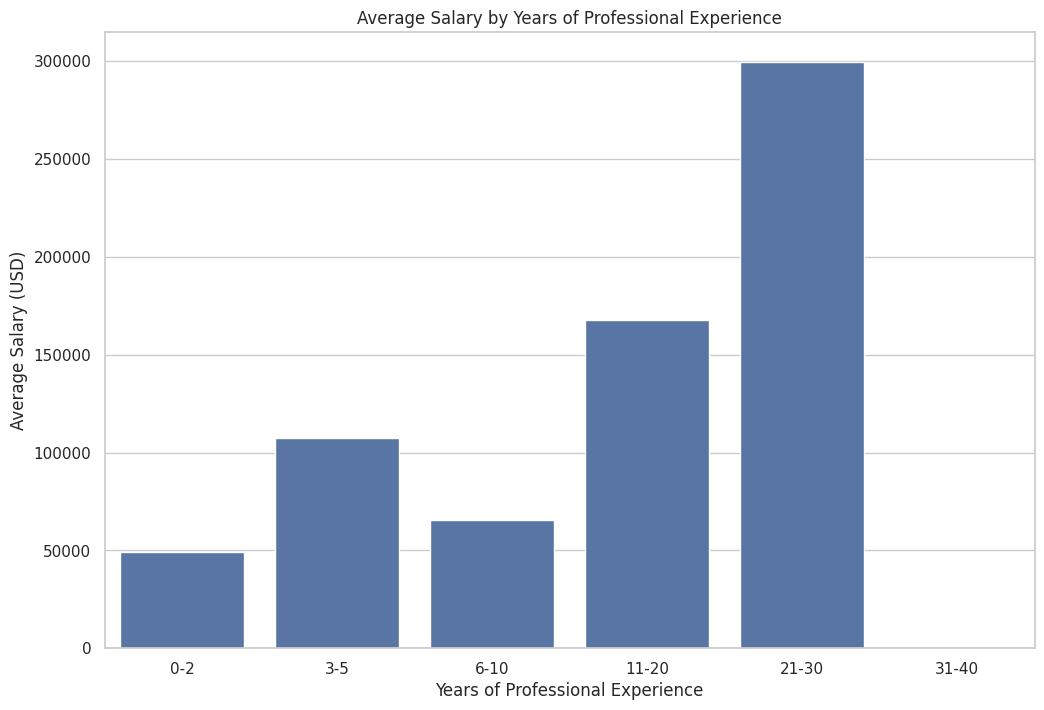

In [2244]:
# Define experience bins
experience_bins = [0, 2, 5, 10, 20, 30, 40]
experience_labels = ['0-2', '3-5', '6-10', '11-20', '21-30', '31-40']

df['ExperienceBin'] = pd.cut(df['YearsCodePro'], bins=experience_bins, labels=experience_labels, right=False)

# Calculate mean salary for each experience bin
mean_salary_by_experience = df.groupby('ExperienceBin')['SalaryUSD'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_salary_by_experience.index, y=mean_salary_by_experience.values)
plt.title('Average Salary by Years of Professional Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Average Salary (USD)')
plt.show()


We can see that more professional experience upto 21-30 tend to more salary ranging to 300000

*Country vs Salary*

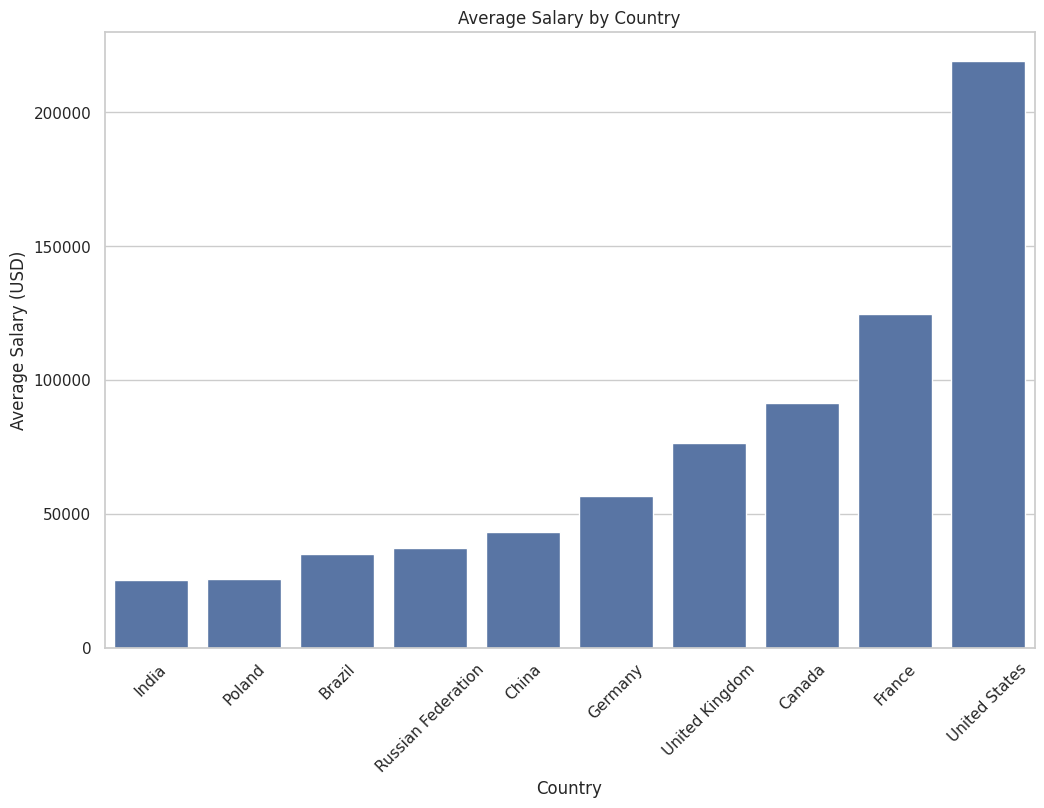

In [2245]:
# Select top 10 countries by respondent count
top_countries = df['Country'].value_counts().nlargest(10).index

# Filter data for these countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Calculate mean salary for each country
mean_salary_by_country = df_top_countries.groupby('Country')['SalaryUSD'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_salary_by_country.index, y=mean_salary_by_country.values)
plt.title('Average Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


If we analyse the plot the country United states tend to range a high salary.

*DevType vs Salary*

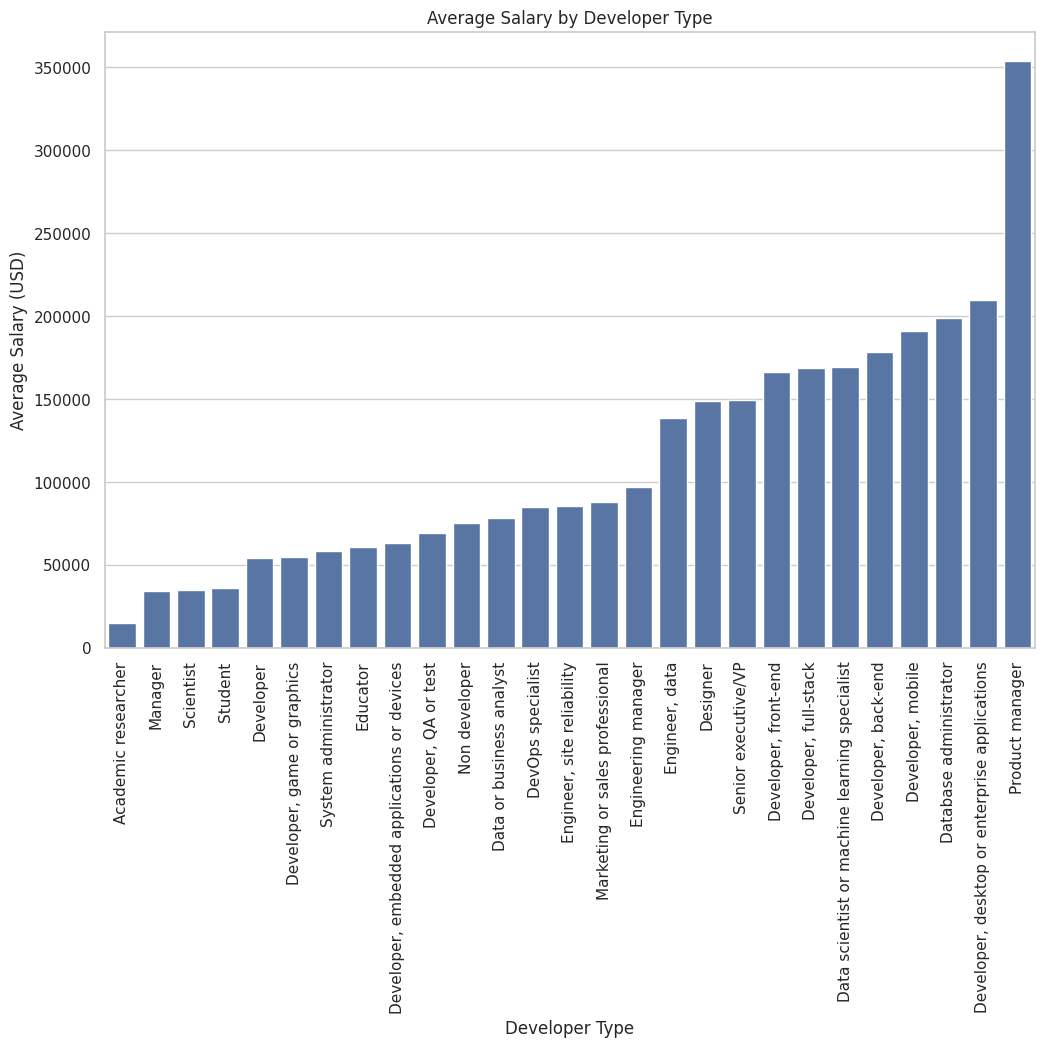

In [2246]:
# Split multiple developer types into separate rows
df_devtype = df.dropna(subset=['DevType']).copy()
df_devtype['DevType'] = df_devtype['DevType'].str.split(';')
df_devtype = df_devtype.explode('DevType')

# Calculate mean salary for each developer type
mean_salary_by_devtype = df_devtype.groupby('DevType')['SalaryUSD'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_salary_by_devtype.index, y=mean_salary_by_devtype.values)
plt.title('Average Salary by Developer Type')
plt.xlabel('Developer Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.show()


The role of product manager tend to have more salary.

*Years of coding experience vs Salary growth*

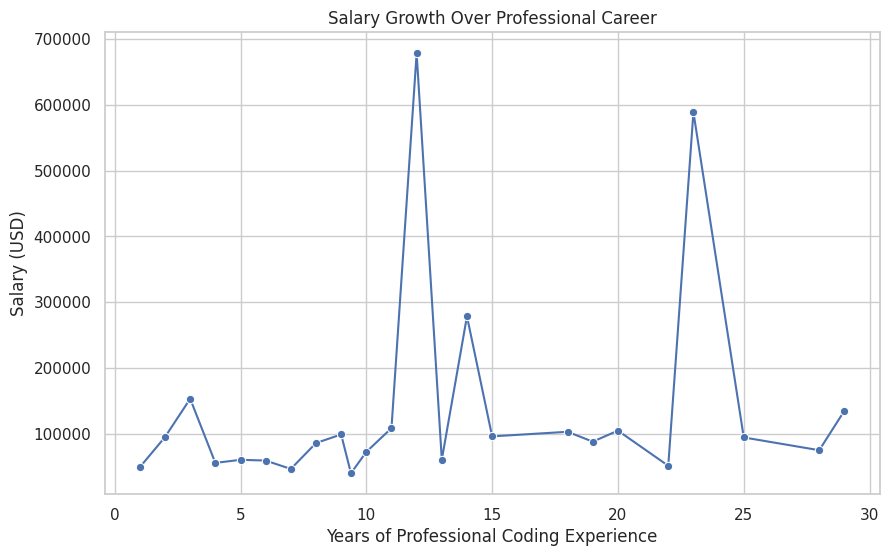

In [2247]:
# Ensure no duplicate 'YearsCodePro' entries by averaging salaries for each unique value
df_avg_salary = df.groupby('YearsCodePro')['SalaryUSD'].mean().reset_index()

# Plotting salary growth over professional experience
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearsCodePro', y='SalaryUSD', data=df_avg_salary, marker='o')
plt.title('Salary Growth Over Professional Career')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Salary (USD)')
plt.grid(True)
plt.show()


The one with 10-15 years tend to have more salary.

*Salary Trends:*

-->Location Matters:United States: Professionals in the United States earn significantly higher salaries compared to other countries. This highlights the importance of geographic location in determining salary levels.


-->Eduaction level: Advanced Degrees: Higher education levels, particularly those with a Master's or Doctorate degree, tend to command higher salaries. Investing in higher education can be a strategic move for long-term career growth and salary increases.


-->Job Role: Product Managers: Among various developer types, Product Managers are paid the most. This suggests that roles combining technical skills with business acumen and project management are highly valued and compensated accordingly.


-->Years of Professional Experience: 21-30 Years of Experience: Professionals with 21-30 years of experience tend to have the highest average salaries. This indicates that extensive experience and the expertise gained over time are crucial factors in achieving higher pay.


-->Developer Type:Certain developer roles, such as DevOps Specialists and Data Scientists, also tend to have higher average salaries. This shows the demand for specialized skills in emerging fields.


-->Years of professional coding experience: The one who practice consistently and have 10 - 15 years of professional coding experience tend to have higher salaries.


**ANALYSING THE SKILL TRENDS**

*Analysing the skill columns*

In [2248]:
# Display columns related to languages and technologies
tech_columns = ['LanguageWorkedWith', 'LanguageDesireNextYear']  # Add more columns if available
print(df[tech_columns].head())


                           LanguageWorkedWith  \
0                JavaScript;Python;Bash/Shell   
1          C;C++;Java;Matlab;R;SQL;Bash/Shell   
2  Java;JavaScript;Python;TypeScript;HTML;CSS   
3                         JavaScript;HTML;CSS   
4                                        Java   

                              LanguageDesireNextYear  
0                                          Go;Python  
1               Assembly;C;C++;Matlab;SQL;Bash/Shell  
2  C#;Go;Java;JavaScript;Python;SQL;TypeScript;HT...  
3                    C;Go;JavaScript;Python;HTML;CSS  
4                                        Java;Python  


*Splitting all the language worked with and language desired next year into individual languages*

In [2249]:
from collections import Counter

# Function to split and count skills
def count_skills(column):
    all_skills = df[column].dropna().str.split(';')
    return Counter([skill for sublist in all_skills for skill in sublist])

# Count skills for each relevant column
skills_worked_with = count_skills('LanguageWorkedWith')
skills_desired_next_year = count_skills('LanguageDesireNextYear')

# Combine counts into a DataFrame
skills_df = pd.DataFrame.from_dict({
    'WorkedWith': skills_worked_with,
    'DesireNextYear': skills_desired_next_year
}).fillna(0)

# Calculate total mentions
skills_df['TotalMentions'] = skills_df['WorkedWith'] + skills_df['DesireNextYear']
skills_df = skills_df.sort_values(by='TotalMentions', ascending=False)

# Display the top 10 skills
print(skills_df.head(10))


                       WorkedWith  DesireNextYear  TotalMentions
JavaScript                  125.0            91.0          216.0
SQL                         102.0            65.0          167.0
Python                       75.0            70.0          145.0
HTML/CSS                     79.0            55.0          134.0
C#                           60.0            53.0          113.0
Java                         66.0            44.0          110.0
TypeScript                   42.0            53.0           95.0
Bash/Shell/PowerShell        47.0            30.0           77.0
PHP                          49.0            20.0           69.0
C++                          39.0            25.0           64.0


*The skill growth comparison for current year and language desired next year*

<Figure size 1200x800 with 0 Axes>

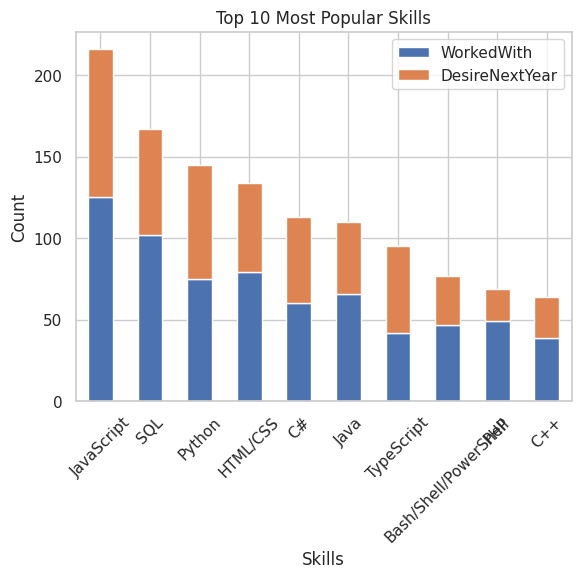

In [2250]:
# Plotting the top 10 most popular skills
top_skills = skills_df.head(10)
plt.figure(figsize=(12, 8))
top_skills[['WorkedWith', 'DesireNextYear']].plot(kind='bar', stacked=True)
plt.title('Top 10 Most Popular Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Javascript tends to be the most used language.

*Top 10 Languages desired next year*

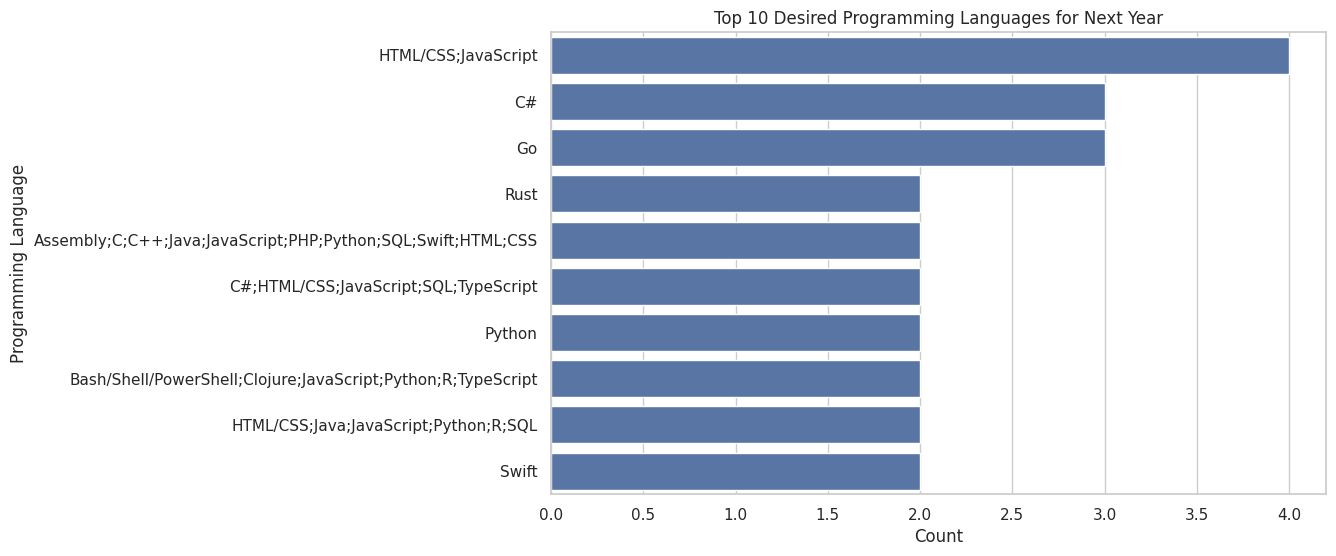

In [2251]:
# Reset index of the DataFrame
df_reset = df.reset_index(drop=True)

# Plotting the most desired programming languages for the next year
plt.figure(figsize=(10, 6))
sns.countplot(y='LanguageDesireNextYear', data=df_reset, order=df_reset['LanguageDesireNextYear'].value_counts().nlargest(10).index)
plt.title('Top 10 Desired Programming Languages for Next Year')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()


We can see that html, css and java script tend to have been used more in the next year.

*Salary distribution for the top 10 skills in India and United States.*

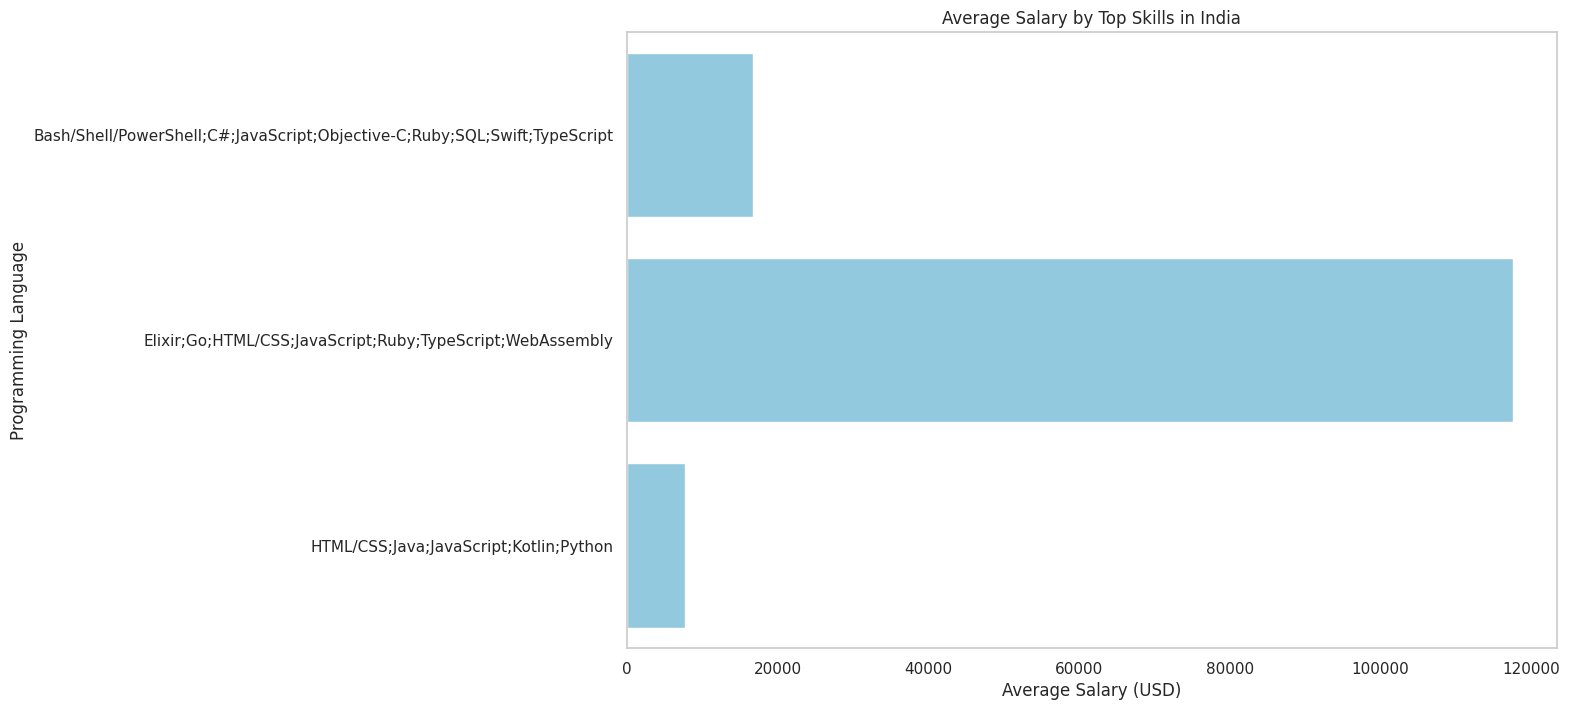

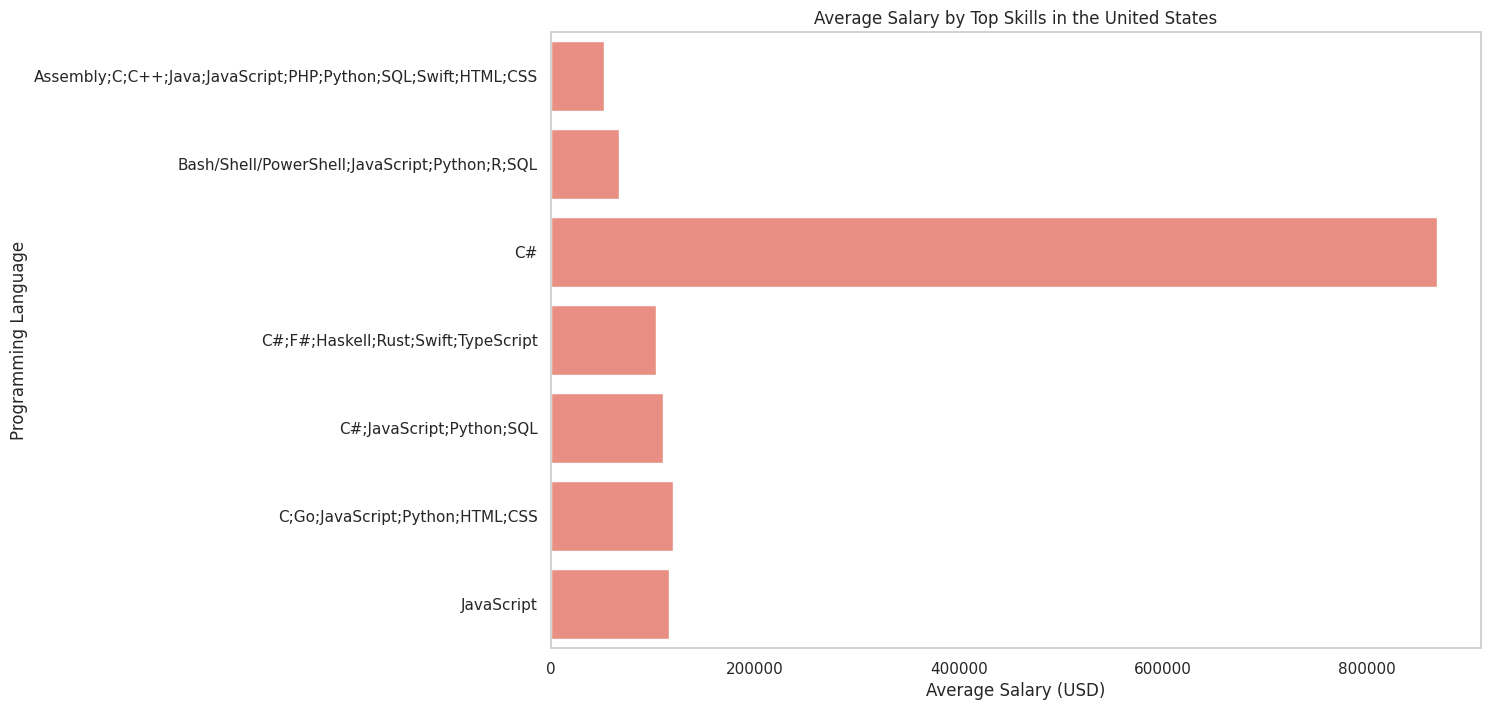

In [2252]:
# Filter data for India and United States
df_india = df_top_skills[df_top_skills['Country'] == 'India']
df_us = df_top_skills[df_top_skills['Country'] == 'United States']

# Calculate average salary for each skill in India and United States
avg_salary_india = df_india.groupby('LanguageDesireNextYear')['SalaryUSD'].mean().reset_index()
avg_salary_us = df_us.groupby('LanguageDesireNextYear')['SalaryUSD'].mean().reset_index()

# Plot average salary by skill for India
plt.figure(figsize=(12, 8))
sns.barplot(x='SalaryUSD', y='LanguageDesireNextYear', data=avg_salary_india, color='skyblue')
plt.title('Average Salary by Top Skills in India')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Programming Language')
plt.grid(axis='x')
plt.show()

# Plot average salary by skill for United States
plt.figure(figsize=(12, 8))
sns.barplot(x='SalaryUSD', y='LanguageDesireNextYear', data=avg_salary_us, color='salmon')
plt.title('Average Salary by Top Skills in the United States')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Programming Language')
plt.grid(axis='x')
plt.show()


We can see that C, html , java script which are top in india the salary ranges to 120000.
whereas,
c# is the top language in United States which ranges to 800000.
By this we can see the peak difference in the salary ranges.

*Salary vs language desired next year*

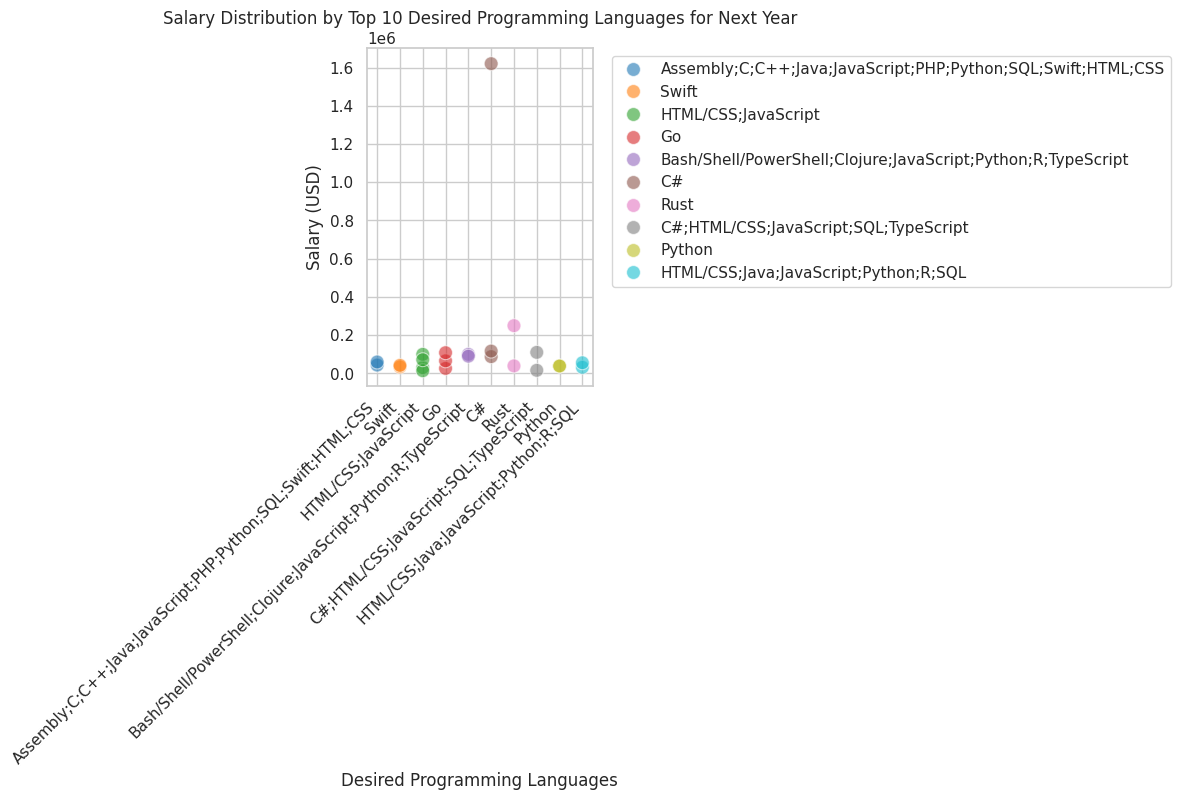

In [2253]:
# Defining color palette
palette = sns.color_palette("tab10", n_colors=10)

# Plotting
plt.figure(figsize=(12, 8))

# Using a scatter plot to show salary distribution by desired programming languages for next year
sns.scatterplot(x='LanguageDesireNextYear', y='SalaryUSD', data=df_top_10_languages, hue='LanguageDesireNextYear', palette=palette, s=100, alpha=0.6)
plt.title('Salary Distribution by Top 10 Desired Programming Languages for Next Year')
plt.xlabel('Desired Programming Languages')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We can conclude that c# tends to have the most high paid salary.

*The highest paid skills for each devtype*

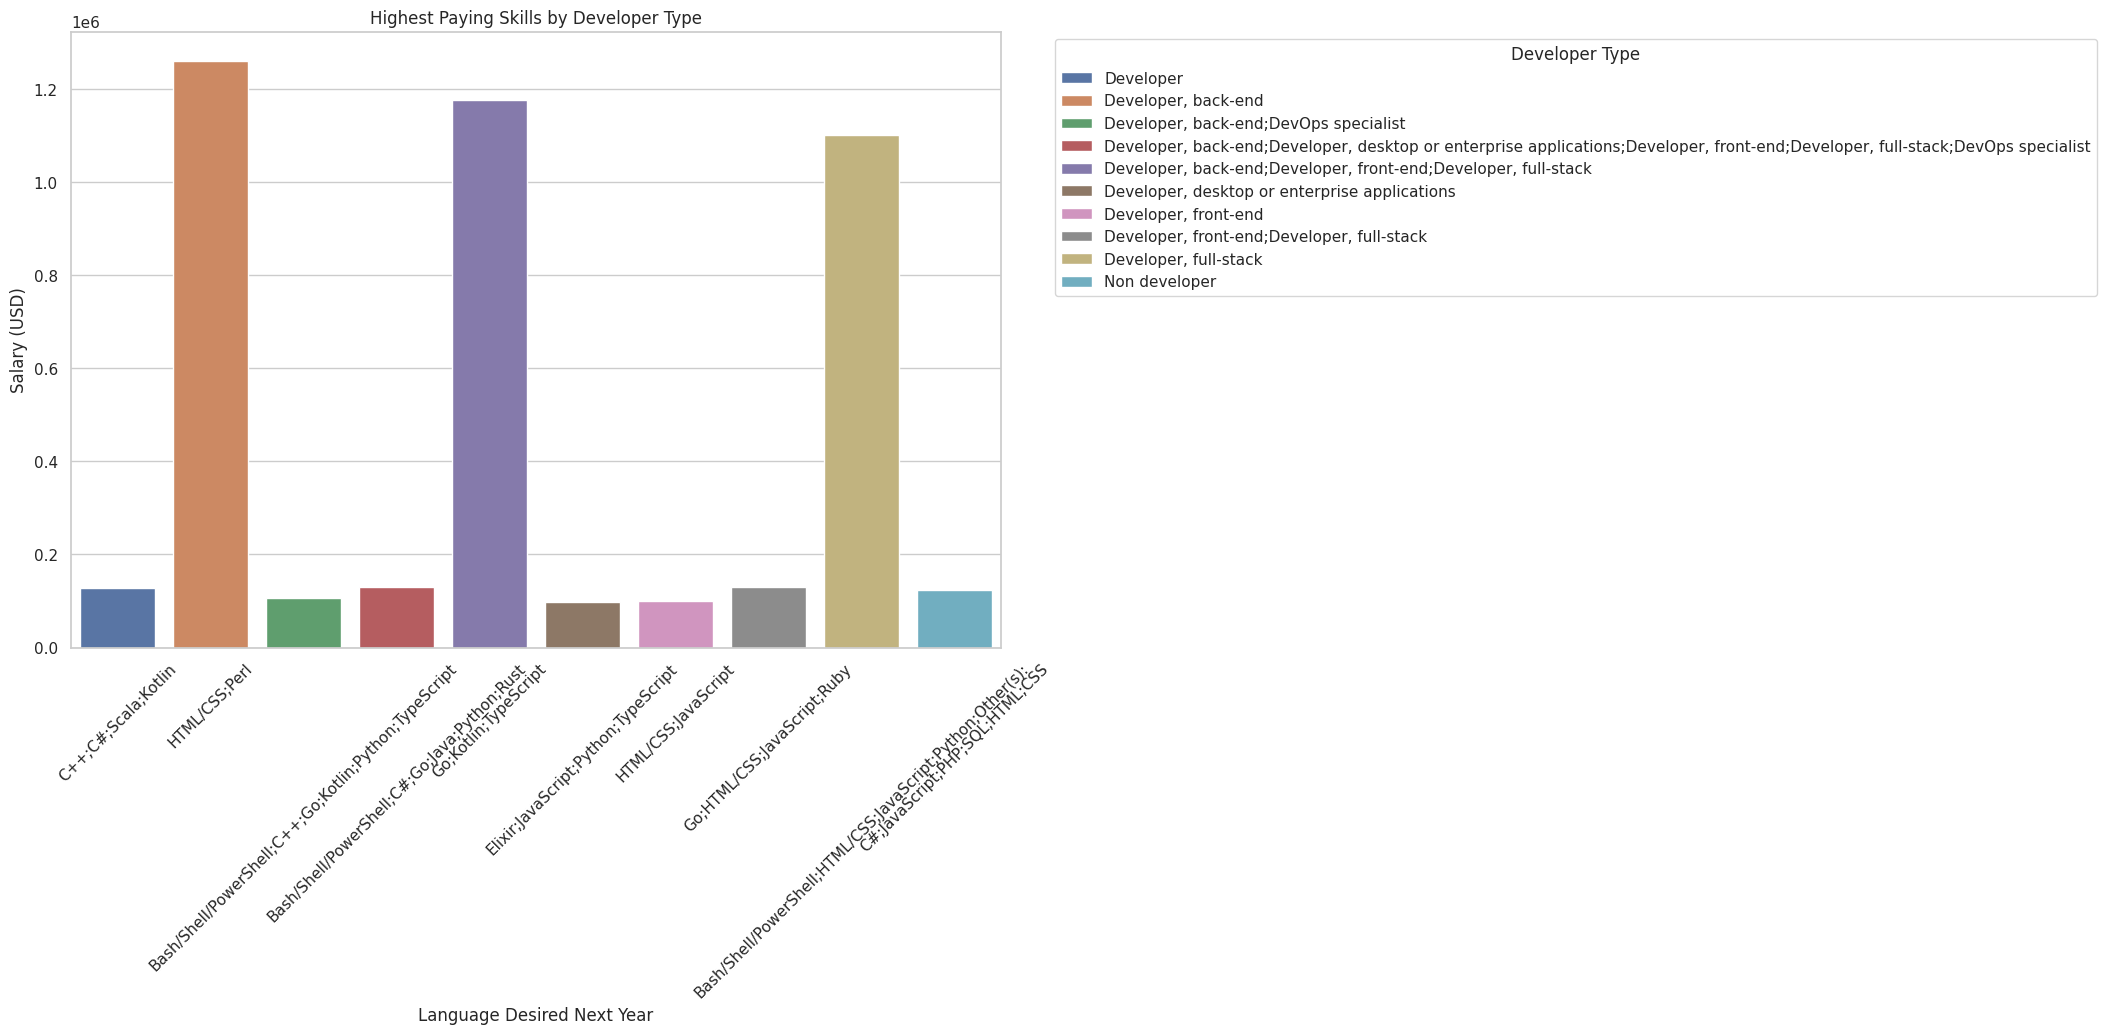

In [2254]:
# Group data by developer type and find the highest paying skills
highest_paying_skills_by_dev_type = df_top_10_dev_types.groupby('DevType')[['LanguageDesireNextYear', 'SalaryUSD']].apply(lambda x: x.nlargest(1, 'SalaryUSD'))

# Reset index to make 'DevType' a column
highest_paying_skills_by_dev_type = highest_paying_skills_by_dev_type.reset_index()

# Plot the highest paying skills by developer type
plt.figure(figsize=(12, 8))
sns.barplot(x='LanguageDesireNextYear', y='SalaryUSD', hue='DevType', data=highest_paying_skills_by_dev_type)
plt.title('Highest Paying Skills by Developer Type')
plt.xlabel('Language Desired Next Year')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Developer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


We can see the distribution of most preferred language for the top 10 DevType roles.

*Top 10 developer roles with highest salary*

In [2255]:
# Grouping data by developer type and calculate the median salary for each group
dev_type_salaries = df.groupby('DevType')['SalaryUSD'].median()

# Sorting developer types based on median salary in descending order
dev_type_salaries_sorted = dev_type_salaries.sort_values(ascending=False)

# Selecting the top 10 developer types with the highest median salaries
top_10_dev_types_salaries = dev_type_salaries_sorted.head(10)

print("Top 10 Developer Types with the Highest Salaries:")
print(top_10_dev_types_salaries)


Top 10 Developer Types with the Highest Salaries:
DevType
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile                                                                                                            2000000.0
Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Product manager                                                                              1620000.0
Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, full-stack;Engineer, data                                                                                                              594539.0
Data or business analyst;Data scientist or machine learning specialist;Database administrator;Engineer, data                                                                                                      

<ipython-input-2256-48251f58b470>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


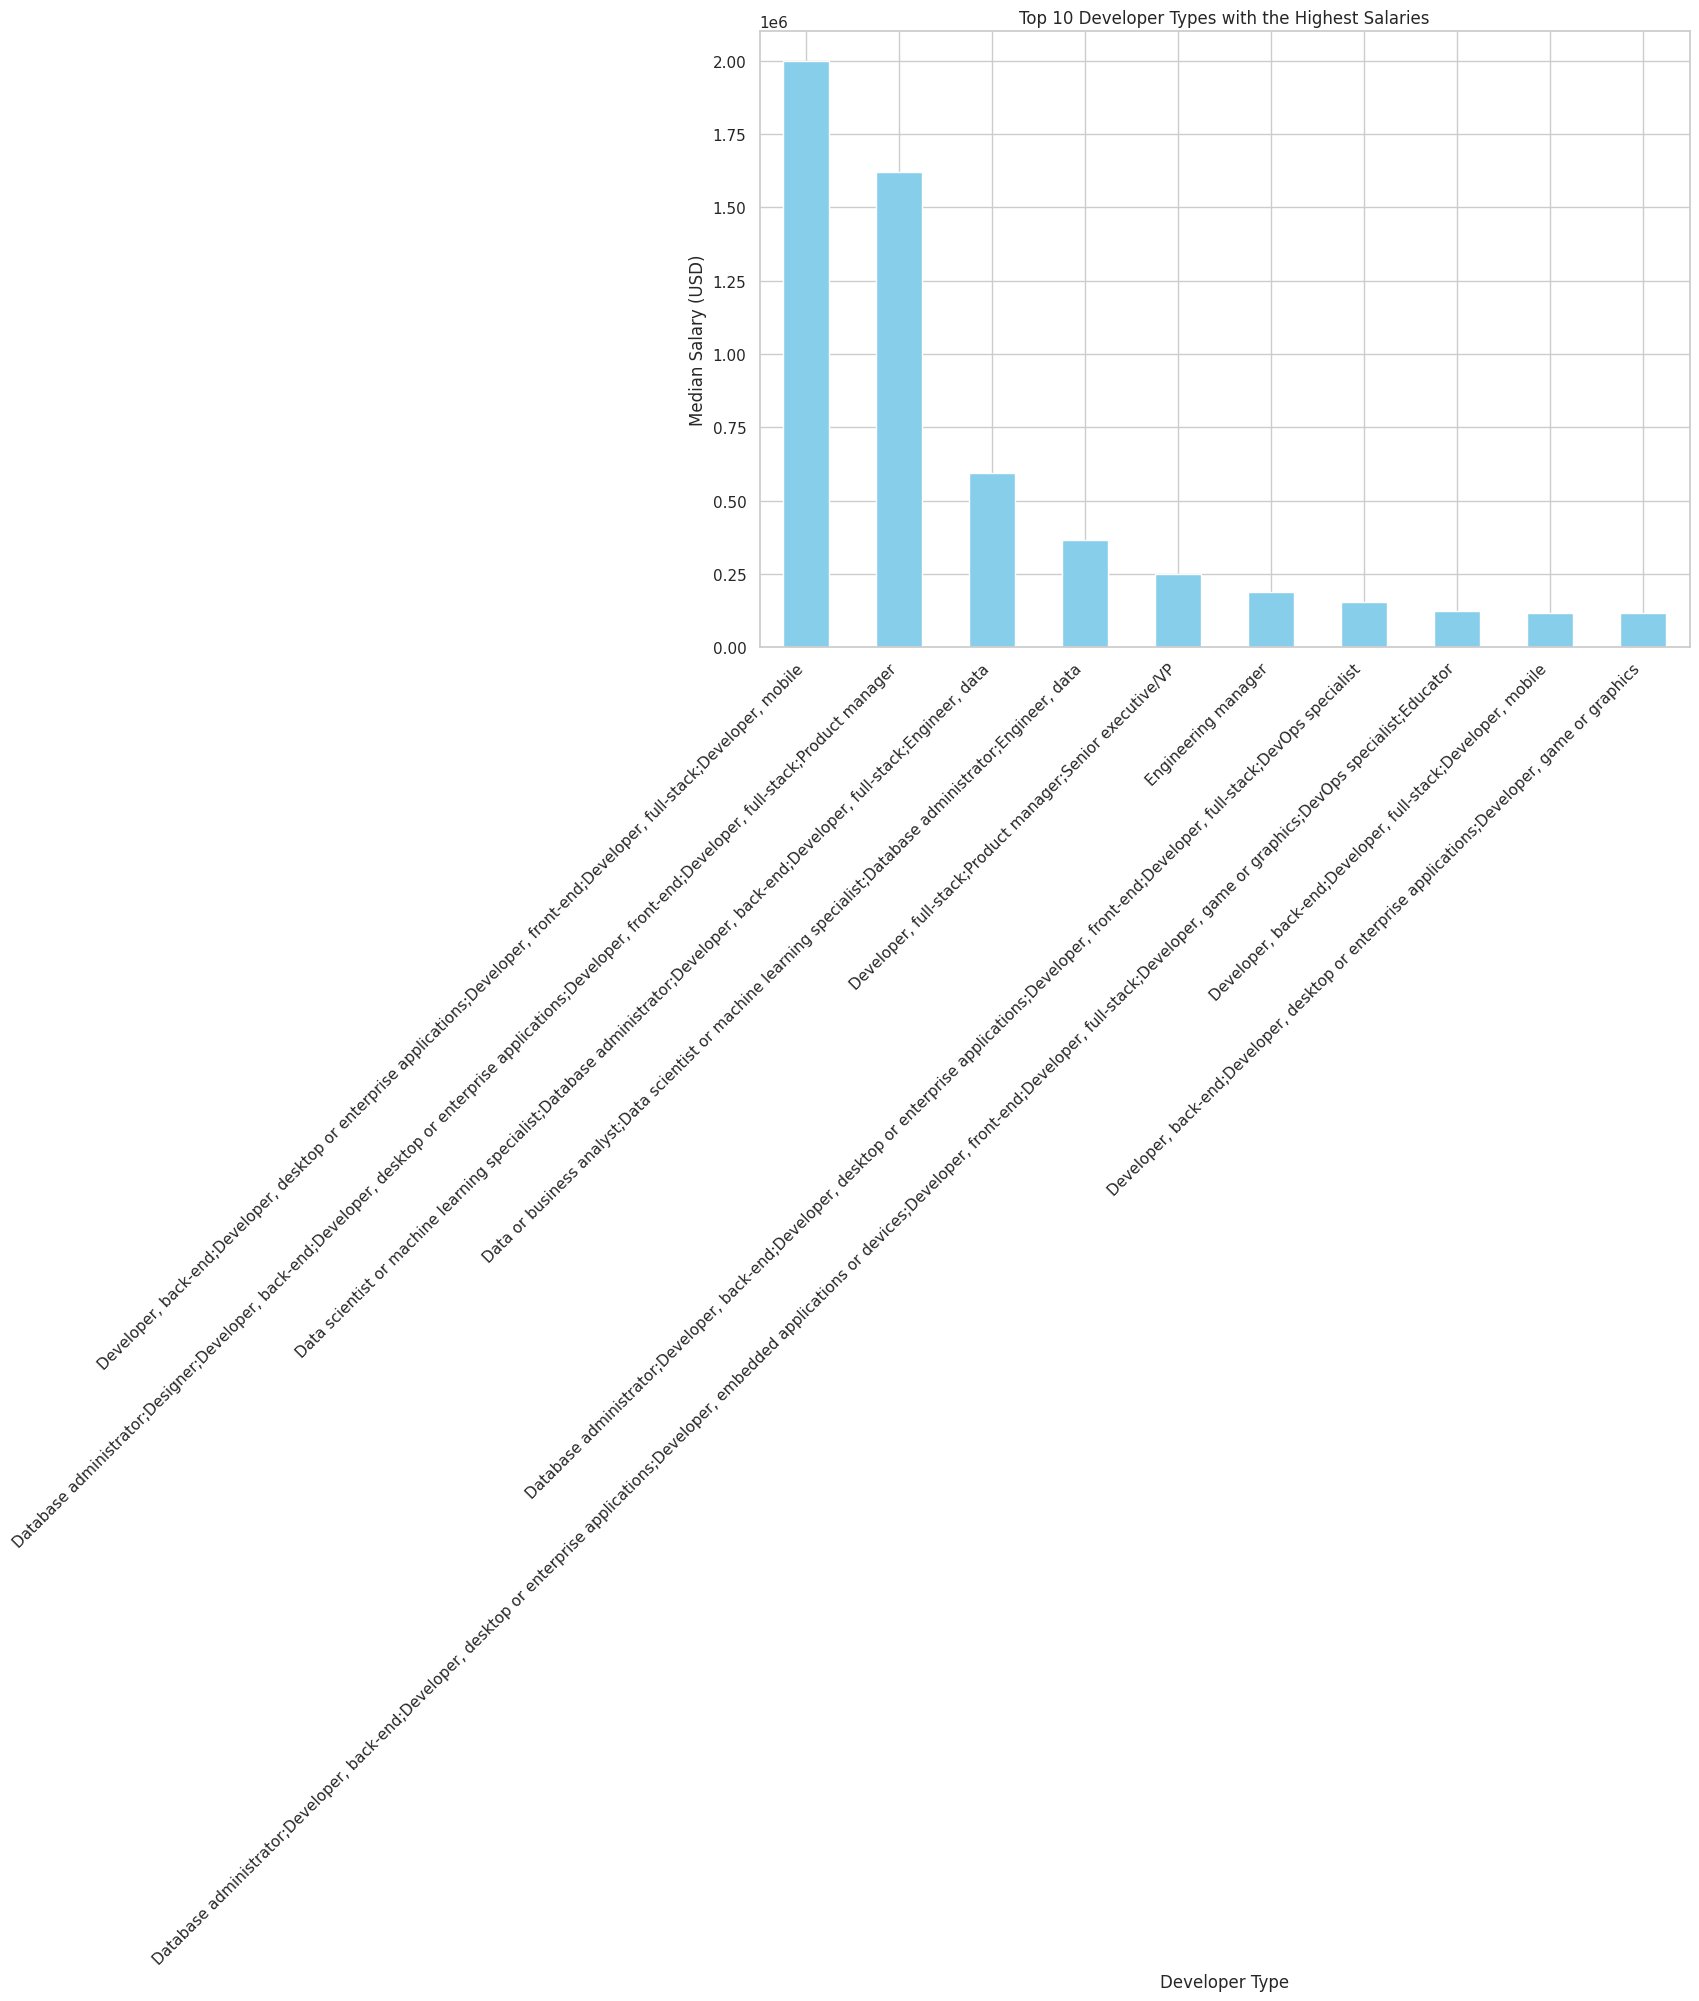

In [2256]:
# Plot the top 10 developer types with the highest salaries
plt.figure(figsize=(12, 8))
top_10_dev_types_salaries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Developer Types with the Highest Salaries')
plt.xlabel('Developer Type')
plt.ylabel('Median Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can conclude that the developer, back end developer roles have the highest salary ranging to 2.00$

*Skill Trends and Salary Analysis*

-->JavaScript Dominance:

JavaScript continues to be the most used programming language. Its preference is expected to increase in the next year.
HTML, CSS, and JavaScript are projected to be used even more frequently in the upcoming year.


-->Regional Salary Comparisons:

In India, the top languages such as C, HTML, and JavaScript have salaries ranging up to $120,000.

In the United States, C# is the top language, with salaries reaching up to $800,000.

This stark difference indicates that C# commands the highest salaries, especially in the U.S.


-->Preferred Languages by Top Developer Roles:

A detailed analysis of the most preferred languages for the top 10 developer roles reveals significant insights.


-->The distribution of preferred languages varies across different developer roles.
Top 10 Developer Types with the Highest Salaries:

The following are the top 10 developer types along with their highest recorded salaries:
Developer, back-end; Developer, desktop or enterprise applications; Developer, front-end; Developer, full-stack; Developer, mobile - $2,000,000

Database administrator; Designer; Developer, back-end; Developer, desktop or enterprise applications; Developer, front-end; Developer, full-stack; Product manager - $1,620,000

Data scientist or machine learning specialist; Database administrator; Developer, back-end; Developer, full-stack; Engineer, data - $594,539
Data or business analyst; Data scientist or machine learning specialist; Database administrator; Engineer, data - $366,420

Developer, full-stack; Product manager; Senior executive/VP - $250,000
Engineering manager - $187,000

Database administrator; Developer, back-end; Developer, desktop or enterprise applications; Developer, front-end; Developer, full-stack; DevOps specialist - $156,000

Database administrator; Developer, back-end; Developer, desktop or enterprise applications; Developer, embedded applications or devices; Developer, front-end; Developer, full-stack; Developer, game or graphics; DevOps specialist; Educator - $124,092

Developer, back-end; Developer, full-stack; Developer, mobile - $117,000
Developer, back-end; Developer, desktop or enterprise applications; Developer, game or graphics - $116,000


-->Conclusion: Developer roles, especially those involving back-end development, command the highest salaries, with top earnings reaching $2,000,000.


There's a noticeable regional salary variation, with significantly higher salaries for certain roles and languages in the United States compared to India.
C# emerges as a highly lucrative skill, particularly in the U.S., while JavaScript remains globally popular.


**ANALYSING THE GEOGRAPHICAL TRENDS**

*Median salary for the top 10 countries*

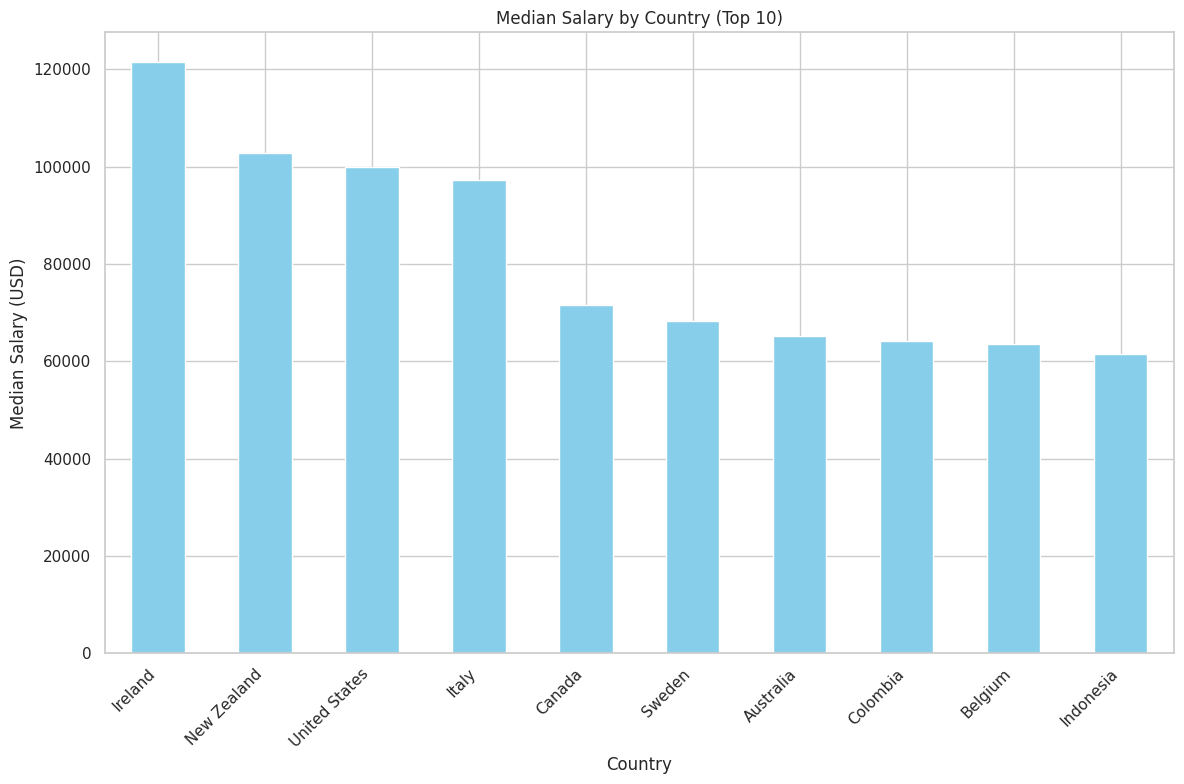

In [2257]:
# Group the data by country and calculate the median salary for each country
median_salary_by_country = df.groupby('Country')['SalaryUSD'].median().nlargest(10)

# Plot the median salary for the top 10 countries
plt.figure(figsize=(12, 8))
median_salary_by_country.plot(kind='bar', color='skyblue')
plt.title('Median Salary by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Median Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can observe that Ireland , New Zealand and United States have high pay of salaries.

*Salary distribution for different regions of ethnicity*

<ipython-input-2258-925ddb3dfd2f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SalaryUSD', y='Ethnicity', data=avg_salary_by_ethnicity, palette='Set2')


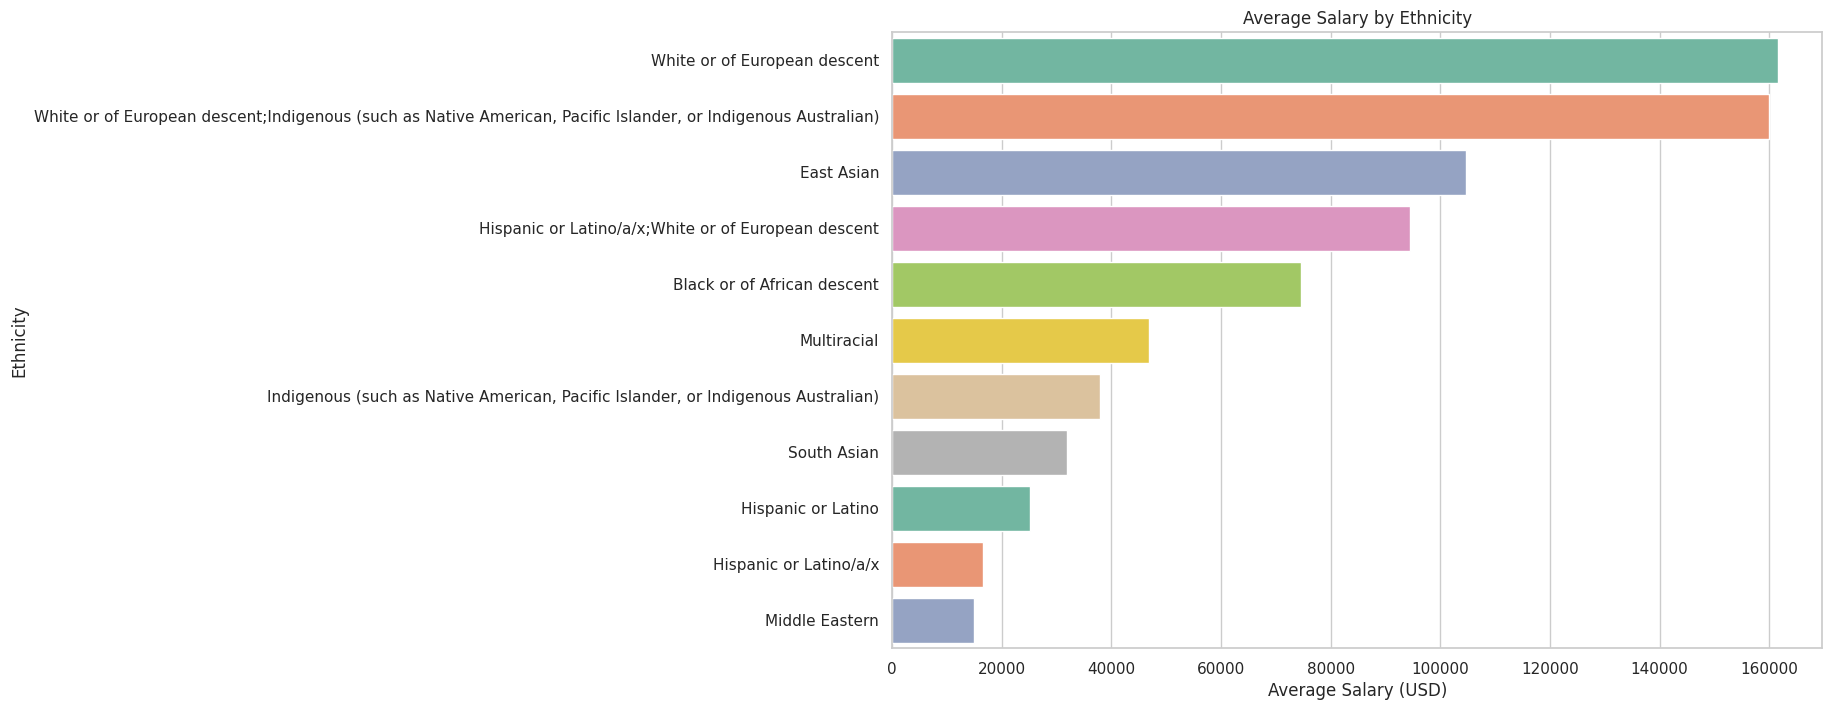

In [2258]:
# Calculating the average salary for each ethnicity
avg_salary_by_ethnicity = df.groupby('Ethnicity')['SalaryUSD'].mean().reset_index()

# Sorting the DataFrame by average salary in descending order
avg_salary_by_ethnicity = avg_salary_by_ethnicity.sort_values(by='SalaryUSD', ascending=False)

# Visualizing average salary by ethnicity using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='SalaryUSD', y='Ethnicity', data=avg_salary_by_ethnicity, palette='Set2')
plt.title('Average Salary by Ethnicity')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Ethnicity')
plt.show()


We can see that white or og European decent like native american tend to have most salaries.

*Geographical Salary Trends*

-->High-Paying Countries:

Ireland, New Zealand, and the United States are identified as countries with significantly high salaries for tech professionals.


-->Ethnicity and Salary:

Individuals who are white or of European descent, including Native Americans, tend to earn the highest salaries in the tech industry.


**JOB SATISFACTION AND SALARY**

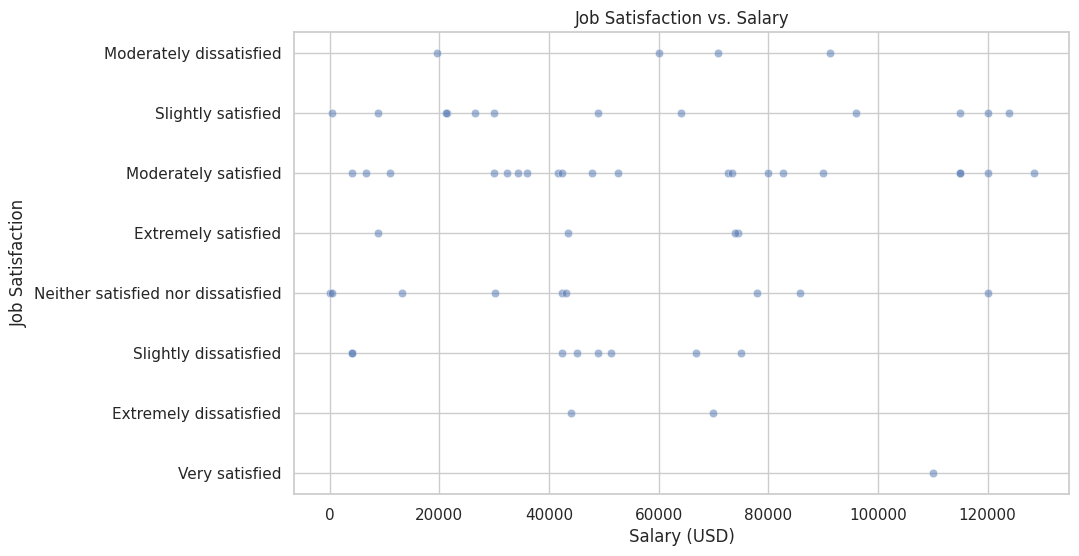

In [2261]:
# Removing duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Removing duplicate rows
df = df[~df.index.duplicated(keep='first')]

# Ensuring the dataframe does not have any NaN values in 'SalaryUSD' and 'JobSatisfaction'
df = df.dropna(subset=['SalaryUSD', 'JobSatisfaction'])

# Setting plot style
sns.set_style("whitegrid")

# Plotting job satisfaction vs. salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SalaryUSD', y='JobSatisfaction', data=df, alpha=0.5)
plt.title('Job Satisfaction vs. Salary')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Satisfaction')
plt.show()


Job Satisfaction and Salary:

-->Correlation Between Salary and Job Satisfaction:
There is a positive correlation between salary and job satisfaction, indicating that higher salaries generally lead to greater job satisfaction among tech professionals.


-->Distribution of Satisfaction Levels:
The analysis shows a range of satisfaction levels, with a notable number of respondents being only moderately satisfied despite earning high salaries. Conversely, a significant portion of professionals are very satisfied with their compensation, indicating a complex relationship between salary and overall job satisfaction.

This suggests that while salary is an important factor in job satisfaction, other elements such as work environment, job role, and career growth opportunities also play crucial roles in determining overall job satisfaction.

**Analysis of Job preparation analysis**

*To achieve a high-paying salary in the tech industry, follow these strategic steps based on recent trends and analysis:*



1. **Develop In-Demand Skills**: Master programming languages that are highly preferred and offer lucrative salaries. Globally, languages such as JavaScript, HTML, CSS, and C# are in high demand. Specializing in these languages will enhance your employability and salary prospects.



2. **Pursue High-Paying Job Roles**: Aim for roles known to offer substantial salaries. Positions like Product Manager, Back-end Developer, and Full-stack Developer consistently rank among the highest paying. For example, Product Managers often earn the most, with salaries significantly higher than other roles.



3. **Consider Geographical Location**: Seek job opportunities in countries that offer higher salaries for tech professionals. The United States, Ireland, and New Zealand are top-paying regions. Additionally, in the United States, individuals of white or European descent tend to earn more, reflecting broader demographic trends in salary distribution.



4. **Gain Professional Experience**: Accumulate substantial professional experience, as this greatly impacts salary potential. Professionals with 21-30 years of experience tend to earn the highest salaries, highlighting the importance of career longevity and growth.



5. **Balance Salary with Job Satisfaction**: Understand that while high salaries contribute to job satisfaction, other factors like work environment and career development are also crucial. Aim for roles and companies that offer a balanced combination of good pay and a satisfying work experience.



By focusing on these areas—developing key skills, targeting high-paying roles, considering geographical advantages, gaining experience, and balancing job satisfaction—we can strategically position ourself for a high-paying and fulfilling career in the tech industry.